---
# **TFM Predicción de productos financieros UNICAJA**
---
* Titulación: Máster Universitario en Big Data y Ciencia de datos
* Universidad Internacional de Valencia
* Directora del TFM: Ana Lorena Jiménez Preciado
* Alumno: Roberto Asensio Durán
* Curso académico: 2023 - 2024
* Fecha: Abril 2024




## **Resumen**

Este cuaderno, parte integral del Trabajo de Fin de Máster en Big Data y Ciencia de Datos, se enfoca en analizar y predecir los valores de los activos financieros de Unicaja, que es una entidad financiera española, una caja de ahorros, que opera en el sector bancario y cotizando en el IBEX 35. Dentro de este marco, emplearé técnicas avanzadas de análisis de datos y desarrollaré modelos predictivos. El objetivo fundamental de este trabajo es proporcionar herramientas exitosas para la toma de decisiones en el ámbito financiero, contribuyendo así al avance del conocimiento en el campo de la ciencia de datos aplicada a la gestión de activos financieros.

## **Contenido**

**Econometría Financiera**


* Instalar e importar paqueterías: Configuración inicial del entorno de trabajo, importando las librerías.

* Uso de Numpy y Pandas: Exploración y manipulación de datos financieros utilizando las funcionalidades de las librerías.

* Descargar activos: Obtención de datos históricos utilizando la API de Yahoo Finance.

* Preprocesamiento:

    * Missing values: Manejo de valores faltantes en los datos.
    * Eliminación de características: Identificación y eliminación de características no relevantes.
    * Identificación de outliers: Detección y manejo de valores atípicos en las series temporales.
    * División de conjunto de datos: Separación del conjunto de datos en subconjuntos de entrenamiento y prueba.

* Análisis de rendimientos:

    * Cálculo de rendimientos simples y logarítmicos: Transformación de los datos originales.
    * Análisis con ventanas móviles: Utilización de ventanas móviles para identificar patrones y tendencias.

* Estadística descriptiva:

    * Histogramas: Representación visual de la distribución de los datos mediante histogramas.

* Estudio de estacionariedad:

    * Verificación de la constancia de la media y la covarianza a lo largo del tiempo.
    * Descomposición Aditiva y Multiplicativa: Métodos para descomponer una serie temporal.
    * Proceso autorregresivo (AR) y de Media Móvil (MA): Introducción y aplicación de modelos ARIMA.
    * Metodología Box y Jenkins: Explicación de la metodología.
    * Modelo Seasonal ARIMA: Implementación del modelo en el análisis y pronóstico de series temporales.
    * Ruido Blanco: Concepto y aplicación del ruido blanco en el análisis de series temporales.
    * Prueba de Dickey Fuller: Evaluación de la estacionariedad de una serie temporal mediante la prueba de Dickey-Fuller.
    * Diferenciación de la serie: Aplicación de la diferenciación para convertir una serie no estacionaria en estacionaria.
    * Criterio de información de Akaike (AIC): Utilización del AIC para la selección de modelos.

* Pronóstico de Series de Tiempo:

    * Descripción de las métricas utilizadas para evaluar el desempeño de los modelos, así como la implementación y evaluación de los siguientes  modelos.
    
    - Modelos estadísticos: ARIMA, AUTOARIMA, SARIMA y Prophet.
    - Modelos de Machine Learning: Random Forest, XGBoost y SVM(Máquinas de Vectores de Soporte).
    - Modelos de Inteligencia Artificial: LSTM(Redes Neuronales Recurrentes) y CNN(Redes Neuronales Convolucionales).

* Conclusiones: Presentación de las conclusiones obtenidas y hallazgos más relevantes.

---
# **Análisis de series de tiempo.**
---


Una serie temporal se define como una secuencia de datos u observaciones que se registran en momentos específicos y se organizan en orden cronológico. Esta secuencia representa las mediciones de una variable cuantitativa a lo largo del tiempo.

En el ámbito del pronóstico de series temporales, existen dos categorías principales:

- Pronóstico univariante: Este enfoque utiliza únicamente los datos históricos de la serie temporal para predecir sus valores futuros.
- Pronóstico multivariante: En este método se incorporan predictores adicionales, llamados variables exógenas, además de la serie temporal principal, para realizar las predicciones.

El análisis de series temporales es una valiosa herramienta para observar la evolución de un activo económico a lo largo del tiempo.


## **Inicialización.**


En esta sección, se presentará la configuración de la Unidad de Procesamiento Gráfico (GPU, por sus siglas en inglés) que se utilizará para llevar a cabo el desarrollo y la ejecución del código fuente. Además, se procederá a la configuración del entorno. Posteriormente, se abordará el proceso de carga de datos, donde se incorporarán los conjuntos de datos relevantes para el análisis.



### **Información de la GPU.**

A continuación, se detalla la información relevante acerca de la GPU asignada para llevar a cabo el trabajo. Se proporcionará una descripción de las especificaciones técnicas de la GPU.





In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


### **Configuración del Entorno.**

A continuación, procederemos con la instalación de los paquetes necesarios y la importación de las librerías requeridas para la ejecución del proyecto.

In [ ]:
# Instalación de paquetes.
!pip -q install yfinance
!pip -q install pmdarima
!pip -q install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
# Importación de Librerias

# Manipulación y tratamiento de datos.
import pandas as pd
import numpy as np

# Modelación Arima
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Modelo Auto-Arima
import pmdarima as pm
from pmdarima import auto_arima
import tensorflow as tf
from statsmodels.tsa.stattools import acf

# RandomForest
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prophet
from prophet import Prophet

# XGBoost
from xgboost import XGBRegressor

# LSTM
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn import metrics

# SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve

# Librerías gráficas para visualización de datos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_style("white")
plt.rcParams['lines.color'] = 'dodgerblue'  # Configurar el color predeterminado en azul

# Librerías comunes
from datetime import datetime
import yfinance as yf

# División conjunto de datos
from sklearn.model_selection import train_test_split

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from statsmodels.stats.diagnostic import acorr_ljungbox

# Eliminar advertencias
import warnings
warnings.filterwarnings("ignore")

### **Carga de datos.**

En esta sección, se procederá a cargar los datos del activo financiero correspondiente al período de tiempo especificado.


In [ ]:
# Cargar datos de Yahoo Finance
tickers = ['UNI.MC']
start_date = '2005-01-01'
end_date = '2023-12-31'
ticker = yf.download(tickers, start=start_date, end=end_date, progress=False)

### **Primer análisis exploratorio.**

A continuación, realizamos un primer análisis exploratorio comprobando el tamaño del conjunto de datos y visualizando las diferentes características con su tipo.

In [ ]:
# Mostramos la información de los datos
ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1664 entries, 2017-06-30 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1664 non-null   float64
 1   High       1664 non-null   float64
 2   Low        1664 non-null   float64
 3   Close      1664 non-null   float64
 4   Adj Close  1664 non-null   float64
 5   Volume     1664 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 91.0 KB


In [ ]:
# Mostramos la información de los datos con su formato correspondiente
print(ticker.shape)
print(ticker.dtypes)

(1664, 6)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


El conjunto de datos está compuesto por un amplio número de registros, menor que anteriores activos estudiados, y conteniendo 6 variables que se distribuyen entre los tipos float64 e int64. Es importante destacar que no se han identificado registros nulos en el conjunto de datos. Además, se dispone de un índice de tipo Datetime para facilitar el análisis temporal de los datos. A continuación, se presenta una visualización detallada del conjunto de datos, en el mismo podemos comprobar un menor conjunto de datos debido a que el inicio de las fechas corresponden al año 2017.

In [ ]:
ticker

Open    High     Low   Close  Adj Close    Volume
Date                                                           
2017-06-30  1.1700  1.2000  1.1500  1.1700   1.019846  82997485
2017-07-03  1.1760  1.2380  1.1610  1.2200   1.063429  17223157
2017-07-04  1.2490  1.2680  1.2300  1.2500   1.089579   9626287
2017-07-05  1.2550  1.3100  1.2260  1.2500   1.089579   5723476
2017-07-06  1.2700  1.2930  1.2050  1.2700   1.107012   3211680
...            ...     ...     ...     ...        ...       ...
2023-12-21  0.8965  0.9025  0.8910  0.9000   0.900000   6863226
2023-12-22  0.9020  0.9055  0.8930  0.8950   0.895000   4724890
2023-12-27  0.8945  0.9060  0.8910  0.9045   0.904500   6205449
2023-12-28  0.9070  0.9070  0.8870  0.8915   0.891500   7226033
2023-12-29  0.8900  0.8950  0.8885  0.8900   0.890000   5089830

[1664 rows x 6 columns]

A continuación, visualizamos la cabecera del conjunto de datos.

In [ ]:
ticker.head()

Open   High    Low  Close  Adj Close    Volume
Date                                                       
2017-06-30  1.170  1.200  1.150   1.17   1.019846  82997485
2017-07-03  1.176  1.238  1.161   1.22   1.063429  17223157
2017-07-04  1.249  1.268  1.230   1.25   1.089579   9626287
2017-07-05  1.255  1.310  1.226   1.25   1.089579   5723476
2017-07-06  1.270  1.293  1.205   1.27   1.107012   3211680

Posteriormente, visualizamos la cola del conjunto.

In [ ]:
ticker.tail()

Open    High     Low   Close  Adj Close   Volume
Date                                                          
2023-12-21  0.8965  0.9025  0.8910  0.9000     0.9000  6863226
2023-12-22  0.9020  0.9055  0.8930  0.8950     0.8950  4724890
2023-12-27  0.8945  0.9060  0.8910  0.9045     0.9045  6205449
2023-12-28  0.9070  0.9070  0.8870  0.8915     0.8915  7226033
2023-12-29  0.8900  0.8950  0.8885  0.8900     0.8900  5089830

## **Preprocesamiento**


### **Missing values**
A continuación, verificamos si el conjunto de datos contiene valores faltantes. Podemos confirmar mediante la siguiente sentencia que no se encuentran valores perdidos en el conjunto de datos.

In [ ]:
# A continuación comprobamos que no existe ningún valor en el dataSet que disponga de valores perdidos.
pd.isnull(ticker).any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

### **Eliminación de características**
A continuación, se eliminan las características sobrantes del conjunto de datos, conservando únicamente el precio de cierre ajustado. Además, se renombra la columna del precio de cierre ajustado.

In [ ]:
ticker= ticker.loc[:,["Adj Close"]]
ticker.rename(columns={"Adj Close": "Unicaja"}, inplace= True)
ticker

Unicaja
Date                
2017-06-30  1.019846
2017-07-03  1.063429
2017-07-04  1.089579
2017-07-05  1.089579
2017-07-06  1.107012
...              ...
2023-12-21  0.900000
2023-12-22  0.895000
2023-12-27  0.904500
2023-12-28  0.891500
2023-12-29  0.890000

[1664 rows x 1 columns]

A continuación realizamos una copia de los datos para los diferentes modelos.

In [ ]:
ticker_seasonal = ticker.copy() # Copia de los datos originales para seasonal
ticker_model = ticker.copy() # Copia de los datos originales para los modelos

### **Visualización**

Seguidamente, mediante la selección de los datos actuales, se presenta un gráfico histórico que ilustra el precio de cierre del índice para el periodo seleccionado.

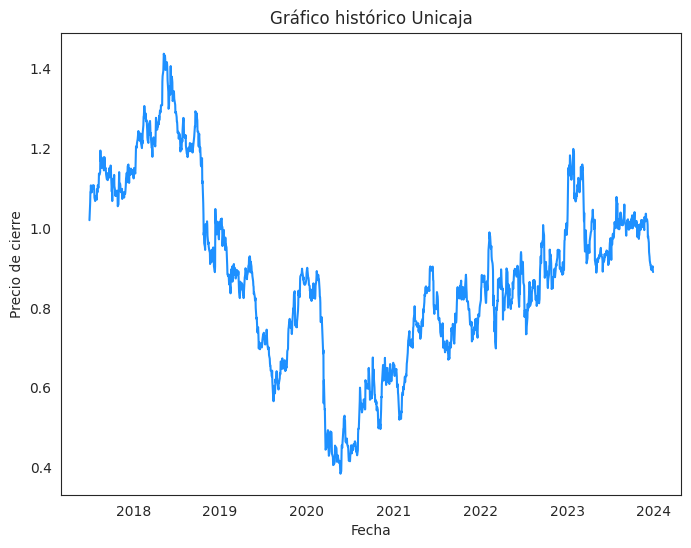

In [ ]:
plt.figure(figsize=(8, 6)) # Ajusta el tamaño del gráfico
plt.plot(ticker_model.Unicaja, color = "dodgerblue") # Realiza el gráfico de la variable seleccionada.
plt.title(f'Gráfico histórico {ticker.Unicaja.name}')  # Añade título al gráfico y utiliza el nombre de la serie como título
plt.ylabel('Precio de cierre') # Etiqueta del eje "y"
plt.xlabel('Fecha') # Etiqueta del eje "x"
plt.show() # Muestra el gráfico

count    1664.000000
mean        0.886080
std         0.223260
min         0.385006
25%         0.743703
50%         0.881354
75%         1.022000
max         1.436632
Name: Unicaja, dtype: float64

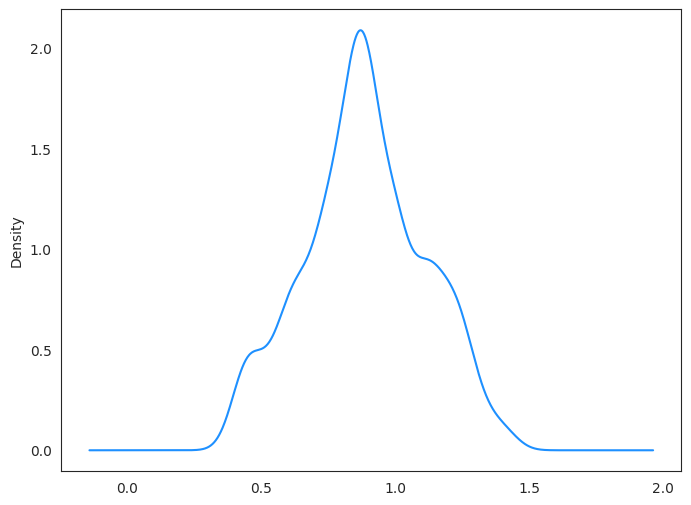

In [ ]:
# Revisamos el grafico de densidad para la serie de tiempo
ticker_model.Unicaja.plot(kind= 'kde', figsize = (8,6), color = "dodgerblue")
ticker_model.Unicaja.describe()

### **División de conjuntos de datos.**

A continuación se divide el conjunto de datos para disponer de conjuntos de entrenamiento y prueba para hacer validaciones.

In [ ]:
# Se divide el dataSet original en conjunto de train y test para hacer validaciones
train_data, test_data = train_test_split(ticker, test_size = 0.2, random_state = 0)
test = test_data.copy()

In [ ]:
# Se muestran las características del conjunto de train y test
print('Conjunto de Train: {} | Tipos: {}'.format(train_data.shape, train_data.dtypes))
print('Conjunto de Test: {} | Tipos: {}'.format(test_data.shape, test_data.dtypes))

Conjunto de Train: (1331, 1) | Tipos: Unicaja    float64
dtype: object
Conjunto de Test: (333, 1) | Tipos: Unicaja    float64
dtype: object


Se evidencia la división del conjunto de datos en dos partes distintas: Train, conunto de entretamiento, compuesta por el 80% de los registros, y Test, conjunto de pruebas, que contiene el 20% restante de los registros. Este proceso de división es fundamental para realizar una evaluación precisa del modelo, utilizando datos separados para entrenamiento y pruebas, lo que contribuye a una validación más robusta de la efectividad del sistema predictivo.

### **Análisis de Rendimientos**


A continuación se comproborá la relevancia del uso de rendimientos en series de tiempo. Los precios de los activos suelen ser no estacionarios, es decir, sus momentos, como la media y la varianza cambian con el tiempo. Esto también podría implicar la identificación de posibles tendencias o efectos estacionales en la serie de precios. Al transformar los precios en rendimientos, se busca estacionarizar la serie de tiempo, una propiedad fundamental en el modelado estadístico.


#### **Rendimientos simples**


Se agregan sobre los activos. Los rendimientos simples se definen como:

$$R_t=\frac{P_t-P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} -1$$

#### **Rendimientos logarítmicos**


Se agregan con el tiempo. Los rendimientos logarírtmicos se definen como:

$$R_t= log\frac{P_t}{P_{t-1}}= log(P_t)-log(P_{t-1})$$

Entre las ventajas del uso de rendimientos logarítmicos destacan:

- Distribución simplificada: Al convertir los cambios porcentuales a una escala logarítmica, se simplifica el análisis estadístico al transformar la distribución de precios a una distribución normal.

- Aproximación: Son precisos para calcular cambios en los precios, especialmente cuando son pequeños.

- Adición en el tiempo: Facilitan los cálculos y transformaciones de series temporales al permitir la suma de variables y la convergencia hacia una distribución normal.

- Estabilidad mejorada: Ayudan a estabilizar la variabilidad en los datos, lo que mejora la interpretación y la fiabilidad de las observaciones.


#### **Cálculo de rendimientos**

A continuación se calculan los rendimientos simples y logarítmicos de la serie temporal.

In [ ]:
ticker.rename(columns={"Unicaja": "Cierre"}, inplace= True) # Renombro la columna de cierre.
ticker['Rend_simple'] = ticker.Cierre.pct_change()
# pct_change es un método  que calcula el cambio porcentual entre valores consecutivos en una Serie
ticker['Rend_log'] = np.log(ticker.Cierre/ticker.Cierre.shift(1))
# Calcula el rendimiento logarítmico para cada dato de cierre en un conjunto de datos utilizando la fórmula del logaritmo natural
# aplicado al cociente entre el precio de cierre actual y el precio de cierre del periodo anterior.
ticker = ticker.dropna()
#Eliminar filas con valores NaN. La primera fila siempre contendrá un valor nulo(NaN), pues no existe valor anterior a utilizar para el cálculo de los rendimientos.
ticker

Cierre  Rend_simple  Rend_log
Date                                       
2017-07-03  1.063429     0.042735  0.041847
2017-07-04  1.089579     0.024590  0.024293
2017-07-05  1.089579     0.000000  0.000000
2017-07-06  1.107012     0.016000  0.015873
2017-07-07  1.098296    -0.007874 -0.007905
...              ...          ...       ...
2023-12-21  0.900000     0.001112  0.001112
2023-12-22  0.895000    -0.005556 -0.005571
2023-12-27  0.904500     0.010615  0.010559
2023-12-28  0.891500    -0.014373 -0.014477
2023-12-29  0.890000    -0.001683 -0.001684

[1663 rows x 3 columns]

A continuación, se presenta una comparación del rendimiento del activo financiero con sus rendimientos a través de las siguientes gráficas.

[Text(0.5, 0, 'Fecha'), Text(0, 0.5, 'Rendimientos logarítmicos (%)')]

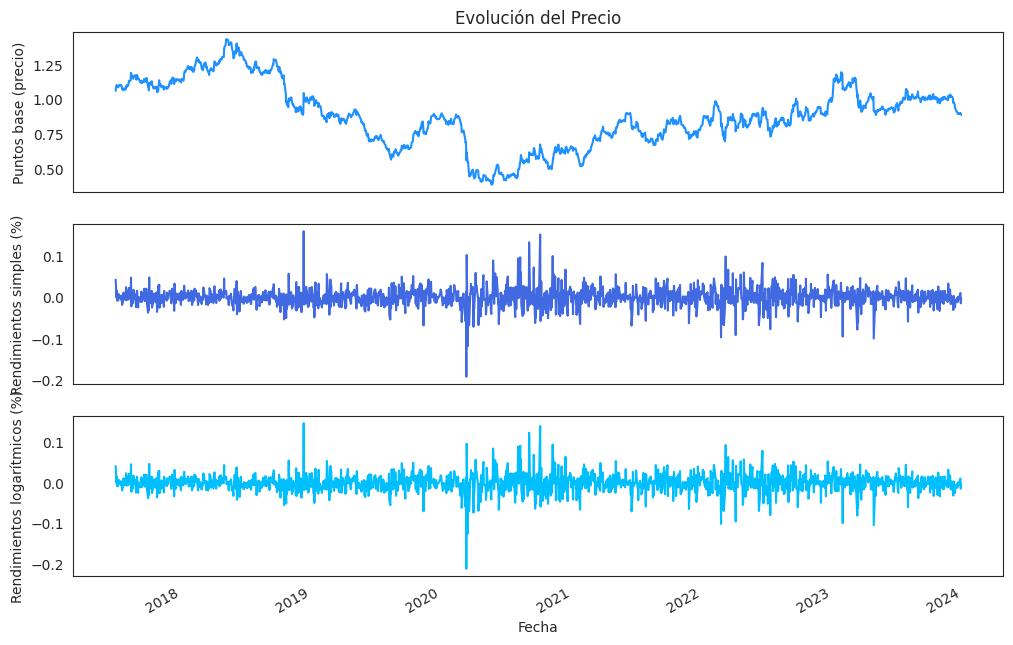

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
ticker.Cierre.plot(ax=ax[0], color = "dodgerblue")
ax[0].set(title = 'Evolución del Precio',
ylabel = 'Puntos base (precio)')
ticker.Rend_simple.plot(ax=ax[1], color = "royalblue")
ax[1].set(ylabel = 'Rendimientos simples (%)')
ticker.Rend_log.plot(ax=ax[2], color = "deepskyblue")
ax[2].set(xlabel = 'Fecha',
ylabel = 'Rendimientos logarítmicos (%)')

Cada una de las gráficas representa una serie diferente y muestra los períodos de mayor volatilidad, así como lo que estaba ocurriendo simultáneamente con el precio. El primer gráfico exhibe el precio de cierre en niveles. El segundo gráfico representa los rendimientos simples calculados, mientras que el tercer gráfico muestra los rendimientos logarítmicos, permitiendo visualizar una clara similitud entre ambos tipos de rendimientos.

### **Análisis con Ventanas Móviles**

El empleo de ventanas móviles tiene como objetivo suavizar las series temporales y facilitar el análisis de su tendencia. A medida que la ventana de tiempo se amplía, la suavización aumenta y, por lo tanto, la tendencia se distingue más claramente. En este contexto, se procede a calcular la media y la desviación estándar móviles sobre los precios de cierre.

In [ ]:
ticker_rolling = ticker[['Cierre']].rolling(window=21).agg(['mean', 'std']) #se puede cambiar la ventana móvil
ticker_rolling.columns = ticker_rolling.columns.droplevel() #mean = media, std= desviación estándar
ticker_rolling.tail()

mean       std
Date                          
2023-12-21  0.975262  0.051025
2023-12-22  0.968929  0.052388
2023-12-27  0.963429  0.052819
2023-12-28  0.957452  0.053549
2023-12-29  0.950500  0.052305

A continuación se grafica la media y desviaciones móviles

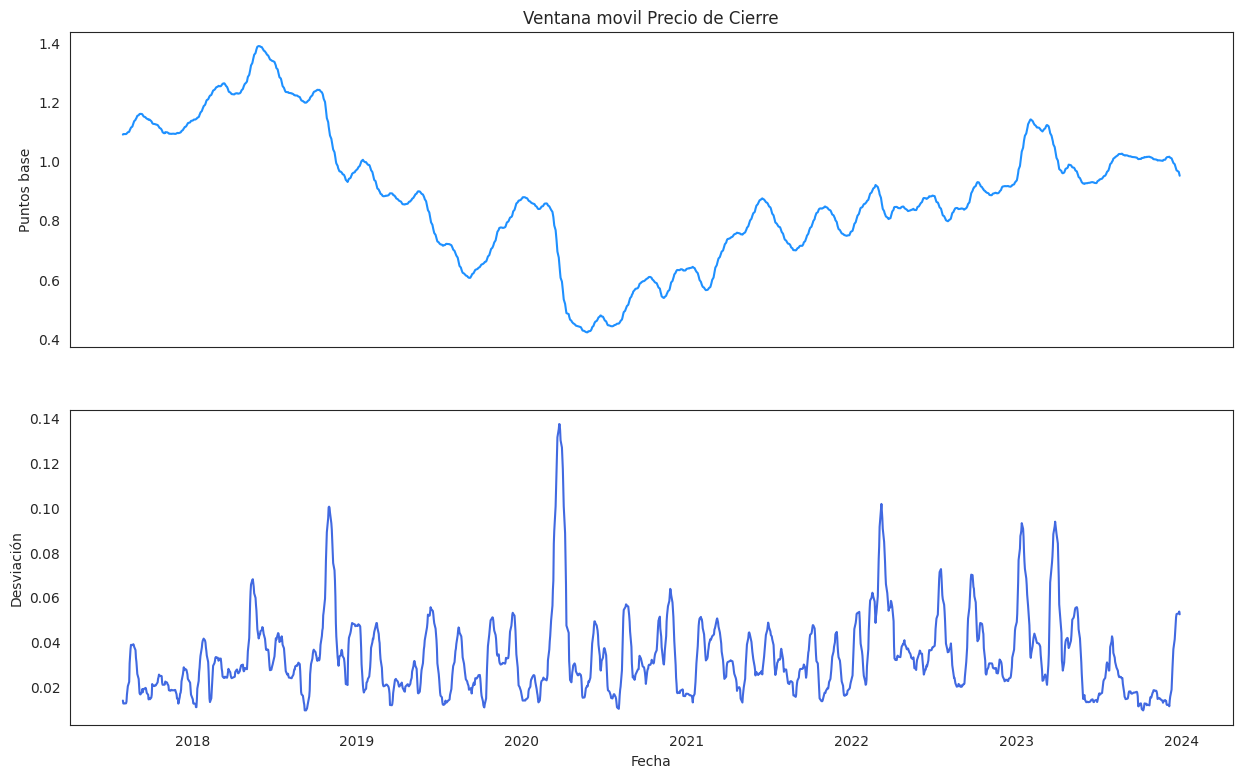

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True,figsize=(15, 9))
ax[0].plot(ticker_rolling['mean'], color = "dodgerblue")
ax[0].set(title = 'Ventana movil Precio de Cierre', ylabel = 'Puntos base')
ax[1].plot(ticker_rolling['std'], color = "royalblue")
ax[1].set(ylabel = 'Desviación', xlabel="Fecha")
plt.show()

### **Identificación de outliers**


Al trabajar con datos de cualquier tipo, es común encontrarnos con observaciones que se apartan significativamente de la mayoría, conocidas como valores atípicos (outliers). Estos pueden surgir debido a diversos factores, como errores en los datos, eventos importantes en los mercados financieros o simplemente días de alta volatilidad que distorsionan los precios.

Los modelos estadísticos pueden ser sensibles a la presencia de valores atípicos, lo que puede resultar en predicciones incorrectas o sesgadas. Por esta razón, es fundamental abordar los valores atípicos antes de construir cualquier modelo analítico o predictivo.


A continuación se emplean métodos consistentes para identificar outliers en cada caso, utilizando una ventana móvil para calcular la media y la desviación estándar y aplicando una regla de más de tres desviaciones estándar para identificar los valores atípicos. Este enfoque permite detectar anomalías en los datos.

#### **Preparación de los datos**

A continuación, se define una función para identificar los outliers.

In [ ]:
def identifica_outlier(row, x_column, mu_column, sigma_column, n_sigmas=3):
    x = row[x_column]
    mu = row[mu_column]
    sigma = row[sigma_column]
    if (x > mu + n_sigmas * sigma) or (x < mu - n_sigmas * sigma):
        return 1
    else:
        return 0

Retoma el cálculo de la ventana móvil, ahora sobre los rendimientos uniendo con join las métricas móviles a los datos originales:

In [ ]:
ticker_rolling = ticker[['Cierre', 'Rend_simple', 'Rend_log']].rolling(window=252).agg(['mean', 'std'])
ticker_rolling = ticker_rolling.dropna() #Eliminar las filas con valores NaN
# Renombrar las columnas de ticker_rolling_reset para evitar duplicados
ticker_rolling.columns = ['(Cierre, mean)', '(Cierre, std)', '(Rend_simple, mean)', '(Rend_simple, std)', '(Rend_log, mean)', '(Rend_log, std)']
ticker_rolling

(Cierre, mean)  (Cierre, std)  (Rend_simple, mean)  \
Date                                                             
2018-06-27        1.195998       0.098590             0.001029   
2018-06-28        1.196900       0.098413             0.000867   
2018-06-29        1.197699       0.098355             0.000770   
2018-07-02        1.198448       0.098247             0.000732   
2018-07-03        1.199080       0.098169             0.000630   
...                    ...            ...                  ...   
2023-12-21        1.009140       0.069447            -0.000267   
2023-12-22        1.008791       0.069799            -0.000188   
2023-12-27        1.008386       0.070108            -0.000242   
2023-12-28        1.007826       0.070476            -0.000401   
2023-12-29        1.007106       0.070749            -0.000558   

            (Rend_simple, std)  (Rend_log, mean)  (Rend_log, std)  
Date                                                               
2018-06-27            0.014298          0.000927         0.014264  
2018-06-28            0.014052          0.000769         0.014027  
2018-06-29            0.013972          0.000673         0.013948  
2018-07-02            0.013987          0.000634         0.013963  
2018-07-03            0.013969          0.000533         0.013945  
...                        ...               ...              ...  
2023-12-21            0.019085         -0.000452         0.019360  
2023-12-22            0.019021         -0.000372         0.019296  
2023-12-27            0.018970         -0.000425         0.019247  
2023-12-28            0.018920         -0.000583         0.019199  
2023-12-29            0.018765         -0.000737         0.019050  

[1412 rows x 6 columns]

In [ ]:
# Eliminar un nivel de los nombres de las columnas
ticker_outliers = ticker.join(ticker_rolling)
ticker_outliers = ticker_outliers.dropna() #Eliminar las filas con valores NaN
ticker_outliers

Cierre  Rend_simple  Rend_log  (Cierre, mean)  (Cierre, std)  \
Date                                                                         
2018-06-27  1.288198    -0.015530 -0.015652        1.195998       0.098590   
2018-06-28  1.290848     0.002058  0.002056        1.196900       0.098413   
2018-06-29  1.290848     0.000000  0.000000        1.197699       0.098355   
2018-07-02  1.278479    -0.009582 -0.009629        1.198448       0.098247   
2018-07-03  1.266109    -0.009675 -0.009722        1.199080       0.098169   
...              ...          ...       ...             ...            ...   
2023-12-21  0.900000     0.001112  0.001112        1.009140       0.069447   
2023-12-22  0.895000    -0.005556 -0.005571        1.008791       0.069799   
2023-12-27  0.904500     0.010615  0.010559        1.008386       0.070108   
2023-12-28  0.891500    -0.014373 -0.014477        1.007826       0.070476   
2023-12-29  0.890000    -0.001683 -0.001684        1.007106       0.070749   

            (Rend_simple, mean)  (Rend_simple, std)  (Rend_log, mean)  \
Date                                                                    
2018-06-27             0.001029            0.014298          0.000927   
2018-06-28             0.000867            0.014052          0.000769   
2018-06-29             0.000770            0.013972          0.000673   
2018-07-02             0.000732            0.013987          0.000634   
2018-07-03             0.000630            0.013969          0.000533   
...                         ...                 ...               ...   
2023-12-21            -0.000267            0.019085         -0.000452   
2023-12-22            -0.000188            0.019021         -0.000372   
2023-12-27            -0.000242            0.018970         -0.000425   
2023-12-28            -0.000401            0.018920         -0.000583   
2023-12-29            -0.000558            0.018765         -0.000737   

            (Rend_log, std)  
Date                         
2018-06-27         0.014264  
2018-06-28         0.014027  
2018-06-29         0.013948  
2018-07-02         0.013963  
2018-07-03         0.013945  
...                     ...  
2023-12-21         0.019360  
2023-12-22         0.019296  
2023-12-27         0.019247  
2023-12-28         0.019199  
2023-12-29         0.019050  

[1412 rows x 9 columns]

A continuación se identifican los valores atípicos del precio de cierre y se extraen sus valores para su uso posterior.

In [ ]:
# Llamada para  el precio de cierre
ticker_outliers['outlier'] = ticker_outliers.apply(
    lambda row: identifica_outlier(row, 'Cierre', '(Cierre, mean)', '(Cierre, std)'), axis=1
)
# Outliers identificados
outliers_cierre = ticker_outliers.loc[ticker_outliers['outlier'] == 1, ['Cierre']]
outliers_count_cierre = ticker_outliers.loc[ticker_outliers['outlier'] == 1, ['Cierre']].shape[0]
# Crear un nuevo DataFrame solo con los valores de cierre que no son outliers
ticker_cierre_sin_outliers = ticker_outliers[(ticker_outliers['outlier'] == 0)][['Cierre']]
# Mostrar el nuevo DataFrame sin outliers
print(ticker_cierre_sin_outliers)

              Cierre
Date                
2018-06-27  1.288198
2018-06-28  1.290848
2018-06-29  1.290848
2018-07-02  1.278479
2018-07-03  1.266109
...              ...
2023-12-21  0.900000
2023-12-22  0.895000
2023-12-27  0.904500
2023-12-28  0.891500
2023-12-29  0.890000

[1391 rows x 1 columns]


#### **Rendimiento Simple**

Identifica los valores atípicos y extrae sus valores para su uso posterior

In [ ]:
# Llamada para rendimientos simples
ticker_outliers['outlier_simple'] = ticker_outliers.apply(
    lambda row: identifica_outlier(row, 'Rend_simple', '(Rend_simple, mean)', '(Rend_simple, std)'), axis=1
)
ticker_outliers

Cierre  Rend_simple  Rend_log  (Cierre, mean)  (Cierre, std)  \
Date                                                                         
2018-06-27  1.288198    -0.015530 -0.015652        1.195998       0.098590   
2018-06-28  1.290848     0.002058  0.002056        1.196900       0.098413   
2018-06-29  1.290848     0.000000  0.000000        1.197699       0.098355   
2018-07-02  1.278479    -0.009582 -0.009629        1.198448       0.098247   
2018-07-03  1.266109    -0.009675 -0.009722        1.199080       0.098169   
...              ...          ...       ...             ...            ...   
2023-12-21  0.900000     0.001112  0.001112        1.009140       0.069447   
2023-12-22  0.895000    -0.005556 -0.005571        1.008791       0.069799   
2023-12-27  0.904500     0.010615  0.010559        1.008386       0.070108   
2023-12-28  0.891500    -0.014373 -0.014477        1.007826       0.070476   
2023-12-29  0.890000    -0.001683 -0.001684        1.007106       0.070749   

            (Rend_simple, mean)  (Rend_simple, std)  (Rend_log, mean)  \
Date                                                                    
2018-06-27             0.001029            0.014298          0.000927   
2018-06-28             0.000867            0.014052          0.000769   
2018-06-29             0.000770            0.013972          0.000673   
2018-07-02             0.000732            0.013987          0.000634   
2018-07-03             0.000630            0.013969          0.000533   
...                         ...                 ...               ...   
2023-12-21            -0.000267            0.019085         -0.000452   
2023-12-22            -0.000188            0.019021         -0.000372   
2023-12-27            -0.000242            0.018970         -0.000425   
2023-12-28            -0.000401            0.018920         -0.000583   
2023-12-29            -0.000558            0.018765         -0.000737   

            (Rend_log, std)  outlier  outlier_simple  
Date                                                  
2018-06-27         0.014264        0               0  
2018-06-28         0.014027        0               0  
2018-06-29         0.013948        0               0  
2018-07-02         0.013963        0               0  
2018-07-03         0.013945        0               0  
...                     ...      ...             ...  
2023-12-21         0.019360        0               0  
2023-12-22         0.019296        0               0  
2023-12-27         0.019247        0               0  
2023-12-28         0.019199        0               0  
2023-12-29         0.019050        0               0  

[1412 rows x 11 columns]

Se identifican los valores atípicos. Primero se muestran los outliers y luego se realiza un conteo de los mismos.

In [ ]:
# Outliers
outliers_simple = ticker_outliers.loc[ticker_outliers['outlier_simple'] == 1, ['Rend_simple']]
outliers_count_simple = ticker_outliers.loc[ticker_outliers['outlier_simple'] == 1, ['Rend_simple']].shape[0]
outliers_simple #Se muestra el resultado de los Outliers

Rend_simple
Date                   
2018-10-18    -0.053384
2018-10-22    -0.049012
2018-10-24    -0.049573
2018-10-31     0.057010
2018-12-12     0.159335
2019-11-13    -0.067797
2020-02-28    -0.059685
2020-03-09    -0.057178
2020-03-12    -0.191419
2020-03-13     0.102041
2020-03-16    -0.117778
2020-05-26     0.088993
2020-08-04     0.094008
2020-08-10     0.096507
2020-09-04     0.132439
2020-10-05     0.151444
2021-11-26    -0.062500
2022-02-24    -0.096573
2022-02-28    -0.064696
2022-03-04    -0.067069
2022-03-09     0.098475
2022-04-06    -0.091062
2022-06-20     0.082873
2023-01-31    -0.094779
2023-03-13    -0.077787
2023-04-28    -0.099412

A continuación, se genera un gráfico que muestra el resultado junto con el número de valores atípicos (outliers) para el rendimiento simple.

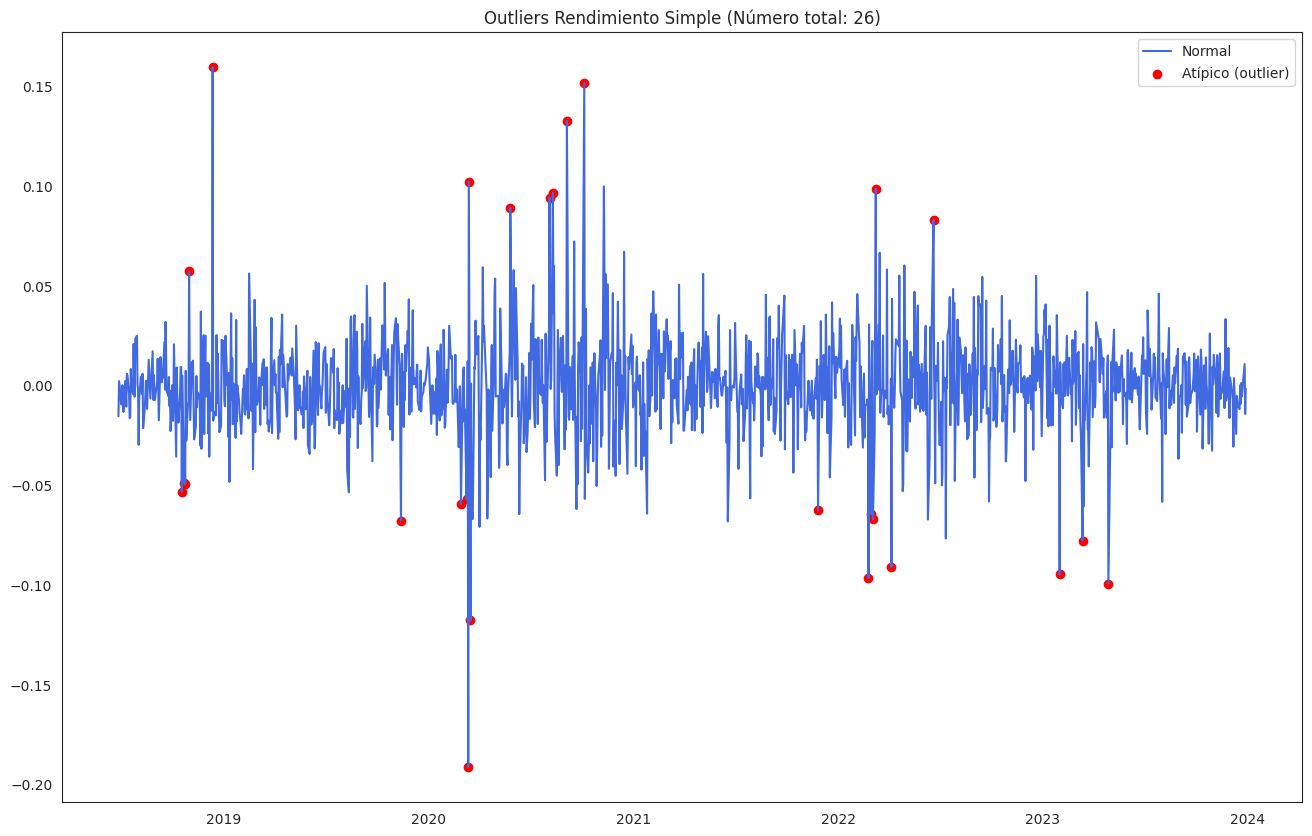

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(ticker_outliers.index,
        ticker_outliers.Rend_simple,
        color='royalblue',
        label='Normal')
ax.scatter(outliers_simple.index,
           outliers_simple.Rend_simple,
           color='red',
           label='Atípico (outlier)')
ax.set_title(f"Outliers Rendimiento Simple (Número total: {outliers_count_simple})")
ax.legend(loc='upper right')


En el gráfico, se pueden identificar los valores atípicos señalados con un punto rojo. Es importante destacar que cuando hay dos rendimientos significativos, el algoritmo clasifica el primero como un valor atípico y el segundo como una observación regular. Esto se debe a que el primer valor atípico afecta a la media móvil y la desviación estándar al entrar en la ventana móvil.

Además, es necesario considerar el efecto conocido como "efecto fantasma" o "función ghost". Cuando un valor atípico entra en la ventana móvil, distorsiona los valores de las estadísticas de la ventana móvil mientras permanece dentro de ella.

Con el propósito de obtener un conjunto de datos más depurado, se procede a la creación de un nuevo conjunto excluyendo los outliers identificados previamente.

In [ ]:
# Crear un nuevo DataFrame solo con los valores de cierre que no son outliers
ticker_Rend_simple_sin_outliers = ticker_outliers[(ticker_outliers['outlier_simple'] == 0)][['Rend_simple']]
# Mostrar el nuevo DataFrame sin outliers
print(ticker_Rend_simple_sin_outliers)

            Rend_simple
Date                   
2018-06-27    -0.015530
2018-06-28     0.002058
2018-06-29     0.000000
2018-07-02    -0.009582
2018-07-03    -0.009675
...                 ...
2023-12-21     0.001112
2023-12-22    -0.005556
2023-12-27     0.010615
2023-12-28    -0.014373
2023-12-29    -0.001683

[1386 rows x 1 columns]


#### **Rendimiento Logaritmico**

Identifica los valores atípicos y extrae sus valores para su uso posterior.

In [ ]:
# Llamada para rendimientos Logaritmicos
ticker_outliers['outlier_log'] = ticker_outliers.apply(
    lambda row: identifica_outlier(row, 'Rend_log', '(Rend_log, mean)', '(Rend_log, std)'), axis=1
)
ticker_outliers

Cierre  Rend_simple  Rend_log  (Cierre, mean)  (Cierre, std)  \
Date                                                                         
2018-06-27  1.288198    -0.015530 -0.015652        1.195998       0.098590   
2018-06-28  1.290848     0.002058  0.002056        1.196900       0.098413   
2018-06-29  1.290848     0.000000  0.000000        1.197699       0.098355   
2018-07-02  1.278479    -0.009582 -0.009629        1.198448       0.098247   
2018-07-03  1.266109    -0.009675 -0.009722        1.199080       0.098169   
...              ...          ...       ...             ...            ...   
2023-12-21  0.900000     0.001112  0.001112        1.009140       0.069447   
2023-12-22  0.895000    -0.005556 -0.005571        1.008791       0.069799   
2023-12-27  0.904500     0.010615  0.010559        1.008386       0.070108   
2023-12-28  0.891500    -0.014373 -0.014477        1.007826       0.070476   
2023-12-29  0.890000    -0.001683 -0.001684        1.007106       0.070749   

            (Rend_simple, mean)  (Rend_simple, std)  (Rend_log, mean)  \
Date                                                                    
2018-06-27             0.001029            0.014298          0.000927   
2018-06-28             0.000867            0.014052          0.000769   
2018-06-29             0.000770            0.013972          0.000673   
2018-07-02             0.000732            0.013987          0.000634   
2018-07-03             0.000630            0.013969          0.000533   
...                         ...                 ...               ...   
2023-12-21            -0.000267            0.019085         -0.000452   
2023-12-22            -0.000188            0.019021         -0.000372   
2023-12-27            -0.000242            0.018970         -0.000425   
2023-12-28            -0.000401            0.018920         -0.000583   
2023-12-29            -0.000558            0.018765         -0.000737   

            (Rend_log, std)  outlier  outlier_simple  outlier_log  
Date                                                               
2018-06-27         0.014264        0               0            0  
2018-06-28         0.014027        0               0            0  
2018-06-29         0.013948        0               0            0  
2018-07-02         0.013963        0               0            0  
2018-07-03         0.013945        0               0            0  
...                     ...      ...             ...          ...  
2023-12-21         0.019360        0               0            0  
2023-12-22         0.019296        0               0            0  
2023-12-27         0.019247        0               0            0  
2023-12-28         0.019199        0               0            0  
2023-12-29         0.019050        0               0            0  

[1412 rows x 12 columns]

Se identifican los valores atípicos. Primero se muestran los outliers y luego se realiza un conteo de los mismos.

In [ ]:
# Outliers log
outliers_log = ticker_outliers.loc[ticker_outliers['outlier_log'] == 1, ['Rend_log']]
outliers_count_log= ticker_outliers.loc[ticker_outliers['outlier_log'] == 1, ['Rend_log']].shape[0]
outliers_log #Se muestra el resultado de los Outliers

Rend_log
Date                
2018-10-18 -0.054861
2018-10-22 -0.050254
2018-10-24 -0.050844
2018-10-31  0.055444
2018-12-12  0.147847
2019-11-13 -0.070204
2020-02-28 -0.061540
2020-03-09 -0.058877
2020-03-12 -0.212475
2020-03-13  0.097164
2020-03-16 -0.125311
2020-05-26  0.085254
2020-09-04  0.124374
2020-10-05  0.141017
2021-11-26 -0.064538
2022-02-24 -0.101560
2022-02-28 -0.066884
2022-03-04 -0.069425
2022-03-09  0.093923
2022-04-06 -0.095479
2022-06-20  0.079618
2022-07-12 -0.079843
2023-01-31 -0.099576
2023-03-13 -0.080979
2023-04-28 -0.104708

A continuación, se genera un gráfico que muestra el resultado junto con el número de valores atípicos (outliers) para el rendimiento.

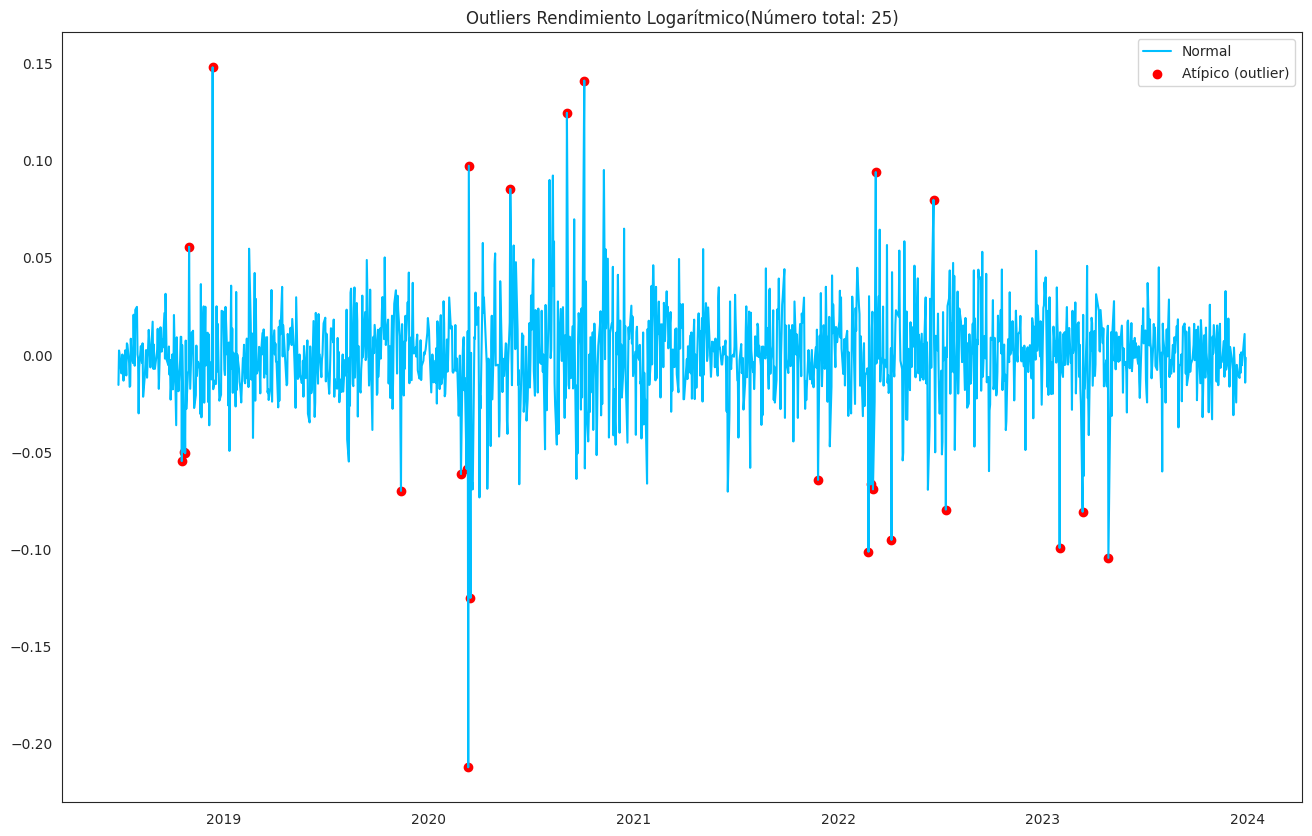

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(ticker_outliers.index,
        ticker_outliers.Rend_log,
        color='deepskyblue',
        label='Normal')
ax.scatter(outliers_log.index,
           outliers_log.Rend_log,
           color='red',
           label='Atípico (outlier)')
ax.set_title(f"Outliers Rendimiento Logarítmico(Número total: {outliers_count_log})")
ax.legend(loc='upper right')


En el gráfico, se pueden identificar los valores atípicos señalados con un punto rojo. Es importante destacar que cuando hay dos rendimientos significativos, el algoritmo clasifica el primero como un valor atípico y el segundo como una observación regular. Esto se debe a que el primer valor atípico afecta a la media móvil y la desviación estándar al entrar en la ventana móvil.

Además, es necesario considerar el efecto conocido como "efecto fantasma" o "función ghost". Cuando un valor atípico entra en la ventana móvil, distorsiona los valores de las estadísticas de la ventana móvil mientras permanece dentro de ella.

Con el propósito de obtener un conjunto de datos más depurado, se procede a la creación de un nuevo conjunto excluyendo los outliers identificados previamente.

In [ ]:
# Crear un nuevo DataFrame solo con los valores que no son outliers
ticker_Rend_log_sin_outliers = ticker_outliers[(ticker_outliers['outlier_log'] == 0)][['Rend_log']]
# Mostrar el nuevo DataFrame sin outliers
print(ticker_Rend_log_sin_outliers)

            Rend_log
Date                
2018-06-27 -0.015652
2018-06-28  0.002056
2018-06-29  0.000000
2018-07-02 -0.009629
2018-07-03 -0.009722
...              ...
2023-12-21  0.001112
2023-12-22 -0.005571
2023-12-27  0.010559
2023-12-28 -0.014477
2023-12-29 -0.001684

[1387 rows x 1 columns]


#### **Comparación de rendimientos**

A continuación se muestra una gráfica en la que se comparan los rendimientos, así como los outliers.

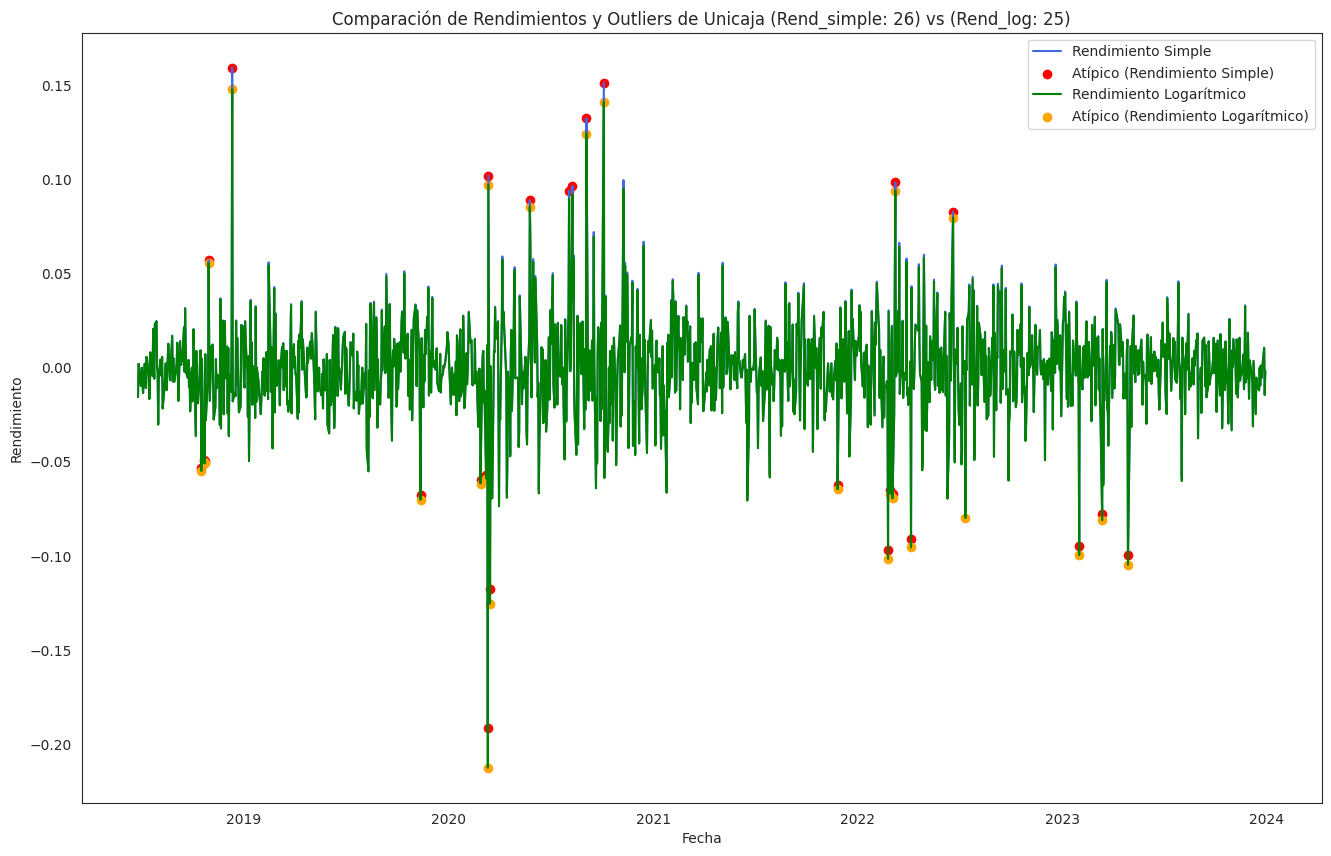

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

# Graficar rendimientos simples
ax.plot(ticker_outliers.index, ticker_outliers.Rend_simple, color='royalblue', label='Rendimiento Simple')
# Marcar outliers de rendimientos simples
ax.scatter(outliers_simple.index, outliers_simple.Rend_simple, color='red', label='Atípico (Rendimiento Simple)')

# Graficar rendimientos logarítmicos
ax.plot(ticker_outliers.index, ticker_outliers.Rend_log, color='green', label='Rendimiento Logarítmico')
# Marcar outliers de rendimientos logarítmicos
ax.scatter(outliers_log.index, outliers_log.Rend_log, color='orange', label='Atípico (Rendimiento Logarítmico)')

#Ajustes
ax.set_title(
                f"Comparación de Rendimientos y Outliers de Unicaja (Rend_simple: {outliers_count_simple})"
                f" vs (Rend_log: {outliers_count_log})"
                )
ax.set_xlabel("Fecha")
ax.set_ylabel("Rendimiento")
ax.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

A continuación, se realizan los siguiente BoxPlot para continuar con la identificación de los outliers.

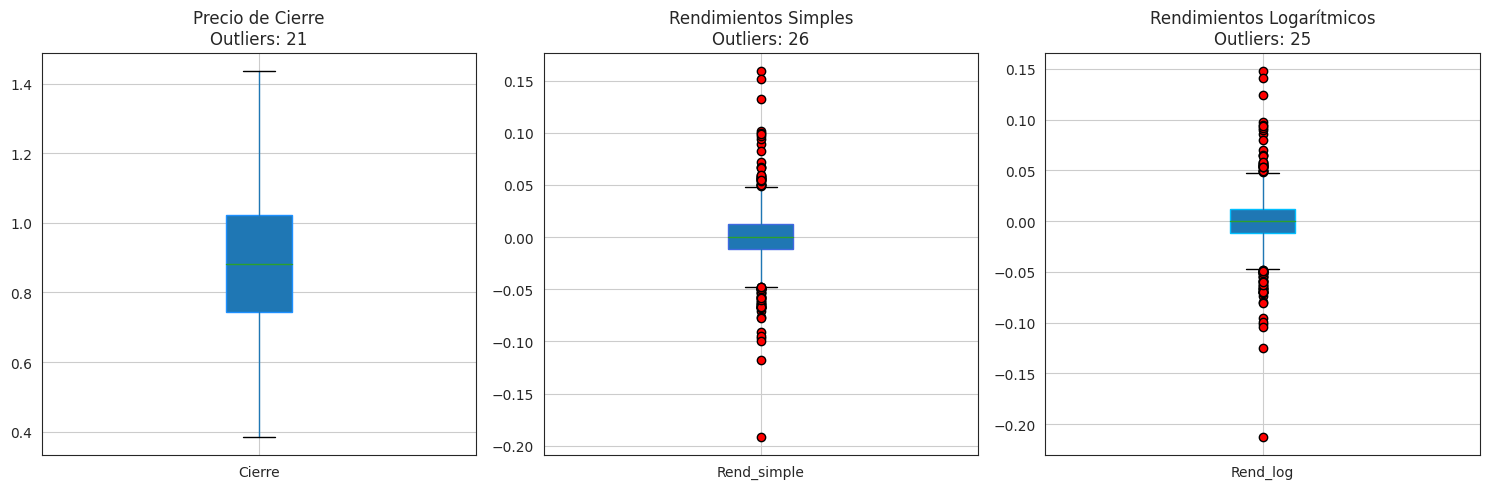

In [ ]:
# Crear una figura y ejes para las tres gráficas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graficar para el precio de cierre
ticker.boxplot(column='Cierre', vert=True, patch_artist=True, boxprops=dict(color='dodgerblue'),
               flierprops=dict(markerfacecolor='red', marker='o'), ax=axes[0])
axes[0].set_title(f'Precio de Cierre\nOutliers: {outliers_count_cierre}')


# Graficar para los rendimientos simples
ticker.boxplot(column='Rend_simple', vert=True, patch_artist=True, boxprops=dict(color='royalblue'),
               flierprops=dict(markerfacecolor='red', marker='o'), ax=axes[1])
axes[1].set_title(f'Rendimientos Simples\nOutliers: {outliers_count_simple}')

# Graficar para los rendimientos logarítmicos
ticker.boxplot(column='Rend_log', vert=True, patch_artist=True, boxprops=dict(color='deepskyblue'),
               flierprops=dict(markerfacecolor='red', marker='o'), ax=axes[2])
axes[2].set_title(f'Rendimientos Logarítmicos\nOutliers: {outliers_count_log}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Como se ha podido observar tanto el rendimiento simple como el logarítmico son prácticamente similares, y además, su número de outliers es prácticamente el mismo.


## **Estadística descriptiva**


Primero comprobamos como está generado el conjunto de datos.

Text(0, 0.5, 'Precio de Cierre')

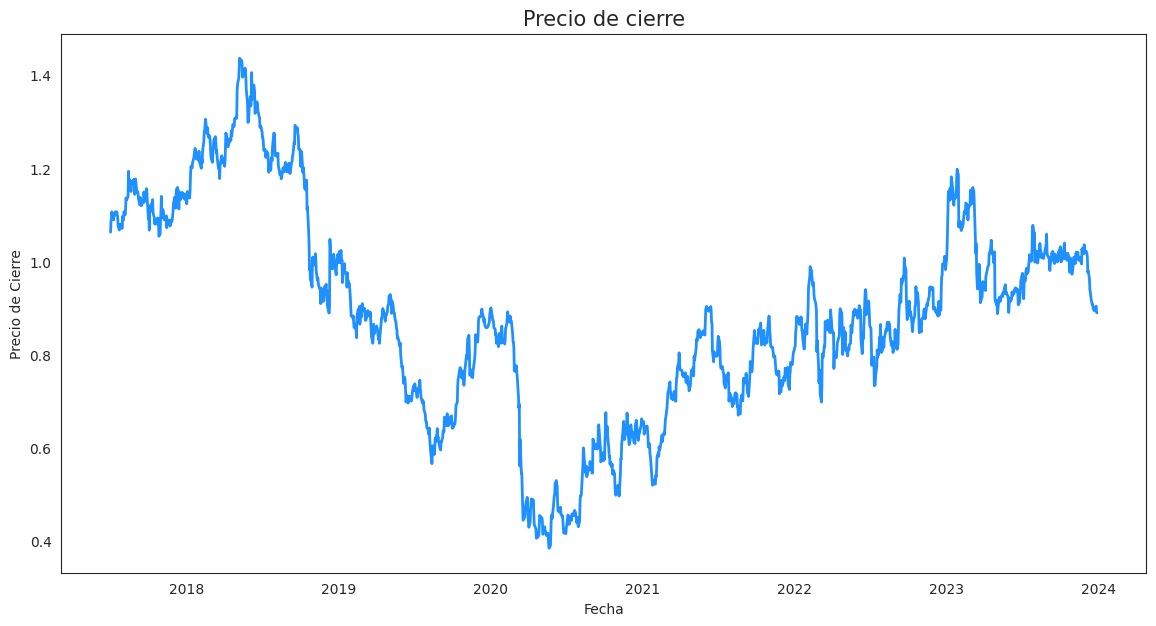

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(ticker.Cierre, lw=2, color="dodgerblue",)
plt.title("Precio de cierre", fontsize=15);
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')

Después de realizar un análisis exhaustivo de la evolución de los datos durante el período establecido, se ha observado un patrón cíclico distintivo. Este patrón se caracteriza por la presencia de fases de tendencia alcista seguidas de períodos de declive, los cuales son sucedidos nuevamente por fases de recuperación. A partir del año 2021 una tendencia ascendente en los puntos de soporte ha sido identificada de manera consistente. Este ciclo se observa de manera consistente a lo largo de todo el conjunto de datos, manifestando una alternancia entre las tendencias ascendentes y descendentes a lo largo del tiempo. Esta observación sugiere que la serie que estamos examinando no es verdaderamente estacionaria, dado que presenta una tendencia ascendente a lo largo del tiempo. Además, se puede identificar la presencia de estacionalidad en los datos.

La estadística descriptiva permite conocer los aspectos básicos de nuestras variables, específicamente:

- Número de observaciones (count).
- Media (mean).
- Desviación estándar (std).
- Dato máximo de la muestra (max).
- Dato mínimo de la muestra (min).
- Quartiles ordenados de menor a mayor (25%, 50%, 75%).

A continuación se obtiene la estadística descriptiva de la variable de estudio, en ella podemos observar los valores indicados.


In [ ]:
# Estadística descriptiva
ticker.describe()

Cierre  Rend_simple     Rend_log
count  1663.000000  1663.000000  1663.000000
mean      0.885999     0.000190    -0.000082
std       0.223303     0.023309     0.023355
min       0.385006    -0.191419    -0.212475
25%       0.743521    -0.011533    -0.011600
50%       0.881329     0.000000     0.000000
75%       1.022000     0.012432     0.012355
max       1.436632     0.159335     0.147847

Estos valores representan estadísticas descriptivas del precio de cierre, rendimientos simples y rendimientos logarítmicos de las acciones durante el período comprendido en el estudio. A continuación, detallaremos la columna del precio de cierre:

- Count (Conteo): Indica el número total de observaciones disponibles para el precio de cierre de las acciones durante el período de tiempo especificado. En este caso, hay 1663 observaciones.
- Mean (Media): Es el promedio del precio de cierre de las acciones durante el período de tiempo especificado. En este caso, la media es de aproximadamente 0.885.
- Std (Desviación Estándar): Representa la dispersión de los datos en torno a la media. En este caso, la desviación estándar es de aproximadamente 0.223, lo que sugiere que hay cierta variabilidad en los precios de cierre.
- Min (Mínimo): Es el precio más bajo registrado durante el período de tiempo analizado. En este caso, el precio mínimo es de 0.385.
- 25%, 50%, 75% (Percentiles): Estos percentiles dividen los datos ordenados en cuatro partes iguales. El 25% indica que el 25% de los precios están por debajo de ese valor, el 50% es la mediana (la mitad de los precios están por encima y la otra mitad por debajo) y el 75% indica que el 75% de los precios están por debajo de ese valor.
- Max (Máximo): Es el precio más alto registrado durante el período de tiempo analizado. En este caso, el precio máximo es de 1.436.
    
Como hemos podido comprobar estas estadísticas proporcionan una visión general del comportamiento del precio de cierre de las acciones durante el período de tiempo especificado, incluyendo su tendencia central, variabilidad y la distribución de los precios.


#### **Histograma**

Un histograma es un gráfico que muestra la distribución de frecuencia (o forma) de un conjunto de datos continuos.

Esto permite analizar la distribución subyacente (por ejemplo, distribución normal) de una variable, así como sus valores atípicos y asimetría.

Para construir un histograma a partir de una variable continua se debe:

*   Identificar el rango de los datos.
*   Construir los intervalos de clase.
*   Graficar el histograma.

Para el histograma se requiere de la función de densidad de probabilidad (PDF por sus siglas en inglés). La PDF de una variable aleatoria continua describe la probabilidad de que una variable aleatoria tomará determinado valor.

La función de densidad de probabilidad para una distribución normal es:

$$f(x)= \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\left ( \frac{x-\mu }{\sigma } \right )^{2}}$$

o,

$$f(x)= \frac{e\left (-x^{2}/2  \right )}{\sqrt{2\pi}}$$

Para cualquier número real $x$.

La densidad de probabilidad está definida de forma "estandarizada". Para desplazar y/o escalar la distribución, se utilizan los parámetros *loc* y *scale* de la función 'norm_pdf'.

#### **Gráficas de histograma**

Las gráficas de histograma nos permiten visualizar la distribución de una variable al representar la frecuencia de ocurrencia de diferentes valores dentro de un rango específico. Estas representaciones ofrecen una visión detallada de la volatilidad y el comportamiento histórico del activo, lo que resulta fundamental para el análisis financiero.

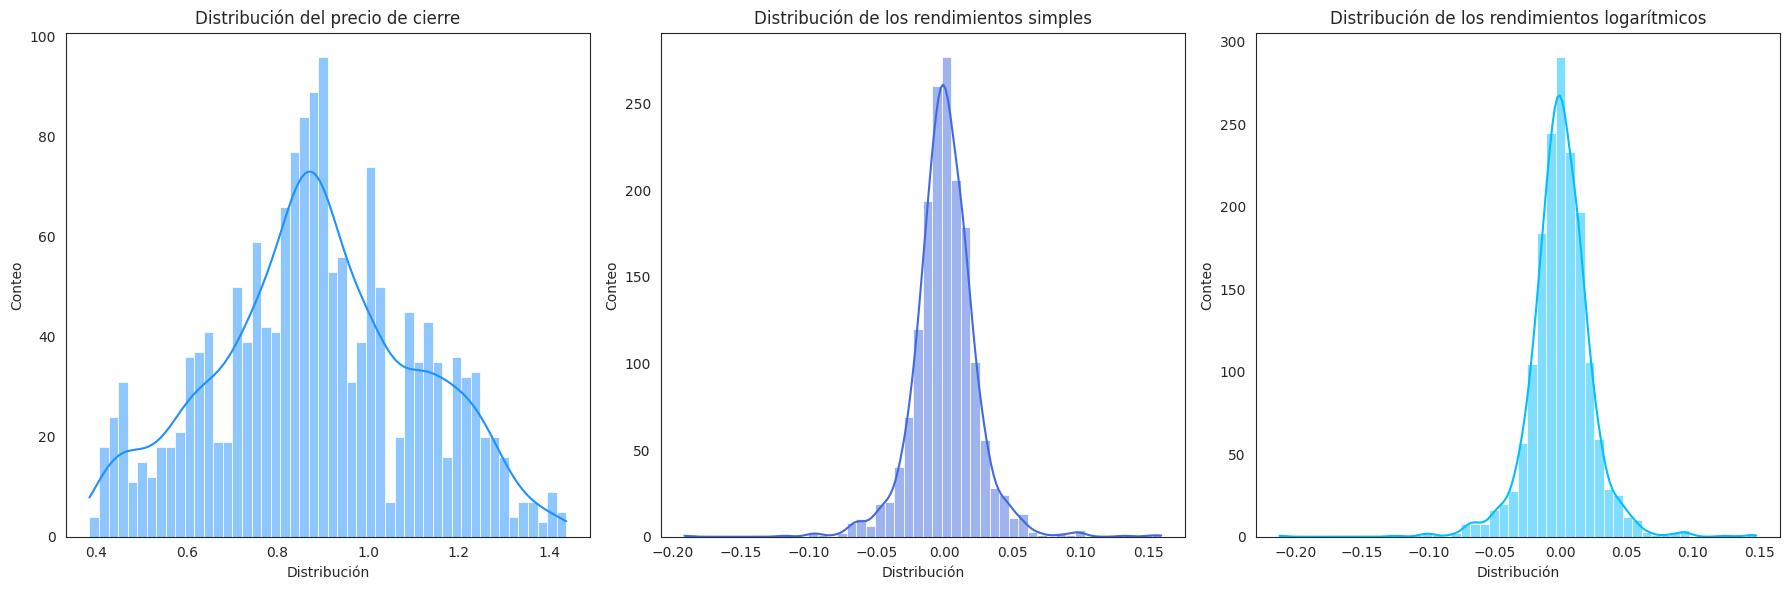

In [ ]:
# Crear una figura y ejes para las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar la distribución del precio de cierre
sns.histplot(data=ticker, color="dodgerblue", x="Cierre", kde=True, bins=50, ax=axes[0])
axes[0].set_xlabel("Distribución")
axes[0].set_ylabel("Conteo")
axes[0].set_title("Distribución del precio de cierre")

# Graficar la distribución de los rendimientos simples
sns.histplot(data=ticker, color="royalblue", x="Rend_simple", kde=True, bins=50, ax=axes[1])
axes[1].set_xlabel("Distribución")
axes[1].set_ylabel("Conteo")
axes[1].set_title("Distribución de los rendimientos simples")

# Graficar la distribución de los rendimientos logarítmicos
sns.histplot(data=ticker, color="deepskyblue", x="Rend_log", kde=True, bins=50, ax=axes[2])
axes[2].set_xlabel("Distribución")
axes[2].set_ylabel("Conteo")
axes[2].set_title("Distribución de los rendimientos logarítmicos")

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

La figura muestra la distribución del precio de cierre, los rendimientos simples y los rendimientos logarítmicos del activo financiero. Cada histograma de densidad representa la frecuencia de ocurrencia de los valores en un rango específico.

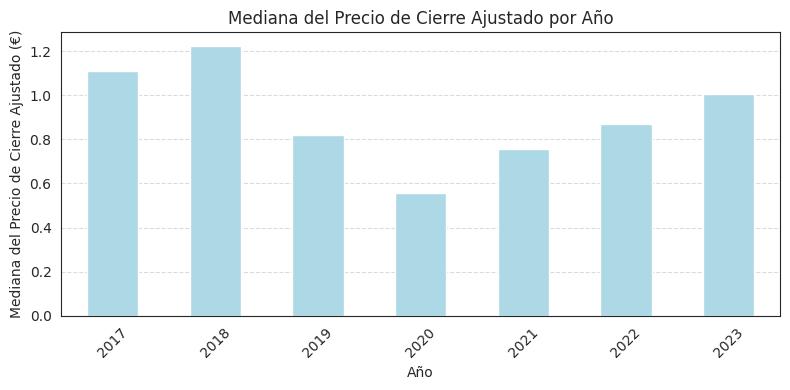

Mediana del precio de cierre ajustado por año:
Year
2017    1.111371
2018    1.223757
2019    0.821918
2020    0.558258
2021    0.755733
2022    0.870716
2023    1.007000
Name: Unicaja, dtype: float64


In [ ]:
# Calcular la mediana del precio de cierre ajustado para cada año
ticker_modelYear = ticker_model.copy()
ticker_modelYear['Year'] = ticker_modelYear.index.year

yearly_median = ticker_modelYear.groupby('Year')['Unicaja'].median()

# Graficar la mediana del precio de cierre ajustado por año
plt.figure(figsize=(8, 4))
yearly_median.plot(kind='bar', color='lightblue')
plt.title('Mediana del Precio de Cierre Ajustado por Año')
plt.xlabel('Año')
plt.ylabel('Mediana del Precio de Cierre Ajustado (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la mediana del precio de cierre ajustado por año
print("Mediana del precio de cierre ajustado por año:")
print(yearly_median)


<Figure size 800x400 with 0 Axes>

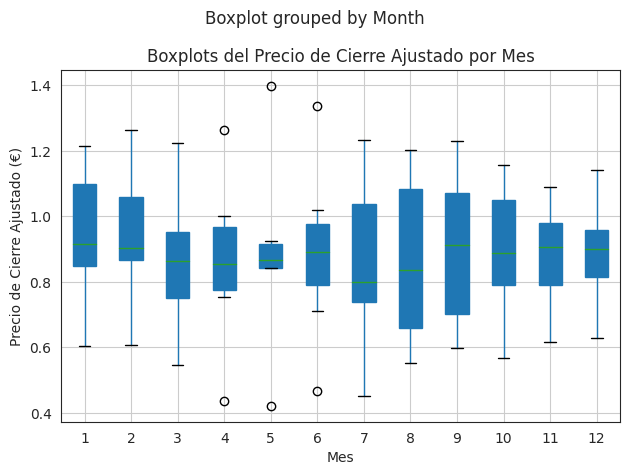

Mediana del precio de cierre ajustado por mes:
Month
1     0.915852
2     0.904040
3     0.865536
4     0.854148
5     0.866535
6     0.891136
7     0.799854
8     0.837511
9     0.912825
10    0.889945
11    0.907343
12    0.899955
Name: Unicaja, dtype: float64


In [ ]:
# Calcular la mediana del precio de cierre ajustado para cada mes
# Crear un DataFrame de datos mensuales
monthly_data = ticker_model.resample('M').median()

# Convertir la Serie a DataFrame
monthly_data_df = pd.DataFrame(monthly_data, columns=['Unicaja'])

# Crear una nueva columna para el mes
monthly_data_df['Month'] = monthly_data_df.index.month

# Crear boxplots para cada mes
plt.figure(figsize=(8, 4))
monthly_data_df.boxplot(column='Unicaja', by='Month', vert=True, patch_artist=True)
plt.title('Boxplots del Precio de Cierre Ajustado por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio de Cierre Ajustado (€)')
plt.tight_layout()
plt.show()

# Mostrar la mediana del precio de cierre ajustado por mes
monthly_median = monthly_data_df.groupby('Month')['Unicaja'].median()
print("Mediana del precio de cierre ajustado por mes:")
print(monthly_median)

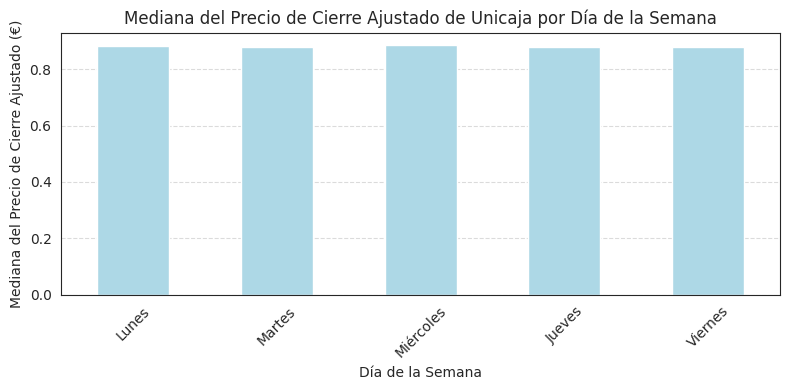

Valores medios del precio de cierre ajustado de Unicaja por día de la semana:
Lunes: Mediana = 0.8815752267837524
Martes: Mediana = 0.8806624412536621
Miércoles: Mediana = 0.8856297433376312
Jueves: Mediana = 0.8799889087677002
Viernes: Mediana = 0.8804709911346436


In [ ]:
# Calcular la mediana del precio de cierre ajustado para cada día de la semana
ticker_modelday = ticker_model.copy()
ticker_modelday['Day_of_Week'] = ticker_model.index.dayofweek
weekly_median = ticker_modelday.groupby('Day_of_Week')['Unicaja'].median()

# Asignar nombres a los días de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']

# Graficar la mediana del precio de cierre ajustado por día de la semana
plt.figure(figsize=(8, 4))
weekly_median.plot(kind='bar', color='lightblue')
plt.title('Mediana del Precio de Cierre Ajustado de Unicaja por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Mediana del Precio de Cierre Ajustado (€)')
plt.xticks(range(5), dias_semana, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar los valores medios por día de la semana
print("Valores medios del precio de cierre ajustado de Unicaja por día de la semana:")
for dia, valor in zip(dias_semana, weekly_median):
    print(f"{dia}: Mediana = {valor}")

#### **Grafico cuantil cuantil (Q-Q plot)**

El gráfico Cuantil-Cuantil, conocido como Q-Q Plot, representa dos conjuntos de cuantiles uno contra otro.

Un cuantil representa una fracción donde ciertos valores caen por debajo de ese punto. Por ejemplo, la mediana es un cuantil donde el 50% de los datos caen por debajo de ese valor y el 50% restante se encuentra por encima de él.

El propósito principal de los Q-Q plots es determinar si dos conjuntos de datos provienen de la misma distribución. En el gráfico Q-Q, se traza una línea diagonal a 45 grados; si los dos conjuntos de datos se distribuyen de manera similar, los puntos se distribuirán cerca de esta línea de referencia.

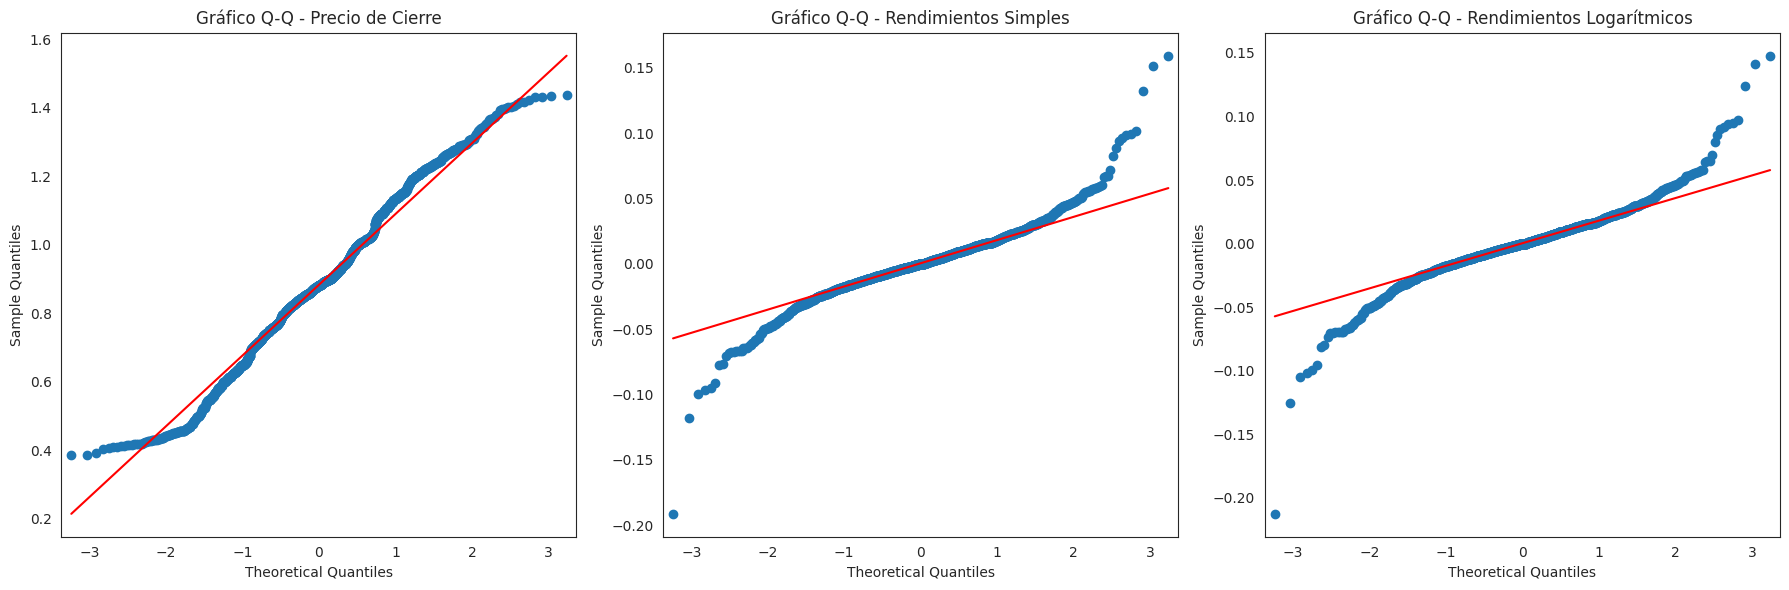

In [ ]:
# Crear una figura y ejes para las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar para el precio de cierre
qq_plot_cierre = sm.qqplot(ticker["Cierre"], line='q', ax=axes[0])
axes[0].set_title('Gráfico Q-Q - Precio de Cierre')

# Graficar para los rendimientos simples
qq_plot_simple = sm.qqplot(ticker["Rend_simple"], line='q', ax=axes[1])
axes[1].set_title('Gráfico Q-Q - Rendimientos Simples')

# Graficar para los rendimientos logarítmicos
qq_plot_log = sm.qqplot(ticker["Rend_log"], line='q', ax=axes[2])
axes[2].set_title('Gráfico Q-Q - Rendimientos Logarítmicos')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Los gráficos Q-Q (cuantil-cuantil) comparan cuantiles de dos distribuciones para evaluar si provienen de la misma población. Se traza una línea diagonal de referencia, si los puntos se alinean cerca de esta línea, indica que los datos se ajustan a una distribución normal. En estas visualizaciones podemos analizar cómo se distribuyen los precios de cierre, los rendimientos simples y los rendimientos logarítmicos del activo financiero.

En general, los gráficos Q-Q muestran que la línea de los datos no sigue la diagonal de referencia, y en los extremos se aleja considerablemente de sus valores esperados. Dado que las distribuciones de los rendimientos simples y logarítmicos no ofrecen resultados prometedores, se procede a visualizar nuevamente los gráficos, pero esta vez con el conjunto de datos modificado, el cual excluye los outliers para el precio de cierre, los rendimientos simples y los rendimientos logarítmicos del activo financiero.

##### **Q-Q plot sin outliers**

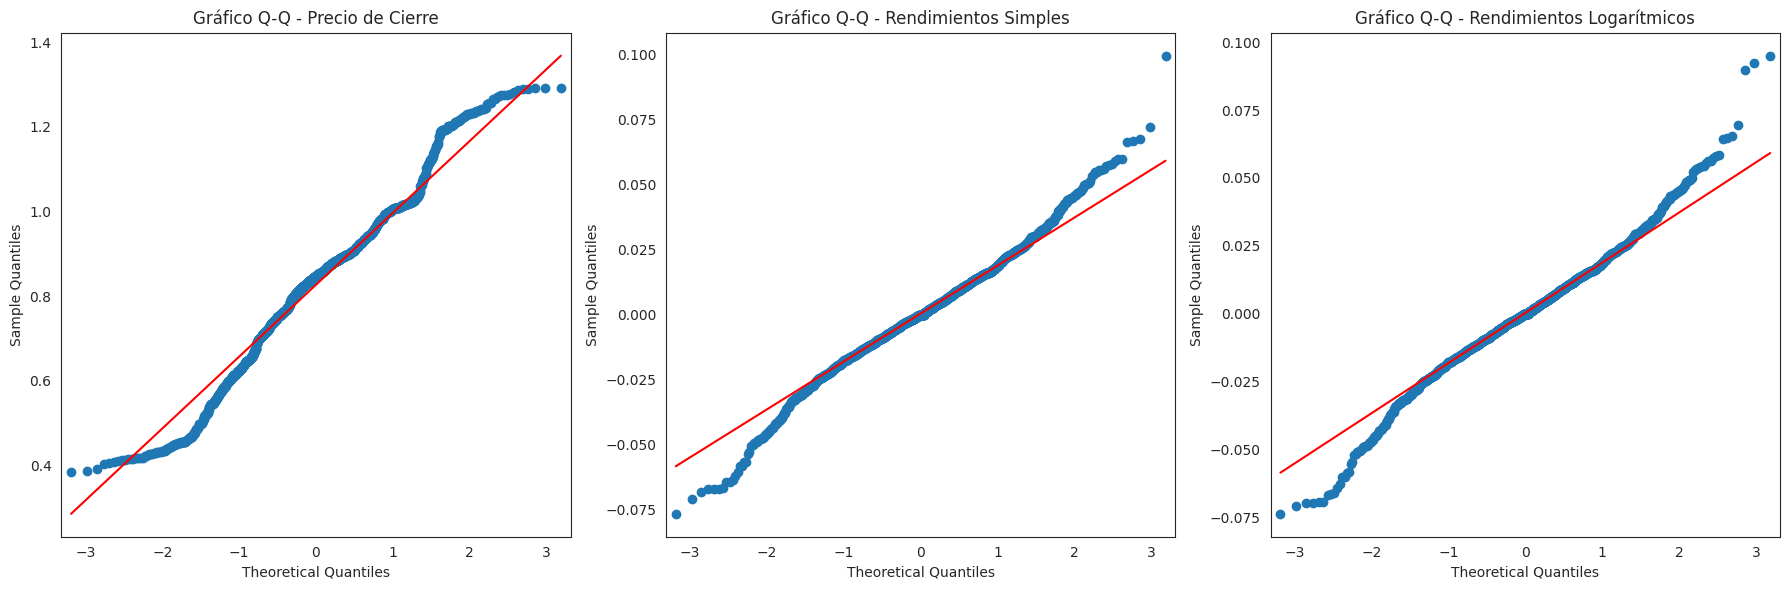

In [ ]:
# Crear una figura y ejes para las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar para el precio de cierre
qq_plot_cierre = sm.qqplot(ticker_cierre_sin_outliers["Cierre"], line='q', ax=axes[0])
axes[0].set_title('Gráfico Q-Q - Precio de Cierre')

# Graficar para los rendimientos simples
qq_plot_simple = sm.qqplot(ticker_Rend_simple_sin_outliers["Rend_simple"], line='q', ax=axes[1])
axes[1].set_title('Gráfico Q-Q - Rendimientos Simples')

# Graficar para los rendimientos logarítmicos
qq_plot_log = sm.qqplot(ticker_Rend_log_sin_outliers["Rend_log"], line='q', ax=axes[2])
axes[2].set_title('Gráfico Q-Q - Rendimientos Logarítmicos')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Al eliminar los outliers, se ha logrado mejorar significativamente los resultados tanto de los rendimientos simples como logarítmicos, los cuales muestran un rendimiento muy similar.

##### **Test D'Agostino**

Después de analizar los gráficos anteriores, procederemos a realizar el test de bondad de ajuste de K-cuadrado de D'Agostino.
El test de bondad de ajuste de K-cuadrado de D'Agostino se emplea para evaluar si una muestra proviene de una distribución normal. En este test, la hipótesis nula plantea que la variable sigue una distribución normal.
El valor p resultante del test nos ofrece una medida de la probabilidad de observar los datos si la hipótesis nula (los datos siguen una distribución normal) fuera verdadera. En general, si el valor p es menor que 0.05, rechazamos la hipótesis nula y concluimos que los datos no siguen una distribución normal. De lo contrario, no se puede rechazar la hipótesis nula y se concluye que los datos siguen una distribución normal.

El valor del estadístico  proporciona información sobre la discrepancia entre la distribución observada de los datos y la distribución esperada. Cuanto mayor sea el valor del estadístico, mayor será la discrepancia.

El siguiente código aplica el test de bondad de ajuste de K-cuadrado de D'Agostino a los datos y muestra los resultados:

In [ ]:
import statsmodels.api as sm
from scipy import stats

for column in ticker.columns:
    k2, p_value = stats.normaltest(ticker[column])
    significance_level = 0.05
    if p_value < significance_level:
        interpretation = "Rechazar H0: No sigue una distribución normal"
    else:
        interpretation = "No se puede rechazar H0: Sigue una distribución normal"

    print(f"{column.ljust(35)} Estadístico = {k2:.4f}, p-value = {p_value:.4f}, Interpretación: {interpretation}")


Cierre                              Estadístico = 21.8818, p-value = 0.0000, Interpretación: Rechazar H0: No sigue una distribución normal
Rend_simple                         Estadístico = 253.2508, p-value = 0.0000, Interpretación: Rechazar H0: No sigue una distribución normal
Rend_log                            Estadístico = 292.9104, p-value = 0.0000, Interpretación: Rechazar H0: No sigue una distribución normal


Normalmente, se rechaza la hipótesis nula cuando el valor p es menor que 0.05. Observamos que en todas las variables analizadas, el valor p es considerablemente menor que 0.05, lo que nos lleva a rechazar la hipótesis nula de normalidad. Después de analizar la normalidad de estas variables tanto gráficamente como mediante pruebas estadísticas, llegamos a la conclusión de que no siguen una distribución normal y, por lo tanto, no son adecuadas como variables predictoras.

---
# **Estacionariedad**
---

### **Descripción**

La estacionariedad, en el contexto del análisis de series temporales, constituye un pilar fundamental para comprender el comportamiento de los datos a lo largo del tiempo.

Un proceso estrictamente o fuertemente estacionario es donde, para cualquier periodo $t_1, t_2,...,t_T \in Z$ y cualquier $k \in Z$:


$$FY_{t_1},Y_{t_2},...,Y_{t_T}\left ( Y_1,...,Y_T \right)=FY_{t1+k},Y_{t2+k},...,Y_{tT+k}\left ( Y_1,...,Y_T \right )$$

Donde $F$ es la distribución conjunta de un conjunto de variables aleatorias.

También se puede afirmar que la medida de probabilidad para la secuencia $\left \{ Y_{t} \right \}$  es la misma para $ \left \{ Y_{t+k}   \right \} \forall k$.

La serie es estrictamente estacionaria si la distribución de sus valores permanece igual a medida que pasa el tiempo. Una serie se considera estrictamente estacionaria cuando la distribución de sus valores permanecen igual a medida que transcurre el tiempo.

### **Media constante**

La hipótesis de una media constante, expresada como $E\left ( Y_t \right )= \mu$ o $E\left ( Y_t \right )= 0$, implica que el valor promedio de los errores se mantiene en cero. Esta premisa asegura que al incluir un término constante en la ecuación de regresión, este supuesto nunca se viola.

### **Covarianza constante**

La covarianza constante indica cómo $Y$ se relaciona con sus valores anteriores.

En una serie estacionaria, esta relación solo depende de la diferencia entre los momentos temporales $(t)$ y $(t-1)$, y no del tiempo en sí mismo.

La covarianza entre $Y_t$ y $Y_{t-1}$ es igual a la covarianza entre $Y_{t-10}$ y $Y_{t-20}$, y así sucesivamente.

Otra interpretación de este supuesto es que los errores no están correlacionados entre sí.

### **¿Por qué es importante la estacionariedad?**

La estacionariedad de una serie temporal es crucial debido a su impacto significativo en el comportamiento y las propiedades de los datos. Utilizar datos no estacionarios puede llevar a conclusiones erróneas en análisis y modelos, lo que puede resultar en regresiones espurias.

En el contexto de construir un modelo ARIMA (Modelo Autorregresivo Integrado de Medias Móviles), es fundamental transformar la serie temporal en una forma estacionaria. El término 'Autorregresivo' en ARIMA implica que se trata de un modelo de regresión lineal que utiliza sus propios rezagos como predictores. Los modelos de regresión lineal funcionan mejor cuando los predictores son independientes y no están correlacionados.

Para lograr la estacionaridad, el primer paso es diferenciar la serie temporal, es decir, restar el valor actual del valor anterior. Dependiendo de la complejidad de la serie, puede ser necesario aplicar más de una diferenciación. El valor de 'd' indica el número mínimo de diferenciaciones requeridas para lograr la estacionaridad, siendo d=0 si la serie ya es estacionaria. El propósito de la diferenciación es hacer estacionaria la serie temporal. Sin embargo, es importante tener cuidado de no diferenciar en exceso la serie, ya que se puede tener una sobrediferenciación que afectará los parámetros del modelo.

Los términos 'p' y 'q' en ARIMA representan el orden del término "Autorregresivo" (AR) y el término "Media Móvil" (MA), respectivamente. 'p' indica el número de rezagos de la serie temporal que se utilizarán como predictores, mientras que 'q' indica el número de errores de pronóstico rezagados que se incluirán en el modelo ARIMA.




### **Descomposición Aditiva**
En la descomposición aditiva de una serie temporal, los componentes individuales, como la tendencia, la estacionalidad y los residuos, se suman entre sí para reconstruir la serie temporal original. Este enfoque se utiliza cuando la magnitud de la variación estacional no depende del nivel de la serie temporal.

La fórmula general para la descomposición aditiva de una serie temporal se expresa como: Serie Temporal = Tendencia + Estacionalidad + Residuos


Donde la tendencia representa la dirección general de los datos a lo largo del tiempo, la estacionalidad captura los patrones recurrentes o cíclicos en la serie que se repiten en intervalos regulares, y los residuos son las fluctuaciones aleatorias que no se pueden explicar por la tendencia o la estacionalidad.

A continuación, realizamos la descomposición de la serie temporal utilizando seasonal_decompose, una función que separa la serie en sus componentes principales: tendencia, estacionalidad y residuos.

- La tendencia refleja la dirección general de la serie a largo plazo, indicando si la serie aumenta, disminuye o se mantiene constante.
- La estacionalidad revela patrones repetitivos en los datos a intervalos regulares.
- Los residuos representan la variación no explicada por la tendencia o la estacionalidad y a menudo se consideran el componente aleatorio o el ruido en los datos.

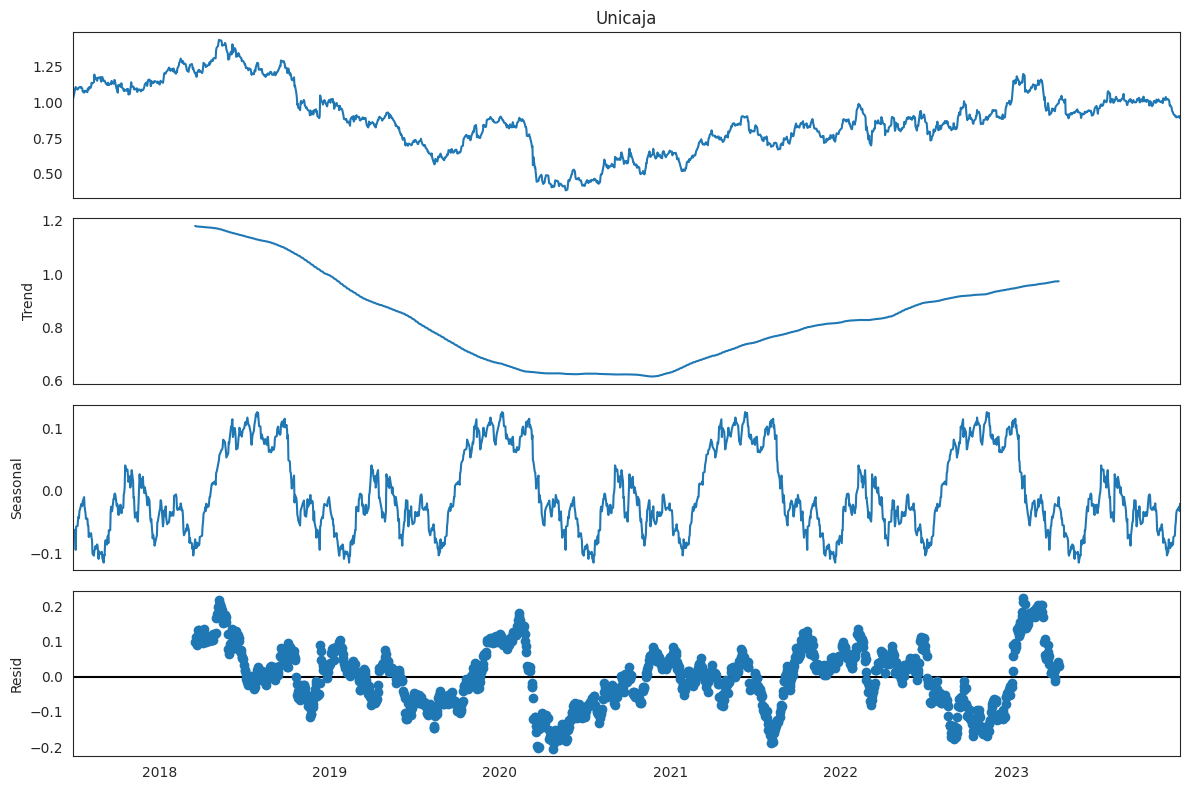

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
# Descomposición aditiva de la serie temporal
result = seasonal_decompose(ticker_seasonal['Unicaja'], model='additive', period=366)
# Graficar la descomposición
result.plot()
plt.show()

En el análisis resultante, la componente de tendencia exhibe un comportamiento consistente con la serie original, reflejando la dirección general de los datos a lo largo del tiempo y sugiere una relación estrecha entre ambos. La componente estacional, que representa las fluctuaciones regulares y repetitivas en la serie, evidencia una estacionalidad notable en la serie temporal con patrones claramente definidos. En cuanto a los residuos, se observa una fluctuación y se identifican algunos picos marcados en los residuos, lo que sugiere la presencia de variaciones aleatorias o irregularidades no explicadas en la serie temporal que podrían requerir una exploración adicional para su comprensión.




### **Descomposición Multiplicativa**


En la descomposición multiplicativa de una serie temporal, los componentes se multiplican entre sí para formar la serie original. Este enfoque se prefiere cuando la magnitud de la variación estacional está directamente relacionada con el nivel de la serie temporal.

La fórmula general para la descomposición multiplicativa es: Serie Temporal = Tendencia * Estacionalidad * Residuos

La diferencia clave entre la descomposición aditiva y la descomposición multiplicativa radica en cómo se combinan los componentes para formar la serie temporal original. La descomposición aditiva es más adecuada cuando los cambios absolutos en la estacionalidad son constantes a lo largo del tiempo, mientras que la descomposición multiplicativa es más apropiada cuando los cambios porcentuales en la estacionalidad son constantes a lo largo del tiempo.

A continuación se lleva a cabo una descomposición multiplicativa de la serie temporal original del activo financiero.

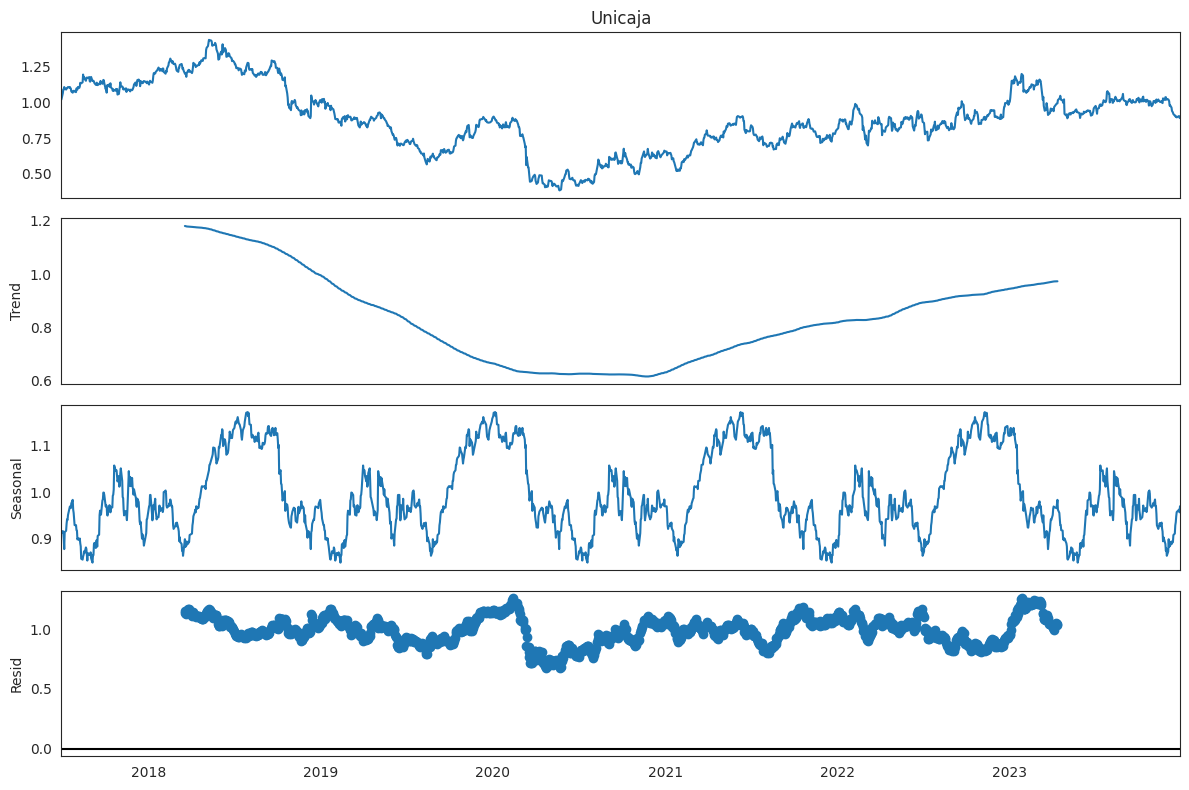

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
# Descomposición multiplicative de la serie temporal
result = seasonal_decompose(ticker_seasonal['Unicaja'], model='multiplicative', period=366)
# Graficar la descomposición
result.plot()
plt.show()

La descomposición de una serie temporal busca identificar patrones recurrentes en los datos.

Cuando los residuos de un modelo mantienen un valor constante alrededor de 1 y muestran una distribución uniforme en la gráfica de la estacionalidad, esto puede indicar:

- Residuos constantes: Una línea recta en la gráfica de residuos sugiere que estos mantienen un valor constante, señalando que el modelo no ha capturado completamente la variabilidad en los datos.

- Homocedasticidad: Si los residuos están uniformemente dispersos alrededor de 1 a lo largo del tiempo, esto puede indicar que la variabilidad de los errores es constante a lo largo de la serie temporal. Es deseable en muchos modelos de series temporales, ya que indica que la varianza de los errores no cambia con el tiempo.

En el análisis resultante, la tendencia sigue la dirección general de los datos, se observa una estacionalidad significativa con fluctuaciones, y los residuos oscilan alrededor de 1, revelando algunos picos pronunciados que indican la presencia de variaciones aleatorias.

## **Proceso autorregresivo (AR)**

Un modelo autorregresivo (AR) es aquel en el que el valor actual de una variable ($Y_t$) depende solo de los valores que la variable tomó en períodos anteriores más un término de error.

$$Y_t= \alpha + \psi_{1}Y_{t-1} + \psi_{2}Y_{t-2} +...+ \psi _{p}Y_{t-p} + u_t $$

Donde $p$ es el número de rezagos asociado a la AR(p):

$$Y_t=\alpha +\sum_{i=1}^{p}\psi _{i}Y_{t-i} + u_t$$

La identificación de cualquier término de Autoregresión (AR) necesario para el modelo se puede determinar al examinar el gráfico de Autocorrelación Parcial (PACF). La Autocorrelación Parcial puede conceptualizarse como la correlación entre la serie y su retraso, excluyendo las contribuciones de los retrasos intermedios. Por lo tanto, el PACF representa la correlación pura entre un retraso y la serie, lo que nos ayuda a determinar si ese retraso es necesario en el modelo AR. Cualquier autocorrelación presente en una serie estacionaria puede ser corregida mediante la inclusión de suficientes términos AR. Por lo tanto, inicialmente, el orden del término AR se establece como igual al número de retrasos que cruzan el límite de significancia en el gráfico de PACF.

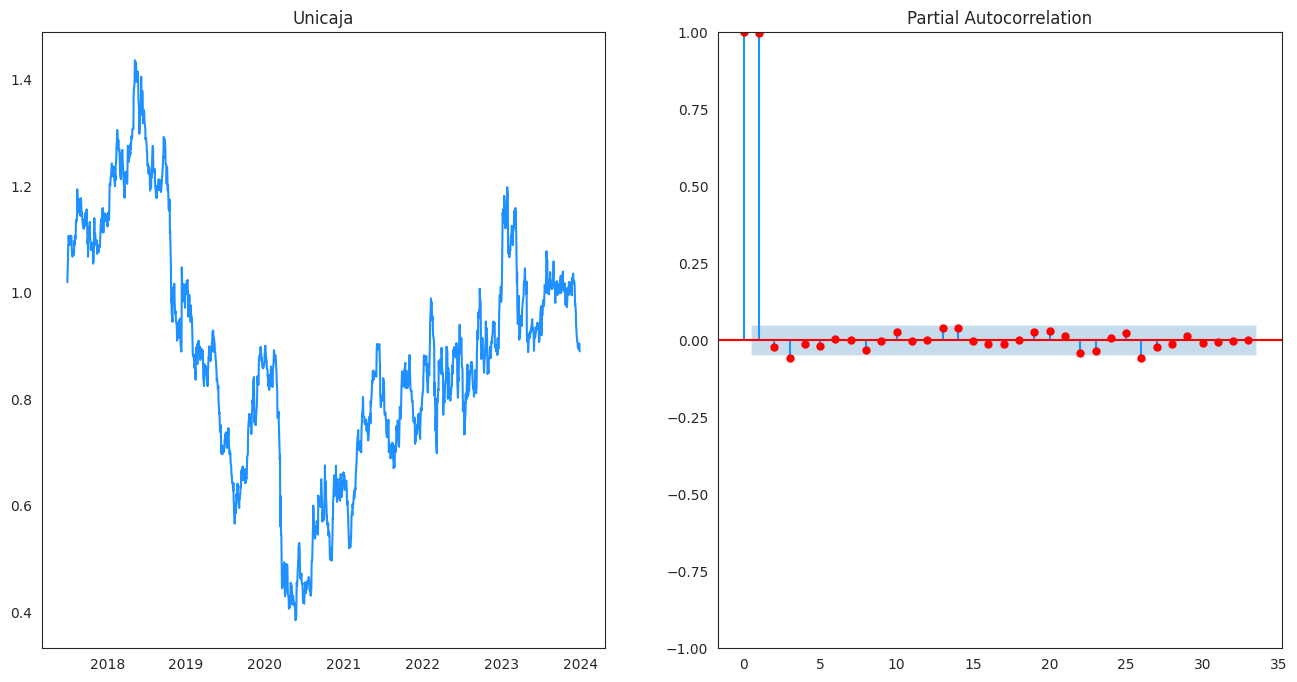

In [ ]:
# Definir el tamaño de la figura
plt.rcParams.update({'figure.figsize': (16, 8), 'figure.dpi': 100})
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, sharex=False)
# Graficar la serie temporal original
axes[0].plot(ticker_seasonal.Unicaja, color="dodgerblue")
axes[0].set_title("Unicaja")
# Graficar el PACF
plot_pacf(ticker_seasonal.Unicaja.dropna(), ax=axes[1], color="red")
# Mostrar la figura
plt.show()

En la gráfica PACF, observamos que el primer rezago (PACF 1) es notablemente significativo, ya que se encuentra considerablemente por encima del intervalo de confianza. Del mismo modo, el segundo rezago también resulta muy significativo. A medida que avanzamos en los rezagos, estos se mantienen dentro del intervalo de confianza, sin embargo, varios de ellos cruzan ligeramente el límite de significancia.

## **Proceso de Media Móvil (MA)**

Sea $u_t (t=1,2,3,...)$ un ruido blanco con $E(u_t)=0$ y $var(u_t)=\sigma ^{2}$. Entonces:

$$Y_t= \alpha + u_t + \theta _{1}u_{t-1} + \theta _{2}u_{t-2} +...+ \theta _{q}u_{t-q}$$

Donde $q$ es el número de rezagos asociado a la MA(q):

$$Y_t=\alpha +\sum_{i=1}^{q}\theta _{i}u_{t-i} + u_t$$


Un modelo MA es simplemente una combinación lineal de procesos de ruido blanco, donde $Y_t$ depende de los valores actuales y anteriores de una perturbación de ruido blanco.

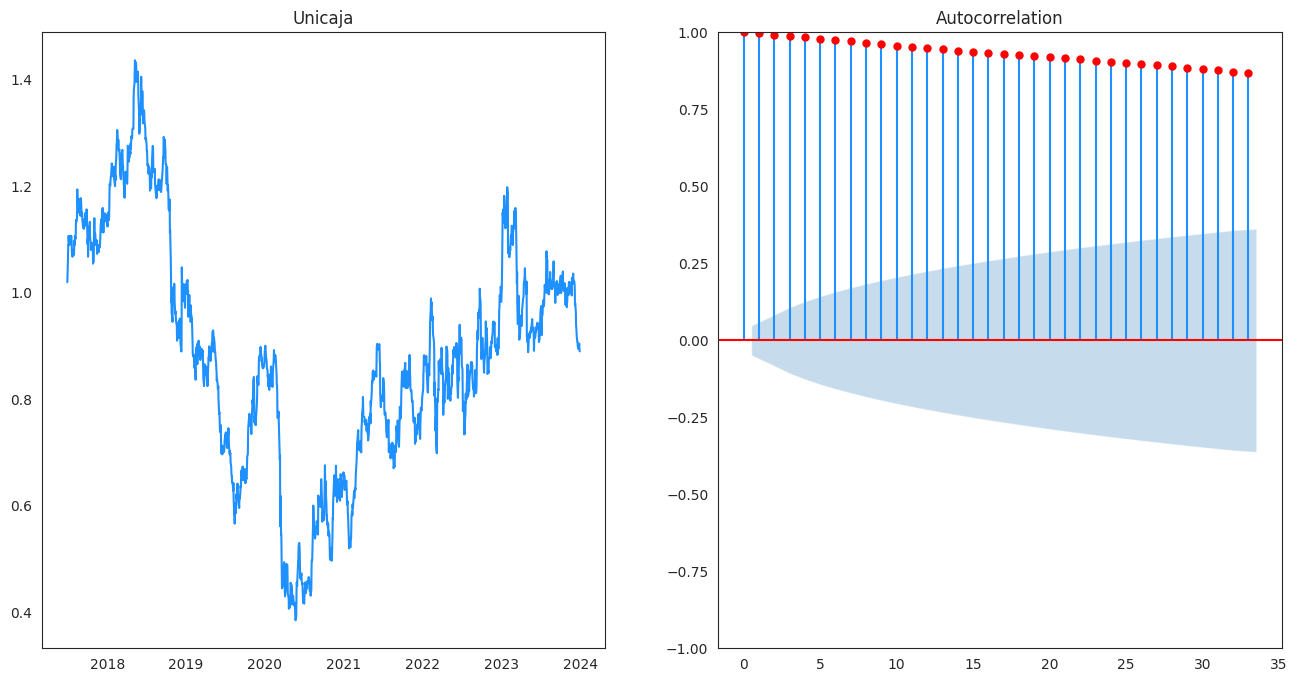

In [ ]:
# Definir el tamaño de la figura
plt.rcParams.update({'figure.figsize': (16, 8), 'figure.dpi': 100})
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, sharex=False)
# Graficar la serie temporal original
axes[0].plot(ticker_seasonal.Unicaja, color="dodgerblue")
axes[0].set_title("Unicaja")
# Graficar el ACF
plot_acf(ticker_seasonal.Unicaja.dropna(), ax=axes[1], color="red")
# Mostrar la figura
plt.show()

Al examinar la gráfica de la Función de Autocorrelación (ACF), se observa que los rezagos muestran un valor inicial de 1, seguido de un descenso gradual en su magnitud. Estos rezagos están considerablemente por encima del intervalo de confianza, lo que sugiere una correlación significativa en esos puntos temporales. Esta observación indica la presencia de patrones de autocorrelación en los datos, lo cual es fundamental para comprender la estructura temporal de la serie y para seleccionar el orden adecuado de los términos autorregresivos en un modelo ARIMA.

## **Modelos ARIMA - Metodología Box y Jenkins**

La metodología Box-Jenkins es una herramienta fundamental en el análisis de series temporales, especialmente a través de la aplicación de los Modelos Autorregresivos Integrados de Media Móvil (ARIMA). Estos modelos, concebidos por George Box y Gwilym Jenkins en su obra "Time Series Analysis: Forecasting and Control" (1976), ofrecen un enfoque sistemático y práctico para modelar y predecir datos secuenciales.

### **Modelo ARIMA**

El modelo ARIMA (Autoregressive Integrated Moving Average) es una técnica poderosa para el análisis y la predicción de series temporales. Combina componentes de autorregresión (AR), integración (I) y media móvil (MA) para capturar y modelar la estructura de dependencia en los datos a lo largo del tiempo.

Los modelos ARIMA se utilizan para modelar series temporales no estacionales y estacionarias, lo que implica la identificación de parámetros clave como el orden de la autorregresión (p), el grado de diferenciación (d) y el orden de la media móvil (q). Al incorporar estos componentes, el modelo ARIMA puede capturar tendencias, ciclos y patrones de autocorrelación en los datos, lo que lo convierte en una herramienta versátil para una variedad de aplicaciones en pronóstico y análisis de series temporales.

### **Modelo Seasonal ARIMA**

El modelo Seasonal ARIMA es una extensión del ARIMA básico que permite modelar explícitamente componentes estacionales en las series temporales. A través de parámetros adicionales para representar la autorregresión estacional (P), la diferencia estacional (D) y la media móvil estacional (Q), junto con el número de pasos de tiempo en un solo período estacional (m), el modelo Seasonal ARIMA puede capturar y modelar patrones estacionales en los datos.

La introducción de estos parámetros adicionales permite al modelo Seasonal ARIMA capturar y modelar efectivamente patrones estacionales en los datos, lo que lo hace especialmente útil para pronosticar series temporales con ciclos y comportamientos estacionales.

In [ ]:
ticker_model.Unicaja

Date
2017-06-30    1.019846
2017-07-03    1.063429
2017-07-04    1.089579
2017-07-05    1.089579
2017-07-06    1.107012
                ...   
2023-12-21    0.900000
2023-12-22    0.895000
2023-12-27    0.904500
2023-12-28    0.891500
2023-12-29    0.890000
Name: Unicaja, Length: 1664, dtype: float64

Una vez que se han determinado los valores de p, d y q, se procede al ajuste del modelo ARIMA y se imprime el resumen del modelo.

In [ ]:
# Ajuste del modelo.
modelo = ARIMA(ticker_model.Unicaja, order=(2, 0, 1))
modelo_ajustado = modelo.fit()
# Se imprime el modelo ajustado.
print(modelo_ajustado.summary())

                               SARIMAX Results                                
Dep. Variable:                Unicaja   No. Observations:                 1664
Model:                 ARIMA(2, 0, 1)   Log Likelihood                4247.539
Date:                Sun, 07 Apr 2024   AIC                          -8485.079
Time:                        09:05:15   BIC                          -8457.994
Sample:                             0   HQIC                         -8475.041
                               - 1664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9020      0.111      8.144      0.000       0.685       1.119
ar.L1          0.0883      0.547      0.162      0.872      -0.984       1.160
ar.L2          0.9039      0.544      1.660      0.0

El resumen del modelo permite una revisión detallada de los coeficientes, los errores estándar y los valores de p junto con su significancia. Esta información proporciona una comprensión exhaustiva sobre el ajuste del modelo, permitiendo evaluar su validez y eficacia.



Es importante considerar lo siguiente al analizar los valores ajustados del modelo ARIMA:

- Interpretación de la serie ajustada: Los valores reflejan la serie modelada por el ARIMA con datos históricos, pero pueden parecer demasiado similares a los datos reales debido al proceso de ajuste del modelo.

- Posible sobreajuste: Riesgo de que el modelo se adapte demasiado a los datos históricos y no pueda generalizar bien a nuevos datos.

- Validación cruzada fuera de tiempo: Se necesita evaluar la capacidad predictiva en datos futuros.

- Interpretación cautelosa: Los valores ajustados no son predicciones reales del futuro, por lo que se requiere una evaluación cuidadosa junto con una validación rigurosa y un análisis crítico de los resultados.

Aunque los valores ajustados proporcionan información sobre la capacidad del modelo para capturar la estructura de la serie temporal, se debe complementar con una evaluación completa que incluya validación cruzada y un análisis crítico de la capacidad predictiva del modelo en nuevos datos.

## **Ruido Blanco**

El ruido blanco se refiere a una serie de datos que exhibe comportamiento aleatorio o estocástico, donde cada observación es independiente y tiene una distribución normal con media cero y varianza constante. En el análisis de series temporales, corregir la serie mediante las primeras diferencias implica restar cada valor de la serie temporal del valor anterior.

Se corrige la serie aplicando primeras diferencias.

$$Y_t - Y_{t-1} =\alpha +\beta Y_{t-1} - Y_{t-1}+ u_t$$
$$\Delta Y_t =\alpha + \beta Y_{t-1} - Y_{t-1}+ u_t$$
$$\Delta Y_t =\alpha + Y_{t-1} \left (\beta - 1   \right )+ u_t$$

Recuerde que $\beta=1$

$$\Delta Y_t =\alpha + Y_{t-1} \left (1 - 1   \right )+ u_t$$
$$\Delta Y_t =\alpha + Y_{t-1} \left (0  \right )+ u_t$$
$$\therefore $$

$$\Delta Y_t =\alpha + u_t$$


La serie es estacionaria en sus primeras diferencias, es decir, la serie es un ruido blanco.

Para garantizar que las series no tengan raíces unitarias y validar su estacionariedad, se necesitan aplicar pruebas de raíces unitarias.

¿Qué pasaría si $\beta > 1$?

Se tendría un proceso explosivo.

A continuacíón realizamos la prueba de Ruido Blanco.

Si el valor p obtenido en la prueba de Ljung-Box es superior a 0.05, indica que nuestro modelo se ajusta adecuadamente y que existe ruido blanco en los residuos. Sin embargo, si el valor p es menor que 0.05, sugiere que nuestro modelo no se ajusta correctamente y, por lo tanto, no se puede afirmar que exista ruido blanco en los residuos.


In [ ]:
# Test de Ljung-Box
sm.stats.acorr_ljungbox(modelo_ajustado.resid, lags=[10], return_df= True)
# 10 es el número de rezagos al calcular el estadístico, return_df devolverá un DataFrame que contiene los resultados del test

lb_stat  lb_pvalue
10  9.686832   0.468385

El valor obtenido en el test de Ljung-Box es menor que 0.05. Esto indica que el modelo no se ajusta correctamente a los datos. Por lo tanto, se debe ajustar nuevamente el modelo o explorar otras técnicas de modelado.

## **Dickey Fuller**

La prueba de Dickey-Fuller aumentada (ADF) es una herramienta estadística vital en el análisis de series temporales que se emplea para detectar la presencia de una raíz unitaria en los datos, fue realizado por Dickey y Fuller en el año 1979. Este fenómeno puede causar resultados impredecibles y sesgados en el análisis de dichas series. La prueba establece una hipótesis nula para evaluar la influencia de una tendencia en los datos de la serie temporal. Al aceptar la hipótesis nula, se concluye que los datos no son estacionarios y al rechazarla, se considera que los datos son estacionarios. Los valores negativos de la de la prueba ADF refuerzan el rechazo de la hipótesis nula. El propósito fundamental de aplicar la prueba ADF es determinar si la serie temporal es estacionaria. En el caso de que la serie no sea estacionaria, se requiere llevar a cabo una diferenciación.



El objetivo de la prueba es examinar la hipótesis nula de $\beta=1$
$$Y_t= \beta Y_{t-1}+u_t$$

*   $H_0$:La serie tiene raíz unitaria.
*   $H_a$:La serie es estacionaria.

A continuación, se lleva a cabo la prueba de Dickey-Fuller para evaluar si la serie es estacionaria.
Si el valor p obtenido en la prueba es menor que el nivel de significancia establecido (0.05), se rechaza la hipótesis nula, lo que indica que la serie temporal es estacionaria. En caso de que el valor p sea mayor que 0.05, procederemos a diferenciar la serie.

In [ ]:
# Función Dickey_Fuller
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba para: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic','p-value','No Lags Used','Nº de muestras'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Los datos son estacionarios. Se rechaza la hipótesis nula.")
    else:
        print("Los datos no son estacionarios. No se puede rechazar la hipótesis nula.")

In [ ]:
Prueba_Dickey_Fuller(ticker_model["Unicaja"],"Unicaja")

Resultados de la prueba para: Unicaja
ADF Test Statistic        -1.941697
p-value                    0.312707
No Lags Used               2.000000
Nº de muestras          1661.000000
Critical Value (1%)       -3.434293
Critical Value (5%)       -2.863282
Critical Value (10%)      -2.567697
dtype: float64
Los datos no son estacionarios. No se puede rechazar la hipótesis nula.


Finalmente, llevamos a cabo una visualización gráfica que muestra la serie temporal junto con sus valores de autocorrelación.

In [ ]:
# Definición de la función tsplot para visualizar y analizar gráficamente una serie temporal, incluyendo la serie original,
# la función de autocorrelación y la función de autocorrelación parcial, con la capacidad de especificar el número de rezagos
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):  # Convertir la serie temporal en un objeto de pandas Series si no lo es
        y = pd.Series(y)

    with plt.style.context(style):     # Configuración del estilo del gráfico
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax) # Graficar la serie temporal
        p_value = sm.tsa.stattools.adfuller(y)[1] # Calcular el valor p del test de Dickey-Fuller
        ts_ax.set_title('Gráfico de análisis de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax ) # Graficar la función de autocorrelación
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax) # Graficar la función de autocorrelación parcial
        plt.tight_layout() # Ajustar el diseño de los subgráficos

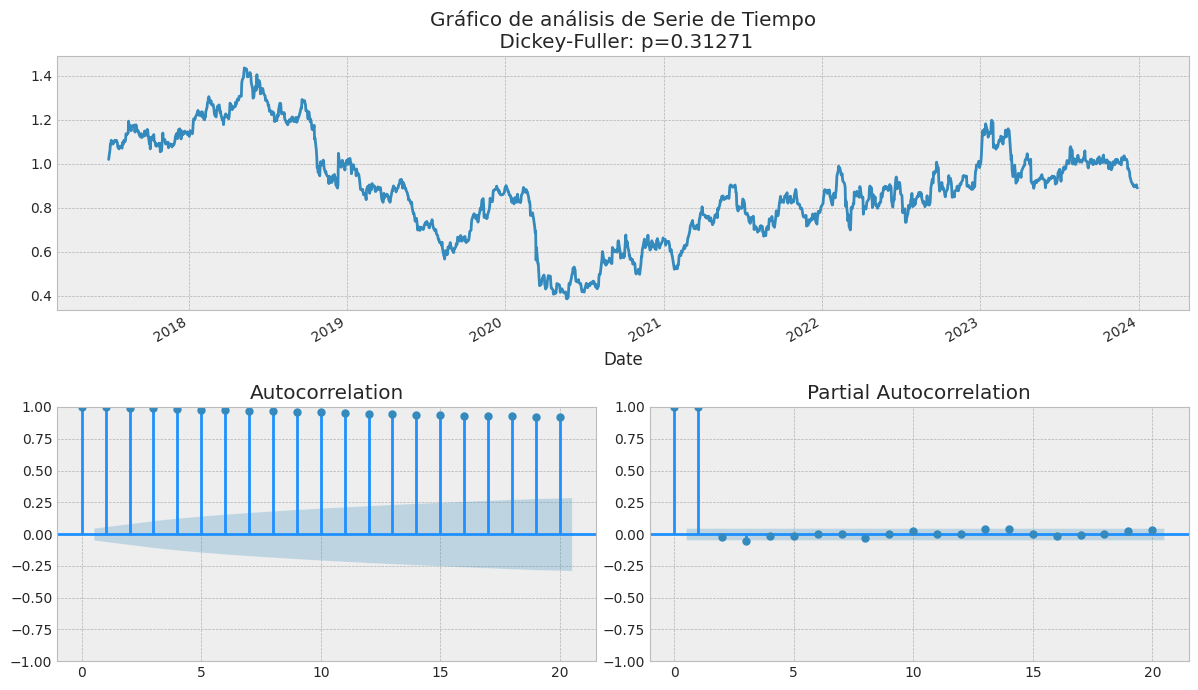

In [ ]:
# Llamada a la función
tsplot(ticker_model["Unicaja"].dropna(), lags=20);

### **Diferenciación de la serie**

Para un análisis más detallado, llevaremos a cabo la diferenciación de primer y segundo nivel sobre la serie de datos original.

In [ ]:
ticker_model

Unicaja
Date                
2017-06-30  1.019846
2017-07-03  1.063429
2017-07-04  1.089579
2017-07-05  1.089579
2017-07-06  1.107012
...              ...
2023-12-21  0.900000
2023-12-22  0.895000
2023-12-27  0.904500
2023-12-28  0.891500
2023-12-29  0.890000

[1664 rows x 1 columns]

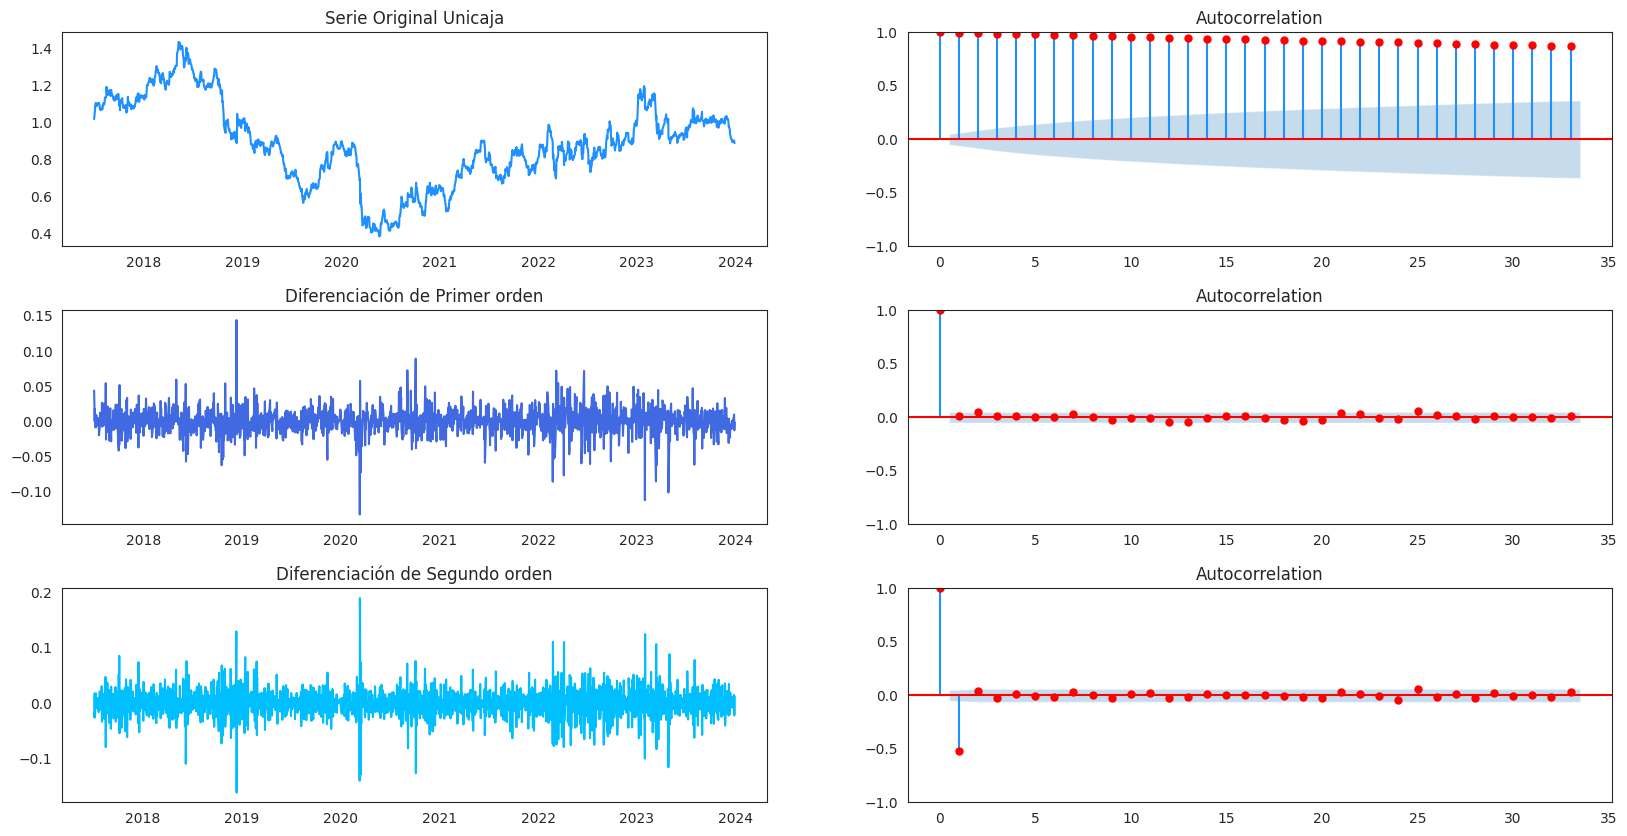

In [ ]:
plt.rcParams.update({'figure.figsize':(20,10)})

# Serie Original
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(ticker_model,color="dodgerblue"); axes[0, 0].set_title('Serie Original Unicaja')
plot_acf(ticker_model, ax=axes[0, 1], color="r")

# Primera diferenciación
axes[1, 0].plot(ticker_model.diff(), color="royalblue"); axes[1, 0].set_title("Diferenciación de Primer orden")
plot_acf(ticker_model.diff().dropna(), ax=axes[1, 1],color="r")

# Segunda diferenciación
axes[2, 0].plot(ticker_model.diff().diff(), color="deepskyblue"); axes[2, 0].set_title("Diferenciación de Segundo orden")
plot_acf(ticker_model.diff().diff().dropna(), ax=axes[2, 1],color="r")

plt.subplots_adjust(hspace=0.3)
plt.show();

Se ha llevado a cabo un análisis exhaustivo de las diversas gráficas asociadas con la serie temporal:

- Serie Original: Se presenta la serie original, donde se puede observar mediante una línea imaginaria la constancia de la media. Al observar el gráfico de autocorrelación, se evidencia la presencia de múltiples valores que se encuentran fuera del intervalo de confianza.

- Diferenciación de Primer Orden: Tras aplicar la diferenciación de primer orden, se observa una reducción significativa en la media y un comportamiento más estable en comparación con la serie original. En el gráfico de autocorrelación, la mayoría de los valores se encuentran dentro del intervalo de confianza, a excepción de un único valor positivo que se sitúa claramente fuera de este intervalo, junto con algunos valores que se encuentran prácticamente en la banda de confianza.

- Diferenciación de Segundo Orden: Al llevar a cabo la diferenciación de segundo orden, se aprecia nuevamente una tendencia hacia una media cero y una mejora en el comportamiento de la serie. Sin embargo, al examinar el gráfico de autocorrelación, se observa que los retrasos ingresan en la zona negativa con rapidez excesiva, lo que sugiere una posible sobre-diferenciación de la serie.



Procederemos a realizar las pruebas de Dickey-Fuller para cada una de las series y compararemos los resultados obtenidos.


In [ ]:
# Serie original
result = adfuller(ticker_model.dropna())
print('     Valores de la Serie Original.')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('__________________________________________')

# Primera diferenciación
result1 = adfuller(ticker_model.diff().dropna())
print('     Valores de la Primera diferenciación.')
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('__________________________________________')


# Segunda diferenciación
result2 = adfuller(ticker_model.diff().diff().dropna())
print('     Valores de la Segunda diferenciación.')
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('__________________________________________')

     Valores de la Serie Original.
ADF Statistic: -1.941697
p-value: 0.312707
__________________________________________
     Valores de la Primera diferenciación.
ADF Statistic: -27.332013
p-value: 0.000000
__________________________________________
     Valores de la Segunda diferenciación.
ADF Statistic: -14.634289
p-value: 0.000000
__________________________________________


Al obtener valores de p cercanos a cero en ambas series diferenciadas, se rechaza la hipótesis nula en ambos casos, lo que sugiere que ambas series son estacionarias. Sin embargo, es importante destacar que el valor más negativo del estadístico de prueba en la primera diferenciación indica una mayor estacionariedad en comparación con el valor del estadístico de prueba en la segunda diferenciación. En general, un valor más negativo del estadístico de prueba proporciona una mayor evidencia a favor de la estacionariedad de la serie. Por lo tanto, basándonos en estos resultados, la serie estacionaria de primer orden seria una elección más adecuada.

A continuación, procederemos con el estudio de la serie diferenciada generando su modelo final.

In [ ]:
# Comparamos los valores de los modelos normal y diferenciado
ticker_model1 = ticker_model.copy()
# Primera diferenciación
ticker_model1['Unicaja_diff'] = ticker_model['Unicaja'].diff()
ticker_model1.dropna(inplace=True)
ticker_model1.head()

Unicaja  Unicaja_diff
Date                              
2017-07-03  1.063429      0.043583
2017-07-04  1.089579      0.026150
2017-07-05  1.089579      0.000000
2017-07-06  1.107012      0.017433
2017-07-07  1.098296     -0.008717

Visualizamos la gráfica con los datos estacionarios.

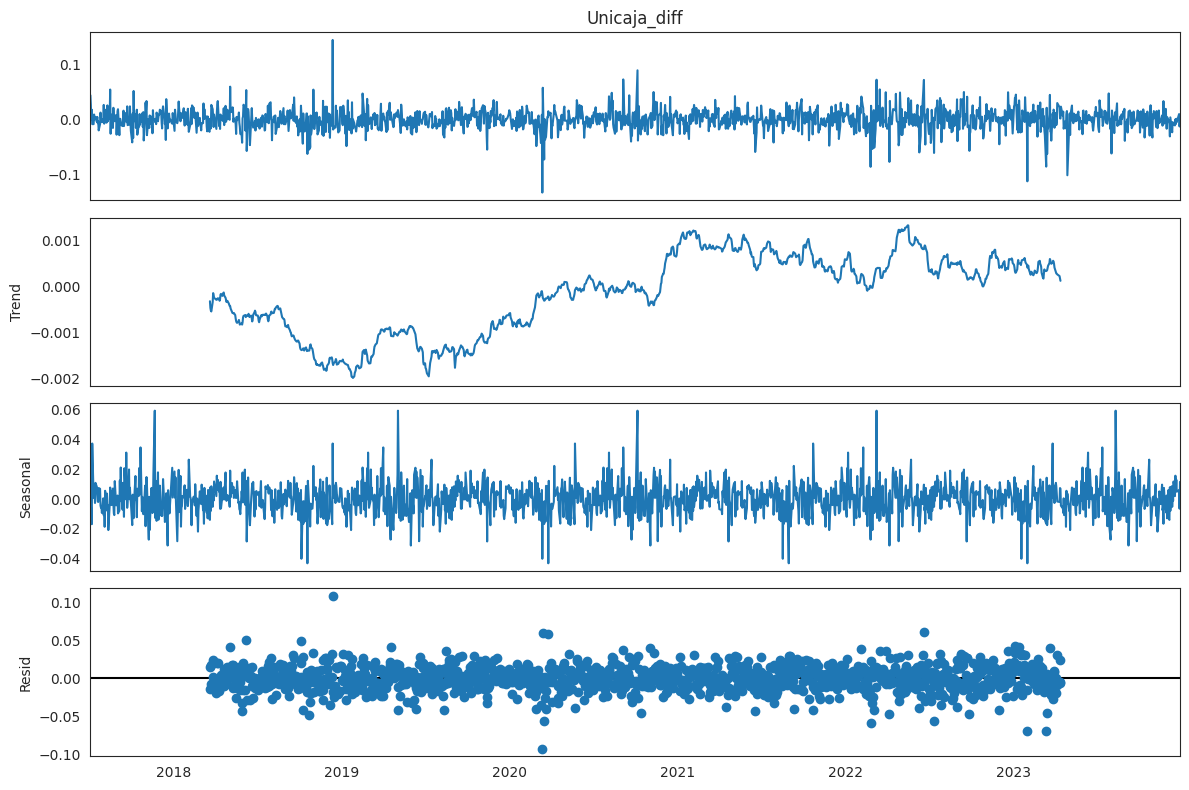

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(ticker_model1["Unicaja_diff"], model = "add", period=366)
a.plot();

Después de realizar el estudio estacional de la serie diferenciada, observamos una mejora significativa en varios aspectos. En primer lugar, no se identifican tendencias marcadas en la serie, lo que sugiere una mayor estabilidad a largo plazo. Además, la presencia de estacionalidad se ha reducido considerablemente, ya que apenas se pueden apreciar patrones marcados en los datos. Por último, los residuos se concentran en torno al valor cero, indicando que el modelo de descomposición ha capturado la mayoría de la variabilidad en los datos, aunque todavía se observan algunos valores atípicos dispersos. Estos hallazgos sugieren una mejora sustancial en la comprensión y modelado de la serie temporal diferenciada.

In [ ]:
# Generamos el modelo final primera diferenciación
ticker_model_diff = ticker_model1.copy()
ticker_model_diff = ticker_model_diff.loc[:,["Unicaja_diff"]]
ticker_model_diff

Unicaja_diff
Date                    
2017-07-03      0.043583
2017-07-04      0.026150
2017-07-05      0.000000
2017-07-06      0.017433
2017-07-07     -0.008717
...                  ...
2023-12-21      0.001000
2023-12-22     -0.005000
2023-12-27      0.009500
2023-12-28     -0.013000
2023-12-29     -0.001500

[1663 rows x 1 columns]

In [ ]:
ticker_model_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1663 entries, 2017-07-03 to 2023-12-29
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unicaja_diff  1663 non-null   float64
dtypes: float64(1)
memory usage: 26.0 KB


Se ha realizado una diferenciación de primer orden a la serie temporal para hacerla estacionaria. Por lo tanto, la serie diferenciada final tendrá un valor d=1.

## **Función de autocorrelación (MA)**

La función de Autocorrelación (MA) permite identificar si existe dependencia en el componente MA.

ACF muestra, a través de un correlograma, la correlación serial en q rezagos del componente de error.

ρs=γsγ0s=0,1,2,...

Donde γs es la covarianza de γ con sus valores pasados, en este caso, de los errores pasados.

El identificar los rezagos en donde se presenta correlación, permite identificar el orden del componente MA para definir el modelo.


A continuación comparamos la función de autocorrelación para los datos originales y la serie diferenciada.

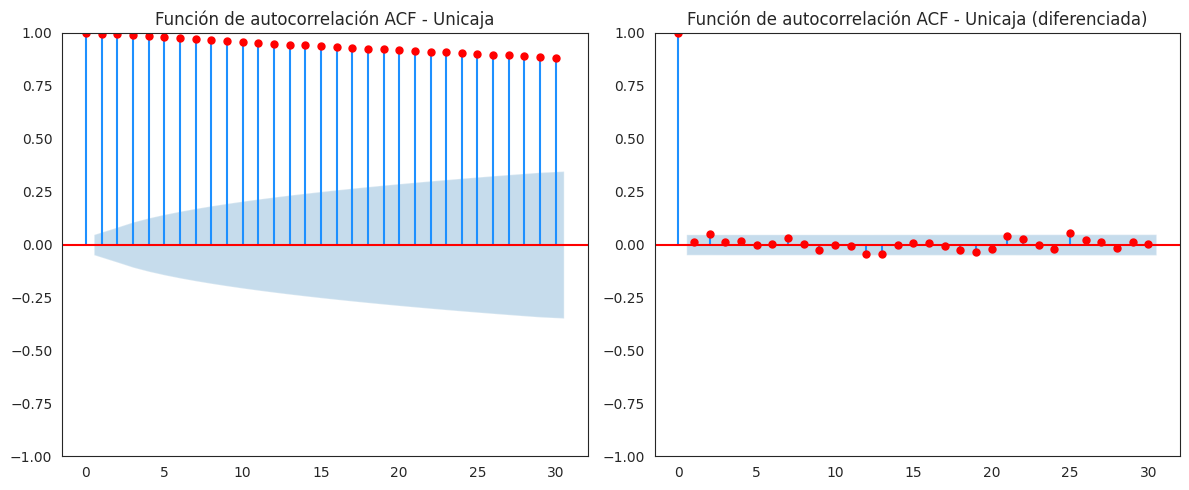

In [ ]:
# Crear subplots con 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Graficar la función de autocorrelación para la serie original
sm.graphics.tsa.plot_acf(ticker_model.Unicaja, lags=30, ax=ax[0],
                         title='Función de autocorrelación ACF - Unicaja', color = 'r')
# Graficar la función de autocorrelación para las diferencias de la serie
sm.graphics.tsa.plot_acf(ticker_model_diff.Unicaja_diff, lags=30, ax=ax[1],
                         title='Función de autocorrelación ACF - Unicaja (diferenciada)', color = 'r')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

## **Función de autocorrelación parcial PACF (AR)**



La función de Autocorrelación Parcial permite identificar si existe **dependencia en el componente AR.**

PACF muestra, a través de un correlograma, la correlación serial en $p$ rezagos del componente autorregresivo.

$$\rho _s=\frac{\gamma _s}{\gamma _0} \quad s= 0, 1, 2, ...$$

Donde $\gamma _s$ es la covarianza de $\gamma$ con sus valores pasados, en este caso, de los valores pasados de la variable.

El identificar los rezagos en donde se presenta correlación, permite identificar el orden del componente AR para definir el modelo.

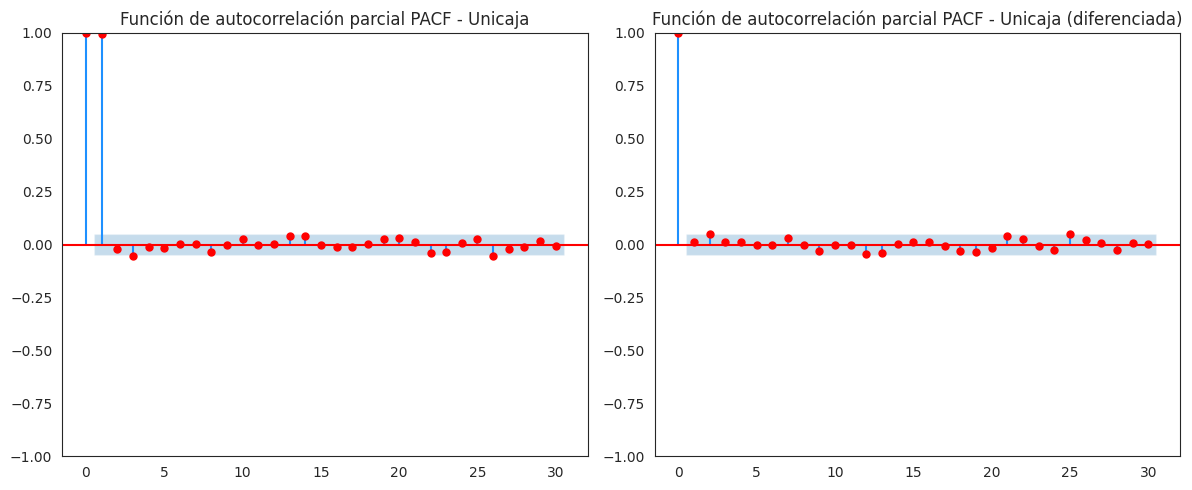

In [ ]:
# Crear subplots con 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Graficar la función de autocorrelación parcial para la serie original
sm.graphics.tsa.plot_pacf(ticker_model.Unicaja, lags=30, ax=ax[0],
                          title='Función de autocorrelación parcial PACF - Unicaja', color = 'r')
# Graficar la función de autocorrelación parcial para las diferencias de la serie
sm.graphics.tsa.plot_pacf(ticker_model_diff.Unicaja_diff, lags=30, ax=ax[1],
                          title='Función de autocorrelación parcial PACF - Unicaja (diferenciada)', color = 'r')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

## **Criterio de información de Akaike (AIC)**

Adicional a los correlogramas AFC y PAFC, los criterios de información permite mejorar la especificación de los ARIMA por dos motivos:

*   Incluye la suma de los residuos al cuadrados.
*   Incluye penalizaciones por la pérdida de grados de libertad de agregar más parámetros.

El objetivo es elegir el número de parámetros que minimiza el valor de los criterios de información.

El criterio de Akaike, H. (1974). A new look at the statistical model identification. *IEEE Transactions on Automatic Control*.

$$AIC= ln(\hat{\sigma^{2}}) + \frac{2k}{T}$$

Donde $\hat{\sigma^{2}}$ es la varianza residual (también equivalente a la suma de los residuos al cuadrado) dividido entre el número de observaciones.

$k = p + q + 1$ es el número total de parámetros estimados y $T$ es el tamaño de la muestra.

El AIC (Criterio de Información de Akaike) y BIC (Criterio de Información Bayesiano) para el modelo diferenciado se especifica de la siguiente forma:

In [ ]:
# Ajuste del modelo manual
modelo = ARIMA(ticker_model_diff, order=(2, 1, 1))
modelo_ajustado = modelo.fit()
# Obtener los parámetros del modelo
orden1 = "ARIMA" + str(modelo.order)
# Obtener AIC y BIC del modelo ajustado
aic = modelo_ajustado.aic
bic = modelo_ajustado.bic
# Imprimir modelo y valores de AIC y BIC
print("Modelo:", orden1, "| AIC:", aic, "| BIC:", bic)

Modelo: ARIMA(2, 1, 1) | AIC: -8473.71949087345 | BIC: -8452.056382971787


El valor del AIC obtenido sugiere que el modelo ARIMA actual puede no ajustarse adecuadamente a los datos. Sería recomendable explorar modelos alternativos que ofrezcan un ajuste mejor.

### **Modelos Autoarima**

Para mejorar el AIC en el ajuste de modelos ARIMA, podemos recurrir a la función auto_arima, que es una herramienta automatizada para seleccionar el mejor modelo ARIMA para una serie
dada. Esta función busca de forma exhaustiva a través de una variedad de combinaciones de parámetros de modelos ARIMA y selecciona el modelo que minimiza el AIC

In [ ]:
# Ajuste del modelo AutoARIMA
model_auto = pm.auto_arima(ticker_model_diff,  # Serie temporal diferenciada
                            start_p=1, start_q=1,  # Valores iniciales para p y q
                            test='adf',  # Prueba de estacionariedad ADF
                            max_p=10, max_q=10,  # Máximos valores de p y q a considerar
                            m=1,  # Frecuencia de la serie temporal
                            d=1,  # Se asigna d con valor 1. Con valor None, dejar que el modelo determine el valor óptimo de d.
                            seasonal=False,  # No hay estacionalidad en la serie temporal
                            start_P=0, D=0,  # Valores iniciales para P y D (para estacionalidad)
                            trace=True,  # Imprimir información detallada del proceso
                            error_action='ignore',  # Ignorar errores para evitar interrupciones
                            suppress_warnings=True,  # Suprimir advertencias
                            stepwise=True)  # Realizar búsqueda paso a paso

# Obtener AIC y BIC del modelo
aic = model_auto.aic()
bic = model_auto.bic()

# Imprimir AIC y BIC en una sola línea
print("AIC:", aic, "| BIC:", bic)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7349.369, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7871.599, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7351.367, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8045.697, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8143.299, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-8196.851, Time=0.83 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-8234.962, Time=1.88 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-8276.066, Time=1.77 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-8295.287, Time=1.20 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-8302.310, Time=2.36 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=-8315.224, Time=6.19 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=-8325.554, Time=5.37 sec
 ARIMA(10,1,1)(0,0,0)[0] inter



Al utilizar auto_arima, hemos podido mejorar la eficiencia en la selección de modelos, evitando la necesidad de realizar pruebas manuales exhaustivas y ajustes iterativos. Además, esta función proporciona una mayor confianza en el modelo seleccionado, ya que se basa en un proceso sistemático y objetivo. La función auto_arima es una herramienta poderosa para mejorar el valor del AIC al ajustar modelos ARIMA, lo que permite una selección más eficiente y precisa del modelo óptimo para una serie temporal dada

A continuación, presentamos los residuos del modelo ajustado mediante los siguientes gráficos.





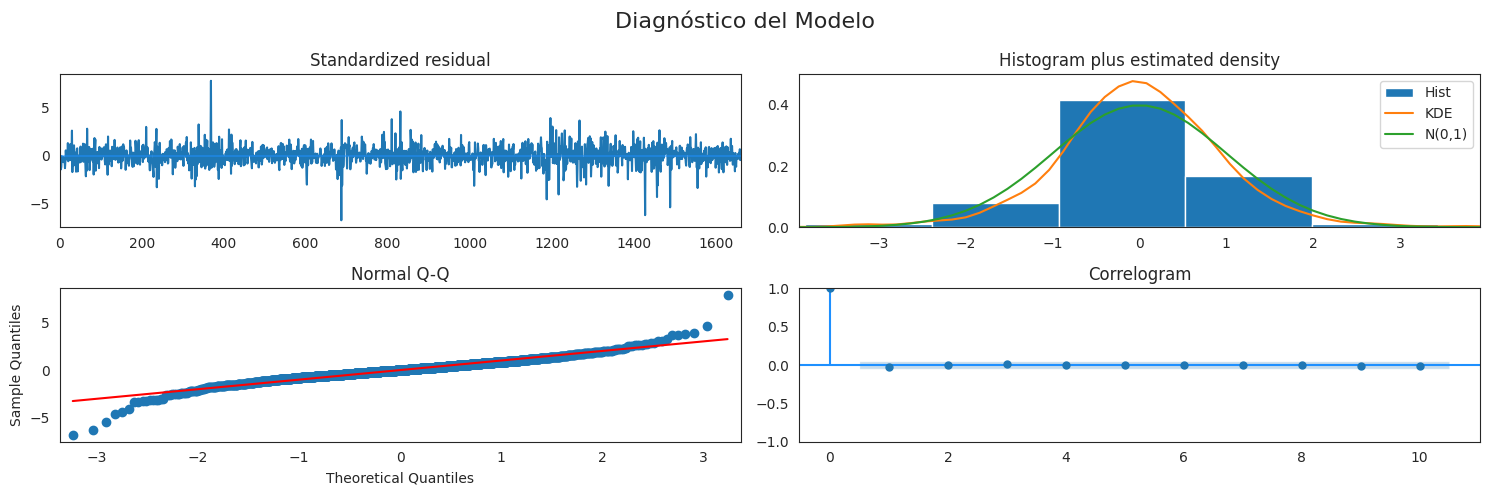

In [ ]:
# Residuos Diagnóstico del Modelo.
model_auto.plot_diagnostics(figsize=(15,5))
plt.suptitle('Diagnóstico del Modelo', fontsize=16)  # Título
plt.tight_layout() # Ajusta los gráficos
plt.show()

El primer gráfico muestra los residuos estandarizados a lo largo del tiempo. Podemos comprobar como los residuos fluctuan alrededor de cero sin mostrar patrones discernibles. Sin embargo, se observa la presencia de algunos valores atípicos que se salen del valor esperado.

El segundo gráfico es un histograma de los residuos estandarizados. Podemos observar que la forma se asemeja a una distribución normal.

El tercer gráfico es un gráfico de QQ (quantile-quantile), que compara los cuantiles de los residuos con los cuantiles de una distribución normal. Observamos que, en su mayoría, los residuos siguen una distribución normal, como lo indica la tendencia de los puntos a seguir la línea recta esperada. Sin embargo, en el inicio y al final del gráfico, algunos valores se alejan de esta línea, sugiriendo desviaciones en esos puntos específicos.

El cuarto gráfico muestra la autocorrelación de los residuos, lo que nos permite identificar cualquier correlación remanente en los datos residuales. Aunque observamos un primer valor alto, el resto de los residuos no muestran una autocorrelación significativa y están cercanos a cero. Esto sugiere que el modelo ha capturado adecuadamente la estructura de autocorrelación en los datos.

Como hemos observado, el proceso de ajuste de modelos de predicción puede comenzar con un enfoque básico como ARIMA y luego avanzar hacia la automatización mediante AUTOARIMA, lo que nos permite explorar una amplia gama de modelos de manera eficiente. Sin embargo, en situaciones donde se requiere un mayor nivel de sofisticación, podemos recurrir a modelos más complejos como SARIMA(Seasonal Autoregressive Integrated Moving Average) y SARIMAX(Añade la posibilidad de incluir variables exógenas). Estos modelos ofrecen la capacidad de incorporar efectos estacionales y exógenos adicionales, lo que resulta beneficioso para mejorar la precisión de las predicciones en entornos donde estos factores son relevantes.

---
# **Pronóstico de Series de tiempo**
---

En este estudio, exploraremos una variedad de modelos de pronóstico de series temporales, desde los métodos tradicionales basados en modelos estadísticos hasta las técnicas más avanzadas de aprendizaje automático y redes neuronales.

Comenzaremos con modelos clásicos como ARIMA y sus variantes (AUTOARIMA, SARIMA), para luego investigar el modelo de Facebook Prophet. Después, avanzaremos hacia modelos de machine learning más sofisticados, como Random Forest y XGBoost, que aprovechan el poder del aprendizaje automático para capturar patrones complejos en los datos. Además, consideraremos la utilidad de las Máquinas de Vectores de Soporte (SVM) en el contexto del pronóstico de series temporales, examinando su capacidad para manejar datos estructurados y bien definidos.

Continuaremos explorando técnicas más avanzadas, como las redes neuronales recurrentes (LSTM), que son capaces de modelar dependencias a largo plazo en las series temporales, y las redes neuronales convolucionales (CNN), que pueden capturar patrones espaciales en los datos.

A lo largo de este estudio, evaluaremos el rendimiento de cada modelo utilizando métricas estándar de evaluación de pronósticos, como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R²). Además, analizaremos la escalabilidad, la interpretabilidad y la robustez de cada modelo para comprender sus ventajas y limitaciones en diferentes contextos de aplicación.

El objetivo primordial de esta investigación es proporcionar una comprensión integral y aplicada del pronóstico de series temporales. Se presentarán los modelos de manera progresiva, lo que permitirá un avance gradual hacia técnicas más avanzadas de aprendizaje automático y redes neuronales. Para cada uno de estos modelos, se han evaluado varias configuraciones, incluyendo valores reales, diferenciados de primer y segundo nivel, así como rendimientos simples y logarítmicos. Finalmente, debido a la extensión del estudio, se detallarán únicamente los modelos finales que han arrojado resultados más prometedores.







In [ ]:
# Visualizamos los datos.
fig = px.line(ticker_model, x=ticker_model.index, y="Unicaja")
fig.update_layout(
    xaxis_title="Fecha", yaxis_title="Precio",
    title={ 'text': "Precio de Cierre de Unicaja",
            'x':0.5,  # Centra el título horizontalmente
            'y':0.95,  # Ajusta la posición vertical del título
            'xanchor': 'center',  # Alinea el título horizontalmente
            'yanchor': 'top'  # Alinea el título verticalmente
          })
fig.show()

## **Evaluación de Modelos**.
Al construir modelos de aprendizaje automático, es común comparar múltiples modelos durante la fase de desarrollo. Posteriormente, evaluamos el rendimiento de estos modelos y seleccionamos aquel que se espera que tenga el mejor desempeño. Para tomar esta decisión de manera objetiva, es fundamental contar con medidas de desempeño. En este sentido, exploraremos diversas estrategias para evaluar modelos de aprendizaje automático en general, así como adaptaciones y consideraciones específicas a tener en cuenta para la tarea de previsión.

### **Métricas de Evaluación**

En este apartado, se proporcionará una explicación detallada de las métricas de evaluación utilizadas para analizar el desempeño de los modelos. Cada métrica desempeña un papel crucial en la evaluación de la precisión y el ajuste del modelo a los datos observados, ofreciendo una comprensión profunda de su capacidad predictiva y su capacidad para generalizar a datos no vistos.

- MSE (Error Cuadrático Medio): El MSE es una medida que calcula el promedio de los cuadrados de las diferencias entre los valores reales y los valores predichos por el modelo. Es una medida de la dispersión de los errores, cuanto más bajo sea el valor del MSE, mejor será el rendimiento del modelo, ya que indicará que las predicciones están más cerca de los valores reales.

- MAE (Error Absoluto Medio): El MAE es una medida que calcula el promedio de las diferencias absolutas entre los valores reales y los valores predichos por el modelo. El MAE proporciona una idea de cuánto se desvían, en promedio, las predicciones del valor real. Es una medida de la precisión del modelo, cuanto más bajo sea el valor de MAE, mejor será el rendimiento del modelo.

- RMSE (Raíz del Error Cuadrático Medio): El RMSE es simplemente la raíz cuadrada del MSE. Es una medida de dispersión similar al MSE, pero en la misma escala que los datos originales.

- MAPE (Error Porcentual Absoluto Medio): El MAPE es una medida que calcula el promedio de los errores porcentuales absolutos entre los valores reales y los valores predichos por el modelo. El MAPE expresa el error relativo como un porcentaje del valor real. Cuanto menor sea el MAPE, mejor será el rendimiento del modelo y es muy útil cuando se desea evaluar el rendimiento del modelo en términos de precisión porcentual.

- R2 (Coeficiente de Determinación): El R2 es una medida que indica cuánta variabilidad de los datos es explicada por el modelo. Representa la proporción de la variación de la variable dependiente que es predecible a partir de la variable independiente. Un valor de R2 más cercano a 1 indica un buen ajuste del modelo a los datos, lo que significa que el modelo explica una gran parte de la variabilidad observada en los datos. Un valor de R2 cercano a 0 indica que el modelo no es capaz de explicar la variabilidad en los datos y puede ser un indicador de un mal ajuste del modelo.

### **Función de Evaluación**

A continuación se especifica la función metricas_evaluacion que calcula y muestra las métricas de evaluación.

In [ ]:
def metricas_evaluacion(y_true, y_pred, nombre_modelo):
    # Función para calcular el error porcentual absoluto medio
    def error_porcentual_absoluto_medio(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calcula las métricas de evaluación
    mse = metrics.mean_squared_error(y_true, y_pred)  # Error cuadrático medio
    mae = metrics.mean_absolute_error(y_true, y_pred)  # Error absoluto medio
    rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
    mape = error_porcentual_absoluto_medio(y_true, y_pred)  # Error porcentual absoluto medio
    r2 = metrics.r2_score(y_true, y_pred)  # Coeficiente de determinación R2

    # Imprime los resultados
    print(f'Resultados de las métricas de evaluación para el modelo {nombre_modelo}:')
    print(f'MSE: {mse}')  # Error cuadrático medio
    print(f'MAE: {mae}')  # Error absoluto medio
    print(f'RMSE: {rmse}')  # Raíz del error cuadrático medio
    print(f'MAPE: {mape}')  # Error porcentual absoluto medio
    print(f'R2: {r2}')  # Coeficiente de determinación R2

## **Modelo ARIMA.**

El modelo ARIMA (Autoregressive Integrated Moving Average) es una técnica estadística comúnmente empleada para prever tendencias futuras en datos de series temporales. Este enfoque, ampliamente utilizado en análisis financieros como la predicción de precios de acciones, combina componentes autoregresivos (AR) e integrados de media móvil (MA) para modelar las relaciones entre observaciones pasadas y predecir futuros movimientos de precios.

Este estudio se centra en la aplicación de ARIMA para modelar la serie temporal de precios de acciones, ajustando el modelo a los datos históricos y evaluando su capacidad predictiva.

In [ ]:
# Generamos el modelo ARIMA ajustando nuestros valores para p,d y q estudiados anteriormente.
model_ARIMA = ARIMA(ticker_model, order=(1, 0, 1))
model_fit_ARIMA = model_ARIMA.fit()
print(model_fit_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                Unicaja   No. Observations:                 1664
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4247.596
Date:                Sun, 07 Apr 2024   AIC                          -8487.191
Time:                        09:07:19   BIC                          -8465.523
Sample:                             0   HQIC                         -8479.161
                               - 1664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8861      0.114      7.740      0.000       0.662       1.110
ar.L1          0.9961      0.002    463.785      0.000       0.992       1.000
ma.L1          0.0099      0.020      0.492      0.6

El resumen del modelo proporciona una visión detallada de los resultados obtenidos. La tabla de coeficientes muestra los valores de los términos correspondientes, donde los coeficientes más bajos indican menor influencia en el modelo. Aunque el modelo parece capturar la dinámica de los datos, podría beneficiarse de la exploración o la consideración de modelos más complejos. A continuación, procedemos a visualizar los errores residuales para una evaluación más detallada del modelo.

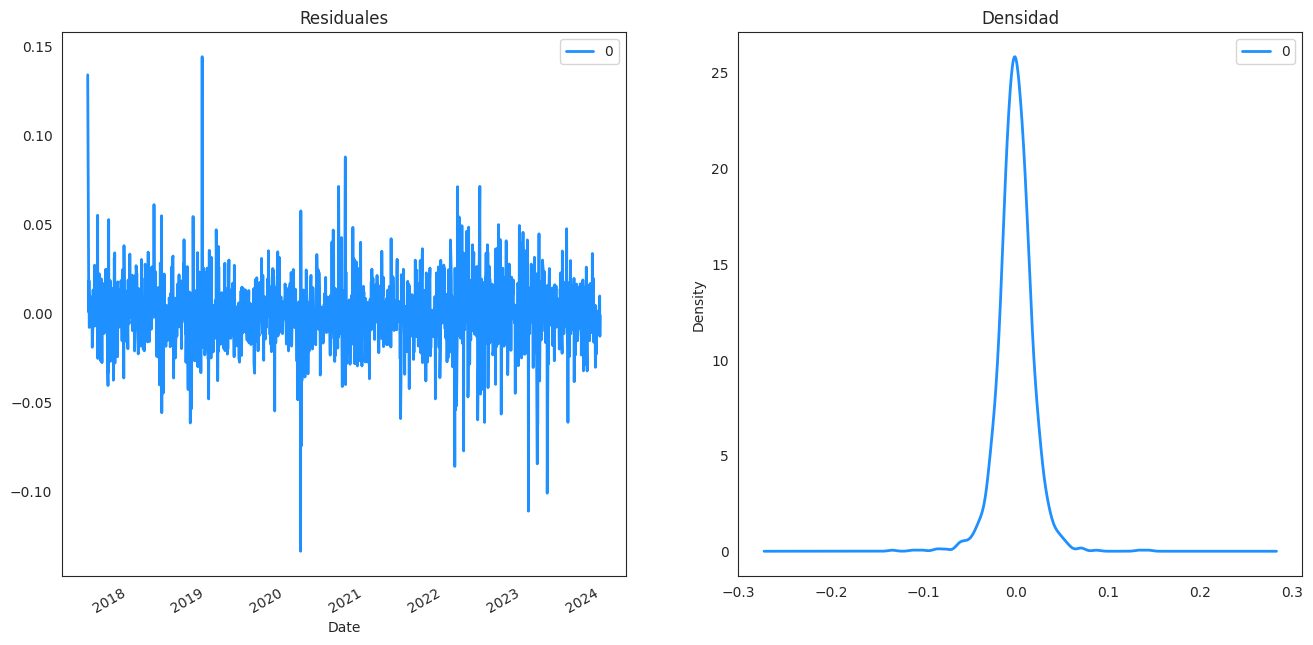

In [ ]:
#Graficamos los errores residuales.
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':100})
residuals = pd.DataFrame(model_fit_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(ax=ax[0], title= 'Residuales', color = 'dodgerblue', lw=2)
residuals.plot(kind= 'kde', title = 'Densidad', ax= ax[1], color = 'dodgerblue', lw= 2)
plt.show()

Una vez graficados los errores residuales, podemos observar su distribución. Los errores prácticamente tienen una media cercana a cero y fluctúan alrededor de este valor con algunos valores atipicos.

A continuación se grafican los valores reales contra los valores ajustados.

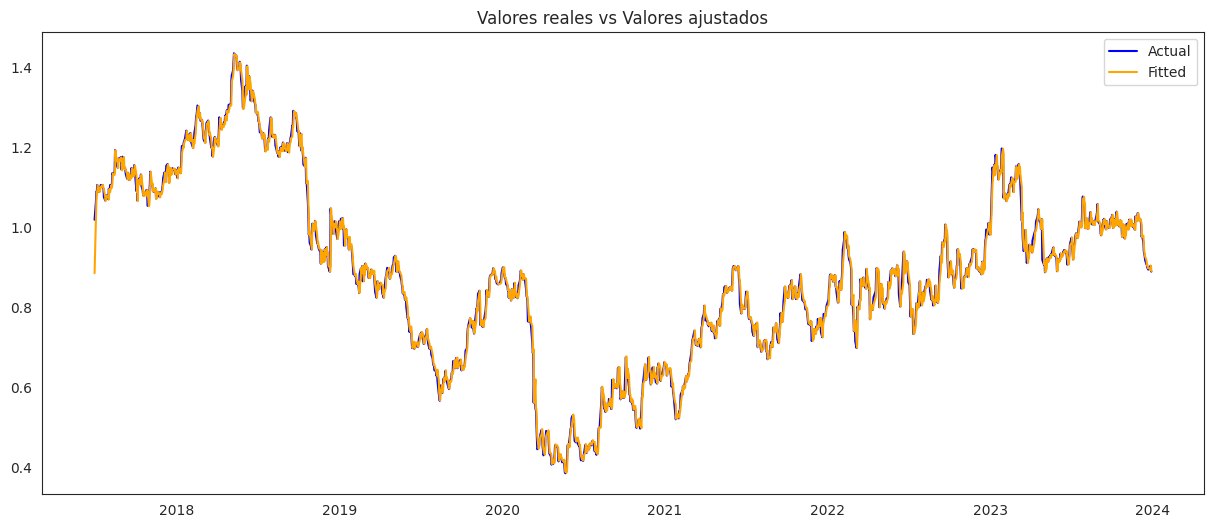

In [ ]:
# Actual vs Fitted
plt.figure(figsize=(15, 6))
plt.plot(ticker_model, color='blue', label='Actual')
plt.plot(model_fit_ARIMA.fittedvalues, color='orange', label='Fitted')
plt.legend()
plt.title('Valores reales vs Valores ajustados')
plt.show()

A continuación, se realiza la llamada a la función de evaluación de métricas para examinar el rendimiento del modelo.


In [ ]:
# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Arima"
metricas_evaluacion(ticker_model, model_fit_ARIMA.fittedvalues, nombre_modelo)

Resultados de las métricas de evaluación para el modelo Arima:
MSE: 0.000364713846075133
MAE: 0.01353639664361148
RMSE: 0.01909748271566525
MAPE: 31.696561964399777
R2: 0.992678656668466


Los resultados del análisis indican que el modelo ARIMA proporciona predicciones que están cercanas a los valores reales en promedio. El Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE) son bajos, lo que sugiere un buen ajuste entre las predicciones y los valores reales. Además, la Raíz del Error Cuadrático Medio (RMSE) indica que las predicciones se encuentran generalmente cerca de los valores reales, mientras que el Error Porcentual Absoluto Medio (MAPE) muestra un promedio de error de casi el 32% en relación con los valores reales. El Coeficiente de Determinación (R2) es alto, lo que indica que una gran proporción de la variabilidad en los datos de respuesta ha sido explicada por el modelo.

Es importante tener en cuenta que la ausencia de validación cruzada puede sesgar la evaluación del rendimiento del modelo y potencialmente conducir a un sobreajuste. Por lo tanto, a continuación se propone realizar validación cruzada para obtener una evaluación más completa y confiable del rendimiento del modelo.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(ticker_model) * 0.8)
train, test = ticker_model[:train_size], ticker_model[train_size:]

# Crear el modelo ARIMA
modelo_ARIMA = ARIMA(train, order=(1, 0, 1))  # Especificar el orden del modelo ARIMA

# Ajustar el modelo a los datos de entrenamiento
model_fit_ARIMA_train = modelo_ARIMA.fit()
print(model_fit_ARIMA_train.summary())

# Realizar predicciones sobre los datos de prueba
forecast = model_fit_ARIMA_train.forecast(steps=len(test))

                               SARIMAX Results                                
Dep. Variable:                Unicaja   No. Observations:                 1331
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3409.201
Date:                Sun, 07 Apr 2024   AIC                          -6810.403
Time:                        09:07:21   BIC                          -6789.628
Sample:                             0   HQIC                         -6802.617
                               - 1331                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8611      0.140      6.144      0.000       0.586       1.136
ar.L1          0.9967      0.002    440.081      0.000       0.992       1.001
ma.L1          0.0062      0.022      0.286      0.7

In [ ]:
# Visualizamos los valores reales comparando con los valores obtenidos. Limitamos a 10 resultados por el tamaño del conjunto
print("\nValores reales Vs Resultados obtenidos:")
for date, real, pred in zip(test.tail(10).index, test.tail(10).values, forecast[-10:]):
    print("Fecha: {:<10} | Valor real: {:<10} | Predicción: {}".format(date.strftime("%Y-%m-%d"), real[0], pred))


Valores reales Vs Resultados obtenidos:
Fecha: 2023-12-14 | Valor real: 0.9279999732971191 | Predicción: 0.8842589900372617
Fecha: 2023-12-15 | Valor real: 0.9185000061988831 | Predicción: 0.8841814593348323
Fecha: 2023-12-18 | Valor real: 0.9075000286102295 | Predicción: 0.8841041881278683
Fecha: 2023-12-19 | Valor real: 0.9075000286102295 | Predicción: 0.8840271755478376
Fecha: 2023-12-20 | Valor real: 0.8989999890327454 | Predicción: 0.8839504207291153
Fecha: 2023-12-21 | Valor real: 0.8999999761581421 | Predicción: 0.8838739228089736
Fecha: 2023-12-22 | Valor real: 0.8949999809265137 | Predicción: 0.8837976809275722
Fecha: 2023-12-27 | Valor real: 0.9045000076293945 | Predicción: 0.8837216942279488
Fecha: 2023-12-28 | Valor real: 0.8914999961853027 | Predicción: 0.8836459618560093
Fecha: 2023-12-29 | Valor real: 0.8899999856948853 | Predicción: 0.8835704829605183


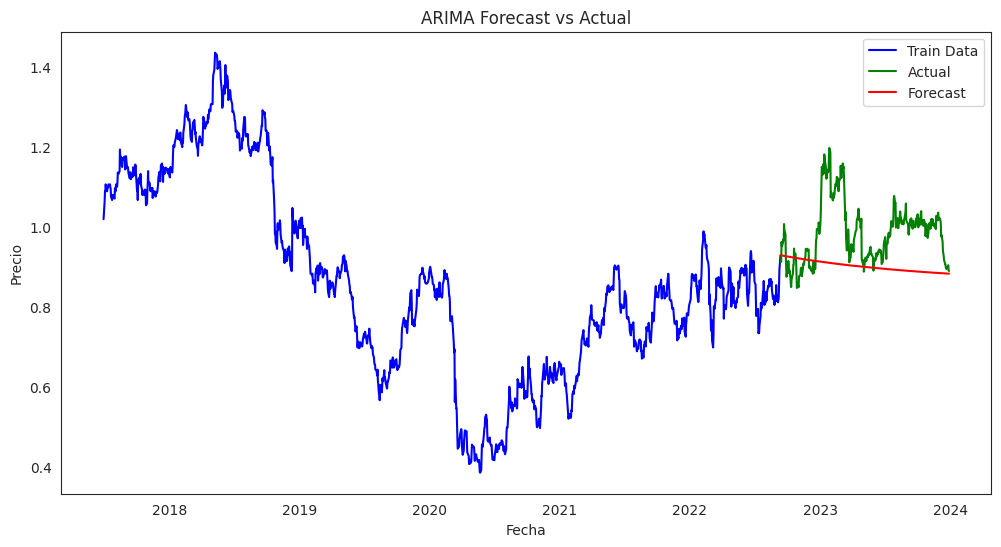

In [ ]:
# Se grafican los resultados
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [ ]:
# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo 1 Arima train"
metricas_evaluacion(train, model_fit_ARIMA_train.fittedvalues, nombre_modelo)

Resultados de las métricas de evaluación para el modelo Modelo 1 Arima train:
MSE: 0.0003664242817742604
MAE: 0.013511149342634289
RMSE: 0.019142212039737216
MAPE: 34.5987752560886
R2: 0.9936533454477701


Un MSE, MAE y RMSE bajos indican que las predicciones están cerca de los valores reales en promedio. Sin embargo, un MAPE del 35% sugiere que las predicciones tienen un error relativamente alto en promedio en relación con los valores reales, lo que podría indicar la necesidad de mejorar la precisión del modelo. Un R2 alto indica que una gran proporción de la variabilidad en los datos de respuesta ha sido explicada por el modelo. En general, estos resultados sugieren que el modelo ARIMA tiene un desempeño aceptable en la predicción de los datos de entrenamiento. A continuación veamos su desempeño con los datos de test.

In [ ]:
# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo 1 Arima test"
metricas_evaluacion(test, forecast, nombre_modelo)

Resultados de las métricas de evaluación para el modelo Modelo 1 Arima test:
MSE: 0.013237298053449626
MAE: 0.09332622557704243
RMSE: 0.11505345737286483
MAPE: 8.609882294187067
R2: -1.3259118445827949


Como hemos comprobado, los resultados muestran que el modelo ARIMA funciona de manera efectiva en el conjunto de entrenamiento, demostrado por el bajo MSE, MAE y RMSE. Sin embargo, al generalizar el modelo para el conjunto de prueba, se evidencian dificultades significativas, especialmente con un coeficiente de determinación (R2) negativo y en el valor del MAPE. Esta discrepancia entre las predicciones y los valores reales en el conjunto de prueba sugiere la posibilidad de un sobreajuste del modelo. Como hemos podido comprobar en la gráfica y confirmado con los resultados de las métricas, los valores no se ajustan adecuadamente. Con el fin de mejorar los resultados, se procederá a explorar otros modelos alternativos.

## **Modelo AUTOARIMA.**

AutoARIMA es una extensión del modelo ARIMA que automatiza el proceso de selección de los hiperparámetros del modelo, lo que lo hace más accesible y fácil de usar. Este enfoque utiliza técnicas de búsqueda automática para identificar los valores óptimos de p, d y q, los parámetros que determinan la estructura autoregresiva, integrada y de media móvil del modelo ARIMA.

Al igual que con ARIMA, AutoARIMA es especialmente útil en el análisis financiero para predecir los precios de las acciones. Su capacidad para ajustar automáticamente los parámetros del modelo a los datos históricos puede ayudar a mejorar la precisión de las predicciones y reducir el tiempo necesario para el ajuste del modelo.

Este apartado se enfocará en la aplicación de AutoARIMA para modelar la serie temporal de precios de acciones. Exploraremos cómo AutoARIMA simplifica el proceso de modelado de series temporales y evaluaremos su rendimiento.

In [ ]:
# Modelo Autoarima
ticker = yf.download(tickers, start=start_date, end=end_date, progress=False)
# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = ticker[0:int(len(ticker)*0.7)],ticker[int(len(ticker)*0.7):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values

In [ ]:
# Ajuste del modelo AutoARIMA
modelo_autoarima = auto_arima(training_data,  # Conjunto de datos de entrenamiento para ajustar el modelo ARIMA
                    start_p=1, start_q=1,  # Valores iniciales para los parámetros p y q
                    test='adf',  # Método de prueba de estacionariedad utilizando el test de Dickey-Fuller Aumentado (ADF)
                    max_p=10, max_q=10,  # Valores máximos posibles para los parámetros p y q
                    d=1,  # Orden de diferenciación para hacer la serie temporal estacionaria
                    seasonal=False,  # Indicación de que no se considera un componente estacional en el modelo ARIMA
                    trace=True,  # Muestra información detallada del proceso de búsqueda del modelo ARIMA
                    error_action='ignore',  # Ignora los errores que puedan ocurrir durante la búsqueda del modelo ARIMA
                    suppress_warnings=True,  # Suprime las advertencias durante el proceso de búsqueda
                    scoring='mse',  # Utiliza el error cuadrático medio (MSE) como medida de puntuación
                    stepwise=True)  # Utiliza un enfoque de búsqueda stepwise para encontrar el mejor modelo ARIMA

# Mejor modelo ARIMA encontrado por AutoARIMA
best_arima_order = modelo_autoarima.order
print(modelo_autoarima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6089.966, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6093.367, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6091.385, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6091.383, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6095.312, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.027 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1164
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3048.656
Date:                Sun, 07 Apr 2024   AIC                          -6095.312
Time:                        09:07:23   BIC                          -6090.253
Sample:                             0   HQIC                         -6093.403
                               - 1164                                  

In [ ]:
# Ajuste del modelo ARIMA
history = [x for x in training_data]  # Se crea una lista inicialmente con las observaciones del conjunto de entrenamiento
model_predictions = []  # Lista para almacenar las predicciones del modelo ARIMA
N_test_observations = len(test_data)  # Cantidad de observaciones en el conjunto de prueba

for time_point in range(N_test_observations):  # Bucle para cada punto en el tiempo en el conjunto de prueba
    model = ARIMA(history, order=best_arima_order) # Se inicializa un modelo ARIMA con el historial de observaciones.
    model_fit = model.fit()  # Se ajusta el modelo ARIMA a los datos históricos
    output = model_fit.forecast()  # Se realiza una predicción para el siguiente punto en el tiempo
    yhat = output[0]  # Se extrae el valor de la predicción
    model_predictions.append(yhat)  # Se añade la predicción a la lista de predicciones del modelo
    true_test_value = test_data[time_point]  # Se obtiene el valor real del siguiente punto en el tiempo
    history.append(true_test_value)  # Se añade el valor real al historial para futuras predicciones


A continuación, se presenta un análisis visual de la predicción generada por el modelo junto con la exploración de los residuos correspondientes. Este análisis es crucial para evaluar la validez y precisión del modelo en la predicción de los datos de interés.

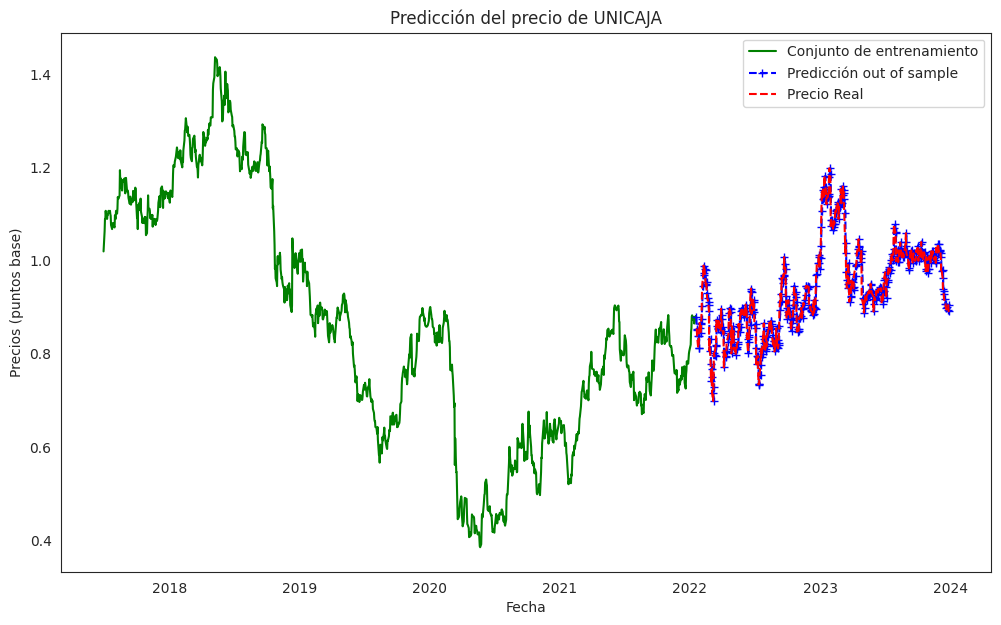

In [ ]:
plt.figure(figsize=(12, 7))
train_set_range = ticker[0:int(len(ticker)*0.7)].index
test_set_range = ticker[int(len(ticker)*0.7):].index
plt.plot(train_set_range , training_data, color='green',label='Conjunto de entrenamiento')
plt.plot(test_set_range, model_predictions, color='blue', marker='+', linestyle='dashed',label='Predicción out of sample')
plt.plot(test_set_range, test_data, color='red', linestyle='dashed', label='Precio Real')
plt.title('Predicción del precio de UNICAJA')
plt.xlabel('Fecha')
plt.ylabel('Precios (puntos base)')
plt.legend()
plt.show()

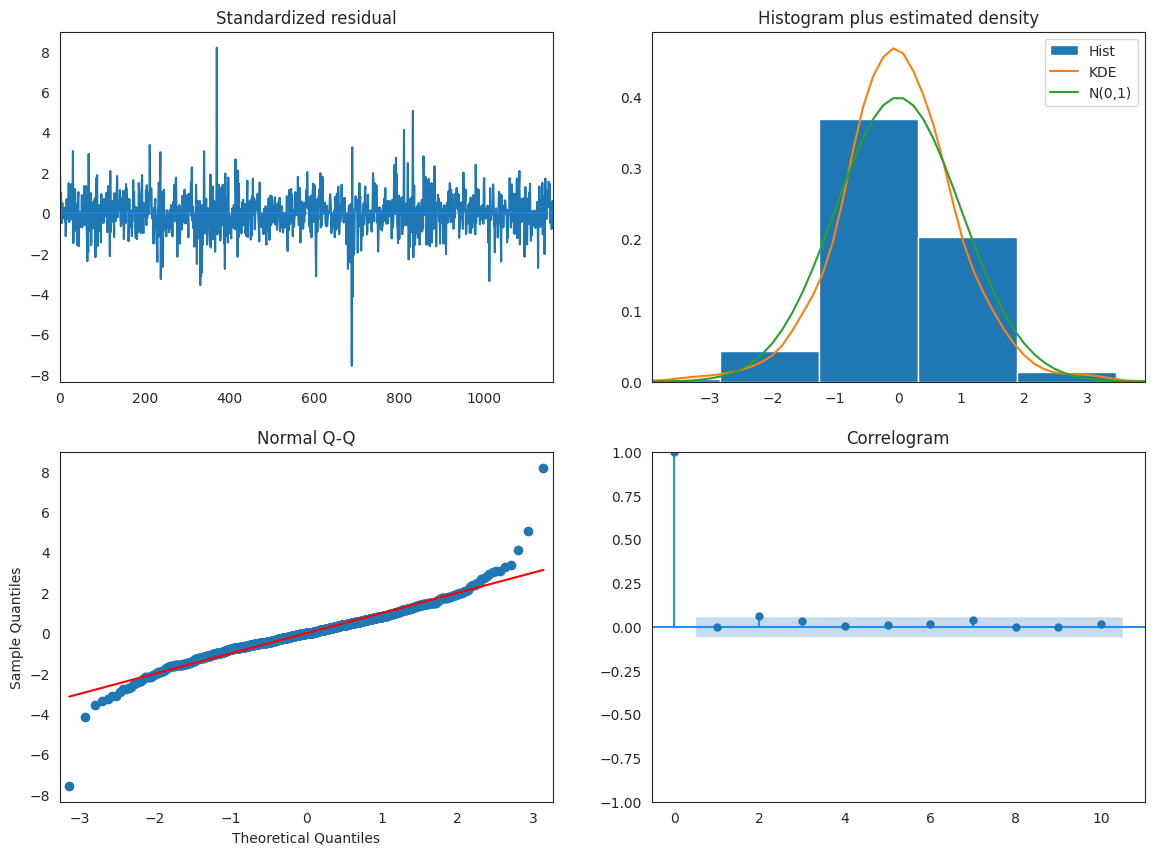

In [ ]:
#Graficamos los residuos
modelo_autoarima.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
# Crear un DataFrame para comparar los valores reales y predichos
comparison_df = pd.DataFrame({'Real': test_data, 'Predicho': model_predictions})
print(comparison_df)

         Real  Predicho
0    0.851707  0.879062
1    0.852634  0.851707
2    0.837798  0.852634
3    0.812761  0.837798
4    0.812761  0.812761
..        ...       ...
495  0.900000  0.899000
496  0.895000  0.900000
497  0.904500  0.895000
498  0.891500  0.904500
499  0.890000  0.891500

[500 rows x 2 columns]


A continuación se muestran los resultados de la función de evaluación.

In [ ]:
# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo AutoArima test"
metricas_evaluacion(test_data, model_predictions, nombre_modelo)

Resultados de las métricas de evaluación para el modelo Modelo AutoArima test:
MSE: 0.00046052501092240305
MAE: 0.01530928075313568
RMSE: 0.021459846479469583
MAPE: 1.661351537705581
R2: 0.9488047649728009


Estos resultados indican un buen rendimiento del modelo AutoARIMA en la predicción de los datos de prueba, con valores bajos de error y un alto coeficiente de determinación, lo que sugiere que las predicciones se ajustan bien a los valores reales. A continuación se continua explorando otras técnicas de modelado alternativos para mejorar su desempeño.

## **Modelo SARIMA.**

El modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) es una extensión del modelo ARIMA que incorpora la estacionalidad en los datos de series temporales, lo que mejora la precisión de las predicciones al capturar patrones estacionales.

Al aplicar SARIMA a la predicción del precio de las acciones, se aprovechan sus capacidades para modelar tanto los componentes de tendencia como los estacionales de la serie temporal. SARIMA permite incorporar la estacionalidad en diferentes períodos de tiempo, lo que es adecuado para pronosticar precios de acciones con patrones estacionales distintivos, como fluctuaciones diarias, semanales o anuales.

Este estudio explora cómo utilizar SARIMA para modelar la serie temporal de los precios de las acciones, ajustando el modelo a los datos históricos y evaluando su capacidad para generar predicciones precisas. SARIMA ofrece una estructura flexible que permite ajustar varios parámetros para adaptarse a diferentes patrones de datos, lo que lo convierte en una herramienta valiosa para analizar y pronosticar los movimientos del mercado financiero.

Además, existe una variante conocida como SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Factors), que permite la inclusión de variables exógenas en el modelo. Esto le confiere la capacidad de considerar la influencia de factores externos en la serie temporal, lo que amplía su utilidad en el análisis y pronóstico de datos financieros.

### **SARIMA con búsqueda de parámetros**

A continuación, se realizará el ajuste de un modelo utilizando el método de búsqueda automática de hiperparámetros AutoArima para determinar los mejores parámetros estacionales. Posteriormente, se ajustará el modelo mediante la clase SARIMAX con los parámetros óptimos encontrados, y se procederá a analizar su desempeño mediante la evaluación de métricas y la prueba de Ljung-Box para evaluar la autocorrelación de los residuos.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=14.13 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-3290.219, Time=0.46 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-6197.105, Time=7.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-4488.764, Time=7.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-3290.812, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-5823.586, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-6337.163, Time=28.07 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=30.43 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.35 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-3289.376, Time=4.81 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-6335.571, Time=27.03 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-5865.988, Time=4.68 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-4486.196, Time=23.44 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-6333.997, Time=37.66 sec
 ARIMA(1,0,0)(2,

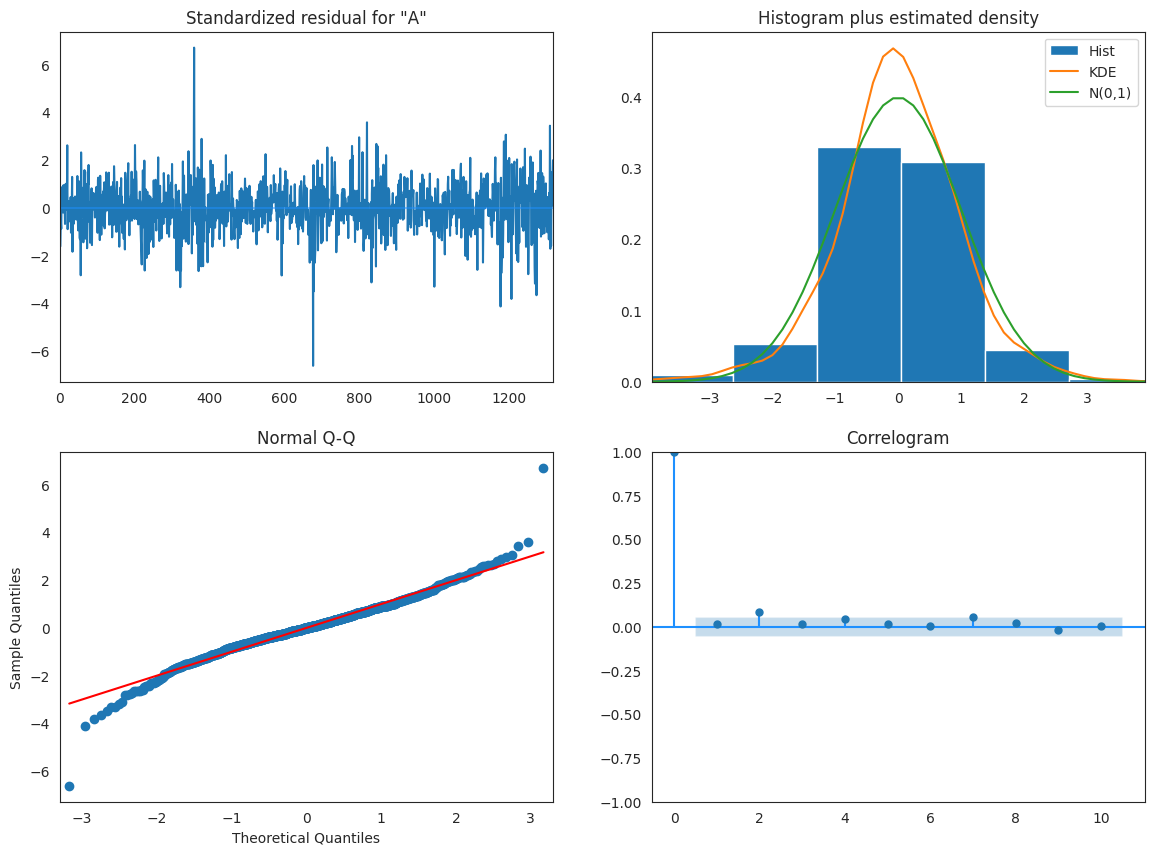

In [ ]:
# Descarga de los datos
ticker = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Seleccionar una sola serie temporal como 'endog'
endog_data = ticker['Adj Close']

# Obtener el índice para dividir los datos
split_index = int(len(endog_data) * 0.8)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_endog = endog_data.iloc[:split_index]
test_endog = endog_data.iloc[split_index:]

# Ajuste de ARIMA estacional utilizando stepwise auto-ARIMA
seasonal_model = pm.auto_arima(train_endog, start_p=1, start_q=1, test='adf', max_p=5, max_q=5, m=12,
                               start_P=0, seasonal=True, d=None, D=1, trace=True, error_action='ignore',
                               suppress_warnings=True, stepwise=True)

# Mejor modelo ARIMA encontrado por AutoARIMA
best_sarima_order = seasonal_model.order
best_seasonal_sarima_order = seasonal_model.seasonal_order

# Ajustar el modelo SARIMAX con los mejores parámetros encontrados
model = SARIMAX(train_endog, order=best_sarima_order, seasonal_order=best_seasonal_sarima_order)
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Hacer predicciones
forecast = results.predict(start=split_index, end=len(endog_data)-1, dynamic=False, typ='levels')

# Comprobar el ruido blanco de los residuos
residuals = results.resid
lb_test_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test_results)

# Imprimir los diagnósticos del modelo
results.plot_diagnostics(figsize=(14, 10))
plt.show()


In [ ]:
# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo Sarima"
metricas_evaluacion(test_endog, forecast, nombre_modelo)

Resultados de las métricas de evaluación para el modelo Modelo Sarima:
MSE: 0.0057296044544468015
MAE: 0.05885740645360054
RMSE: 0.07569415072808995
MAPE: 5.799476254248747
R2: -0.006742827090704617


El modelo muestra un desempeño insatisfactorio en la predicción de los precios. El MAPE sugiere que las predicciones difieren del valor real en aproximadamente un 5.82%. Además, el coeficiente de determinación (R2) negativo indica que el modelo no se ajusta bien a los datos y no puede explicar la variabilidad observada. Estos resultados sugieren que el modelo SARIMA no es adecuado para la predicción de los datos financieros.

En el siguiente apartado de este trabajo, se explorará el modelo SARIMA utilizando rendimientos simples para diferenciar el conjunto de datos.

### **SARIMA con rendimientos simples**.

                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                 1329
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                2812.935
Date:                             Sun, 07 Apr 2024   AIC                          -5611.869
Time:                                     09:12:43   BIC                          -5575.587
Sample:                                          0   HQIC                         -5598.265
                                            - 1329                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9638      0.203     -4.739      0.000      -1.362      -0.565
ar.L2          0.0214      

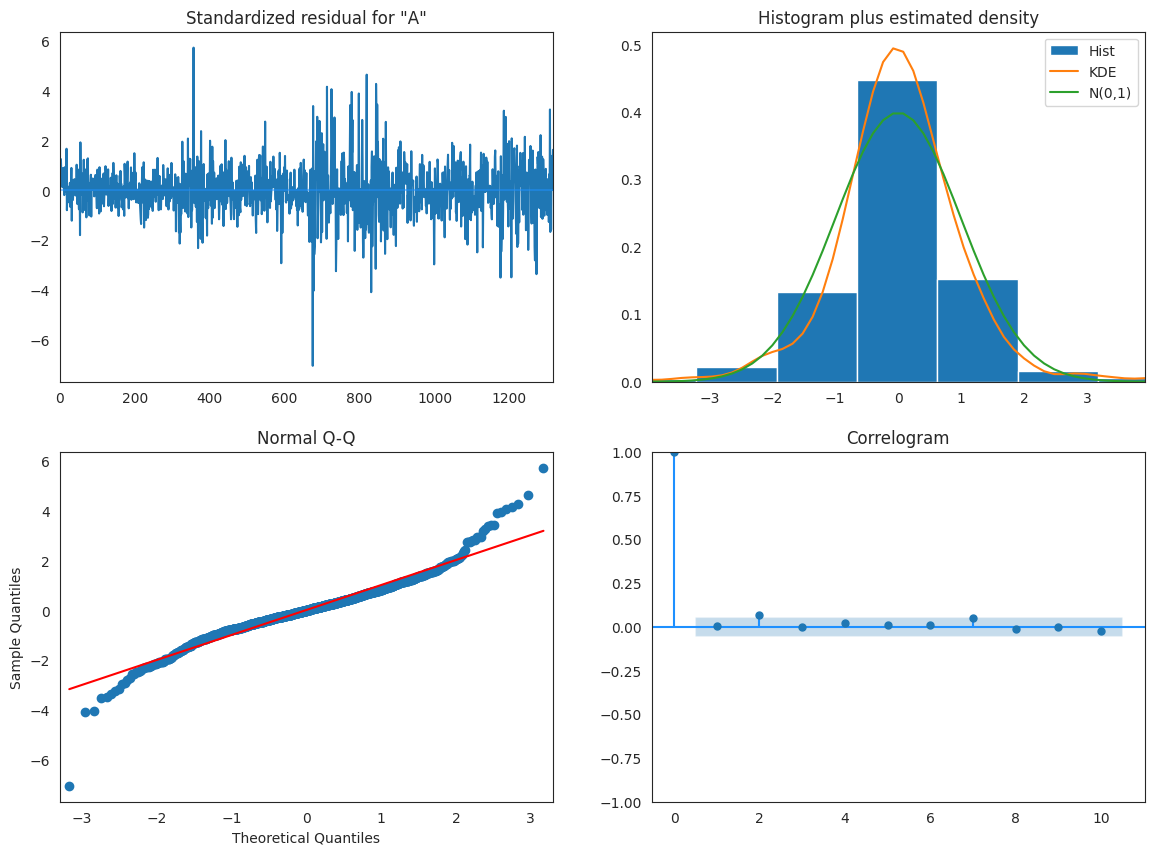

In [ ]:
# Descarga de los datos
ticker = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Seleccionar una sola serie temporal como 'endog'
endog_data = ticker['Adj Close']

# Obtener los rendimientos simples
endog_returns = endog_data.pct_change().dropna()

# Realizar la diferenciación de primer orden
endog_diff = endog_returns.diff().dropna()

# Obtener el índice para dividir los datos
split_index = int(len(endog_diff) * 0.8)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_endog = endog_diff.iloc[:split_index]
test_endog = endog_diff.iloc[split_index:]

# Ajuste de ARIMA estacional utilizando stepwise auto-ARIMA
model = SARIMAX(train_endog, order=(2, 0, 2), seasonal_order=(2, 1, 0, 12))

# Best model:
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Hacer predicciones
forecast = results.predict(start=split_index, end=len(endog_diff)-1, dynamic=False, typ='levels')

# Comprobar el ruido blanco de los residuos
residuals = results.resid
lb_test_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test_results)

# Imprimir los diagnósticos del modelo
results.plot_diagnostics(figsize=(14, 10))
plt.show()


In [ ]:
# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo Sarima Rendimientos Simples"
metricas_evaluacion(test_endog, forecast, nombre_modelo)

Resultados de las métricas de evaluación para el modelo Modelo Sarima Rendimientos Simples:
MSE: 0.0009272732037093468
MAE: 0.02384626030063544
RMSE: 0.030451160958317285
MAPE: 353.12248150185854
R2: -0.27338756680639453


El modelo ajustado para los rendimientos simples tiene el MSE, MAE y RMSE relativamente bajos, el MAPE es alto, lo que indica una discrepancia significativa entre las predicciones y los valores reales. Además, el coeficiente de determinación (R2) negativo sugiere que el modelo no se ajusta bien a los datos y no puede explicar la variabilidad observada.

En resumen, los resultados obtenidos hasta el momento no son completamente satisfactorios, lo que motiva a explorar otras estrategias de modelado alternativas para mejorar la capacidad predictiva del modelo.

## **Modelo Prophet**

Prophet es una herramienta de código abierto desarrollada por el equipo de Facebook, diseñada específicamente para pronosticar series temporales con una amplia gama de aplicaciones, incluida la predicción de activos financieros. Utiliza un modelo aditivo que incorpora componentes estacionales anuales, semanales y diarios, así como efectos de días festivos y tendencias no lineales, lo que lo hace ideal para capturar la complejidad de los datos financieros.

Al aplicar Prophet a la predicción de acciones, se aprovechan sus capacidades para modelar patrones estacionales, tendencias cambiantes y efectos de días festivos en los precios de las acciones. Además, Prophet es robusto frente a datos faltantes y cambios en la tendencia, lo que lo convierte en una opción atractiva para pronosticar series temporales financieras que pueden estar sujetas a volatilidad y eventos imprevistos.

Este estudio explora cómo utilizar Prophet para modelar la serie temporal de los precios de las acciones, ajustando el modelo a los datos históricos y evaluando su capacidad para generar predicciones precisas. Prophet ofrece una interfaz fácil de usar y una capacidad de ajuste flexible.

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qivqfdh/a8rqjkab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qivqfdh/ro93m_hw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76381', 'data', 'file=/tmp/tmp9qivqfdh/a8rqjkab.json', 'init=/tmp/tmp9qivqfdh/ro93m_hw.json', 'output', 'file=/tmp/tmp9qivqfdh/prophet_modelbelwc8tt/prophet_model-20240407091245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:12:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:12:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


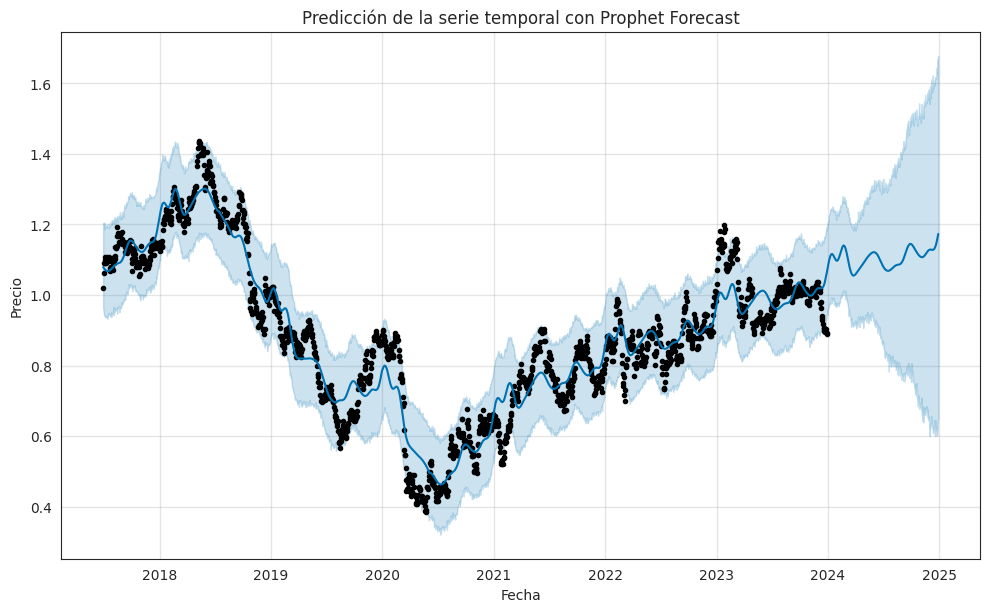

Resultados de las métricas de evaluación para el modelo Modelo Prophet:
MSE: 0.0042766226415056705
MAE: 0.052111808291463384
RMSE: 0.06539589162558815
MAPE: 6.566478292647547
R2: 0.9141501673302942


In [ ]:
# Descargar los datos
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Crear un DataFrame con las fechas y los valores de cierre ajustados (Adj Close)
df = pd.DataFrame({'ds': stock_data.index, 'y': stock_data['Adj Close']})

# Inicializar el modelo Prophet
model = Prophet(
    seasonality_mode='additive',   # Modo aditivo para la estacionalidad
    yearly_seasonality=True,       # Estacionalidad anual
    weekly_seasonality=False,      # Sin estacionalidad semanal
    daily_seasonality=False,       # Sin estacionalidad diaria
    interval_width=0.95            # Intervalo de confianza del 95%
)

# Ajustar el modelo a los datos
model.fit(df)

# Predecir para un rango de fechas futuro
future = model.make_future_dataframe(periods=365)  # Predecir un año adicional
forecast = model.predict(future)

# Visualizar la predicción
fig = model.plot(forecast)
plt.title('Predicción de la serie temporal con Prophet Forecast')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

# Métricas de evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual_values = df['y']
predicted_values = forecast['yhat'][:-365]  # Solo tomamos las predicciones para el período de datos original

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo Prophet"
metricas_evaluacion(actual_values, predicted_values, nombre_modelo)

El código utiliza la librería Prophet de Facebook para realizar pronósticos de series temporales sobre datos financieros descargados. Después de ajustar el modelo a los datos históricos, genera predicciones para un año adicional y evalúa su desempeño utilizando métricas como el Error Absoluto Medio (MAE), el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R2).

Los resultados sugieren que el modelo Prophet aditivo demuestra un buen desempeño en la predicción de los precios de cierre ajustados, con valores relativamente bajos de MSE, MAE y RMSE, y un MAPE con un valor aceptable. Además, el coeficiente de determinación (R2) alto indica un buen ajuste del modelo a los datos, lo que respalda su utilidad en la predicción de series temporales financieras, la librería desarrollada por facebook es una opción a tener en cuenta. También se ha estudiado el modelo multiplicativo para la estacionalidad sin observar a grandes diferencias respecto al modelo aditivo, los dos modelos en han tenido un rendimiento similar. Se continua explorando otras estrategias de modelado alternativas para mejorar la capacidad predictiva del modelo.

##**Modelo Random Forest**



Random Forest es un algoritmo de aprendizaje automático ampliamente utilizado que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la combinación de sus predicciones para mejorar la precisión y la generalización del modelo. Este enfoque lo hace adecuado para la predicción de series temporales financieras, donde se busca capturar relaciones complejas y no lineales entre las variables de entrada y la variable objetivo.

Al aplicar Random Forest a la predicción de acciones, se pueden utilizar los precios históricos de las acciones para entrenar el modelo. La capacidad de Random Forest para manejar grandes conjuntos de datos y su resistencia al sobreajuste lo convierten en una herramienta poderosa para la predicción precisa de los precios futuros de las acciones.

Este estudio explora cómo Random Forest puede ser implementado y ajustado para modelar la serie temporal de los precios de las acciones, evaluando su rendimiento en términos de precisión de predicción y capacidad para capturar patrones en los datos históricos.

Se han explorado varios modelos de Random Forest hasta lograr un ajuste óptimo. En el siguiente código, se emplea GridSearchCV para buscar los mejores hiperparámetros para el modelo mediante validación cruzada. Posteriormente, se entrena el modelo con los hiperparámetros óptimos encontrados y se evalúa su rendimiento. Finalmente, se visualiza la predicción del modelo junto con los valores reales.

[*********************100%%**********************]  1 of 1 completed


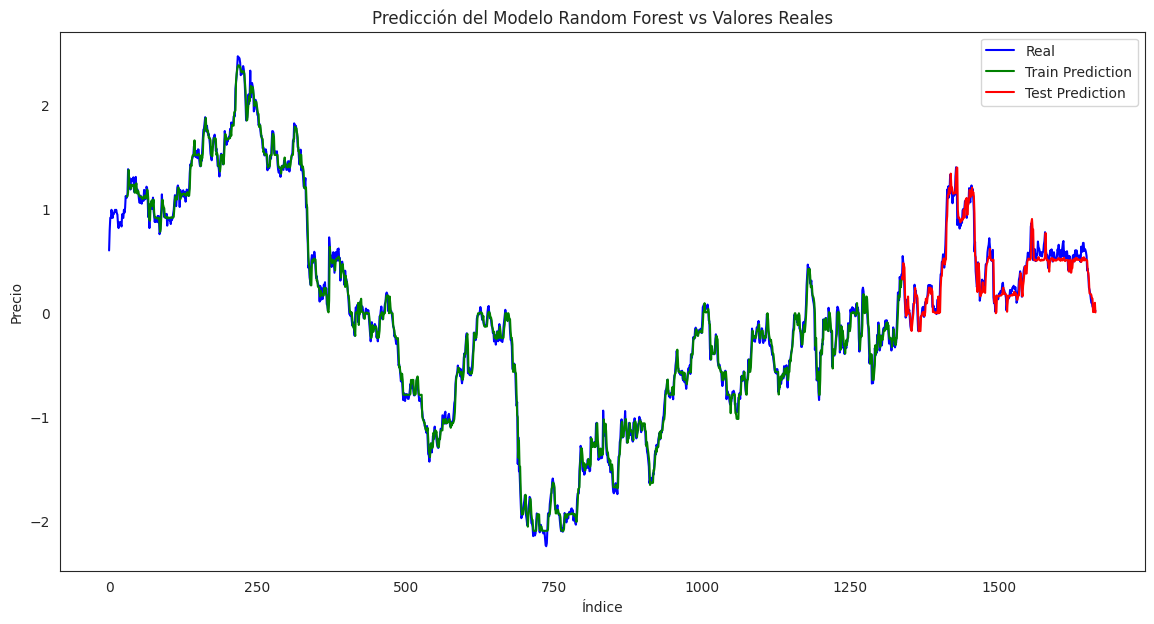

Resultados de las métricas de evaluación para el modelo Modelo Random Forest Train:
MSE: 0.00588189532179781
MAE: 0.055418859735231266
RMSE: 0.07669351551335882
MAPE: 1239.935246368546
R2: 0.9949103231136147

Resultados de las métricas de evaluación para el modelo Modelo Random Forest Test:
MSE: 0.009371790239075679
MAE: 0.0710537542587998
RMSE: 0.09680800710207642
MAPE: 318.32685455305113
R2: 0.9188694170286154


In [ ]:
# Descargar los datos
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Seleccionar solo la columna "Adj Close"
data = stock_data["Adj Close"].values.reshape(-1, 1)

# Normalizar los datos
data = (data - np.mean(data)) / np.std(data)

# Definir el número de pasos de tiempo para la serie temporal
time_steps = 30

# Crear conjuntos de datos de entrenamiento y prueba
X = []
y = []
for i in range(len(data) - time_steps):
    X.append(data[i:i+time_steps])
    y.append(data[i+time_steps])
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Definir los parámetros para la búsqueda de hiperparámetros con validación cruzada
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Crear el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(X_train.shape[0], -1), y_train.ravel())

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Realizar predicciones
y_train_pred = best_rf_model.predict(X_train.reshape(X_train.shape[0], -1))
y_test_pred = best_rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Graficar la predicción del modelo con los valores reales
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(data)), data, label='Real', color='blue')
plt.plot(np.arange(time_steps, len(y_train_pred) + time_steps), y_train_pred, label='Train Prediction', color='green')
plt.plot(np.arange(len(y_train_pred) + time_steps, len(data)), y_test_pred, label='Test Prediction', color='red')
plt.title('Predicción del Modelo Random Forest vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo Random Forest "
metricas_evaluacion(y_train, y_train_pred, nombre_modelo + "Train")
print()
metricas_evaluacion(y_test, y_test_pred, nombre_modelo + "Test")

En la evaluación visual del rendimiento del modelo RandomForest en comparación con los datos reales disponibles, inicialmente se observa una un buen ajuste en las predicciones. Sin embargo, a medida que avanza en la predicción, el modelo realiza predicciones que se dispersan de los valores reales, mostrando un peor ajuste. En general, el comportamiento del modelo es satisfactorio, capturando de manera efectiva la tendencia de los datos reales.

Los resultados indican un buen desempeño del modelo tanto en los datos de entrenamiento como en los de prueba. El coeficiente de determinación (R2 Score) cercano a 1 en los datos de entrenamiento sugiere que el modelo explica la totalidad de la variabilidad en estos datos, mientras que en los datos de prueba, muestra una capacidad muy significativa para explicar la variabilidad. Además, los valores de MSE y MAE son bajos, lo que sugiere que las predicciones del modelo están generalmente cerca de los valores reales en ambos conjuntos de datos.

No obstante, se observa una pequeña discrepancia en el rendimiento entre los conjuntos de datos de entrenamiento y prueba, lo que sugiere un posible sobreajuste. Para solucionarlo, se podrían aplicar diferentes técnicas de regularización o ajustar aún más los hiperparámetros del modelo. Se ha verificado que RandomForest ofrece un desempeño excelente en el conjunto de datos de entrenamiento, y aunque el modelo sigue siendo sólido en los datos de prueba, se observa una ligera disminución en el rendimiento en comparación con los datos de entrenamiento, lo que sugiere cierta capacidad de generalización del modelo. Se continúa explorando otras estrategias de modelado alternativas para intentar mejorar la capacidad predictiva.

## **Modelo XGBoost**

XGBoost es una implementación escalable y eficiente de algoritmos de gradient boosting, diseñada para modelar relaciones complejas y realizar predicciones precisas en una variedad de problemas de aprendizaje automático, incluida la predicción de series temporales financieras. Al aplicar XGBoost a la predicción del precio de las acciones, se aprovecha su capacidad para aprender relaciones no lineales entre las características de entrada y las etiquetas de salida, lo que permite capturar patrones sutiles en los datos históricos y realizar pronósticos precisos sobre los precios futuros de las acciones.

Este trabajo explora cómo XGBoost puede ser utilizado para modelar la serie temporal de los precios de las acciones. XGBoost se destaca por su eficacia en la gestión de conjuntos de datos grandes y complejos, así como por su capacidad para evitar el sobreajuste, lo que lo convierte en una herramienta valiosa para la predicción de acciones en los mercados financieros.

XGBoost se destaca como otro algoritmo de aprendizaje automático ampliamente reconocido, a menudo superando el rendimiento de métodos como Random Forest. Su ventaja radica en la capacidad para manejar eficientemente datos de alta dimensión y grandes conjuntos de datos, mitigando el sobreajuste gracias a su capacidad de regularización integrada. Además, ofrece una optimización de hiperparámetros eficiente, facilitando el ajuste óptimo del modelo mediante una variedad de hiperparámetros y herramientas.

### **XGBoost Básico**

Se ha empleado un modelo de regresión XGBoost para anticipar los precios futuros de las acciones. Con el propósito de mejorar la eficacia del modelo, se ha realizado una búsqueda exhaustiva de hiperparámetros mediante validación cruzada utilizando GridSearchCV. En esta implementación, se ha preferido utilizar el estimador XGBRegressor de la biblioteca XGBoost, manteniendo la misma estrategia para la búsqueda de hiperparámetros.

Los datos han sido normalizados para garantizar una distribución estándar. En el contexto del modelo XGBoost, que se basa en árboles de decisión y no requiere la estacionalidad de los datos como lo harían los modelos ARIMA, se ha concluido que la diferenciación de los valores no es necesaria e incluso podría tener un efecto adverso en el rendimiento del modelo.

[*********************100%%**********************]  1 of 1 completed


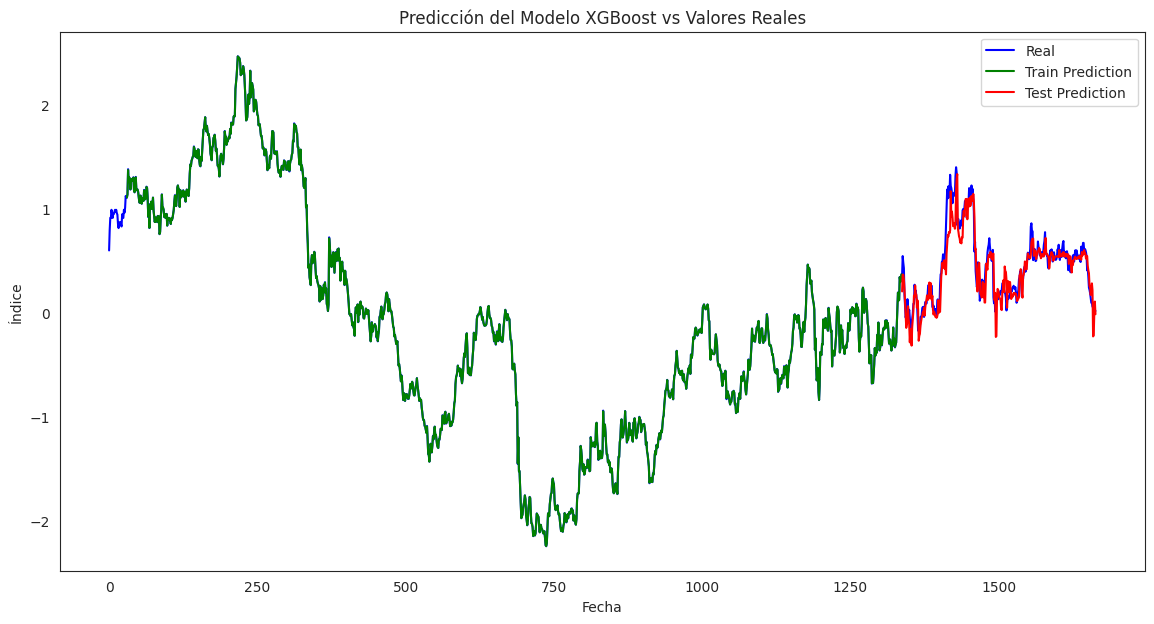

Resultados de las métricas de evaluación para el modelo Modelo XGBoost Train:
MSE: 3.0938592693863983e-06
MAE: 0.0012029401629257582
RMSE: 0.0017589369714081282
MAPE: 1247.803315565497
R2: 0.9999973228452477

Resultados de las métricas de evaluación para el modelo Modelo XGBoost Test:
MSE: 0.018993639663771485
MAE: 0.09780971247049865
RMSE: 0.1378174142253855
MAPE: 314.7794838172188
R2: 0.8355740985062662


In [ ]:
# Descargar los datos
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Seleccionar solo la columna "Adj Close"
data = stock_data["Adj Close"].values.reshape(-1, 1)

# Normalizar los datos
data = (data - np.mean(data)) / np.std(data)

# Definir el número de pasos de tiempo para la serie temporal
time_steps = 30

# Crear conjuntos de datos de entrenamiento y prueba
X = []
y = []
for i in range(len(data) - time_steps):
    X.append(data[i:i+time_steps])
    y.append(data[i+time_steps])
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Asegurar que los datos tengan solo dos dimensiones
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Definir los parámetros para la búsqueda de hiperparámetros con validación cruzada
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Crear el modelo XGBoost
xgb_model = XGBRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())

# Obtener el mejor modelo
best_xgb_model = grid_search.best_estimator_

# Realizar predicciones
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Graficar la predicción del modelo con los valores reales
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(data)), data, label='Real', color='blue')
plt.plot(np.arange(time_steps, len(y_train_pred) + time_steps), y_train_pred, label='Train Prediction', color='green')
plt.plot(np.arange(len(y_train_pred) + time_steps, len(data)), y_test_pred, label='Test Prediction', color='red')
plt.title('Predicción del Modelo XGBoost vs Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Índice')
plt.legend()
plt.show()

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo XGBoost "
metricas_evaluacion(y_train, y_train_pred, nombre_modelo + "Train")
print()
metricas_evaluacion(y_test, y_test_pred, nombre_modelo + "Test")

El modelo XGBoost demuestra un buen rendimiento con errores mínimos en el conjunto de entrenamiento y una capacidad significativa para explicar la variabilidad en los datos de prueba. Aunque se observa una pequeña discrepancia entre ambos conjuntos, sugiriendo cierto sobreajuste, el modelo sigue siendo bastante preciso en sus predicciones.

Se ha realizado un esfuerzo por optimizar el modelo mediante ajustes, sin embargo, los resultados no muestran mejoras significativas en comparación con el modelo básico. Ante esta situación, se prosigue explorando otras estrategias de modelado alternativas con el objetivo de mejorar la capacidad predictiva del modelo.




## **Modelo SVM**

Las Máquinas de Vectores de Soporte (SVM) son un tipo de algoritmo de aprendizaje supervisado que se utiliza comúnmente en problemas de clasificación y regresión. En el contexto de la predicción de acciones, las SVM ofrecen una metodología sólida para analizar datos financieros históricos y realizar predicciones precisas sobre el comportamiento futuro del mercado.

Para aplicar SVM a la predicción, se sigue un proceso que implica la recopilación y preprocesamiento de datos históricos, la selección de características relevantes, la construcción de un modelo SVM y la evaluación de su rendimiento. Además para evaluar su rendimiento es interesante graficar en la curva de aprendizaje. La curva de aprendizaje muestra cómo cambia la precisión del modelo a medida que se agregan más ejemplos de entrenamiento. Ayudando para detectar si el modelo se beneficia de más datos de entrenamiento o si está sufriendo de sobreajuste o subajuste.

En este trabajo, exploraremos cómo las SVM pueden ser utilizadas como herramientas efectivas en la predicción de acciones, proporcionando una alternativa robusta y eficiente para el análisis financiero y la toma de decisiones en los mercados bursátiles.

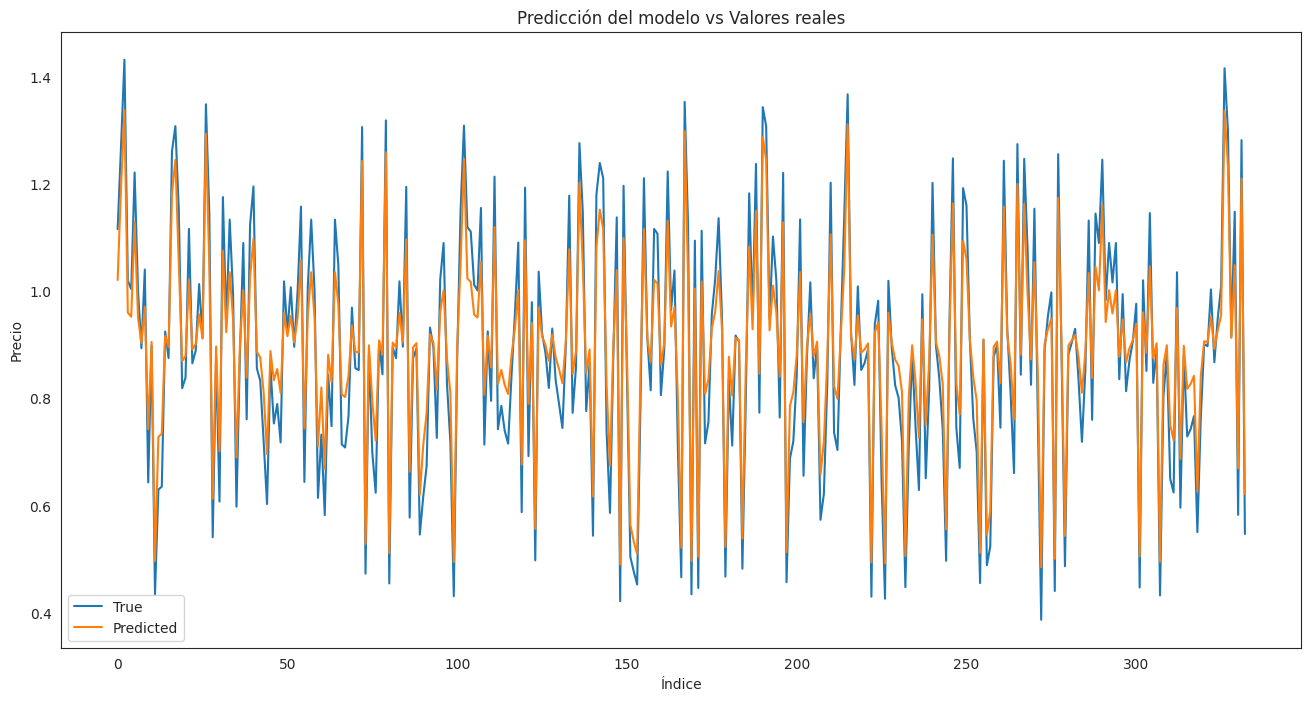

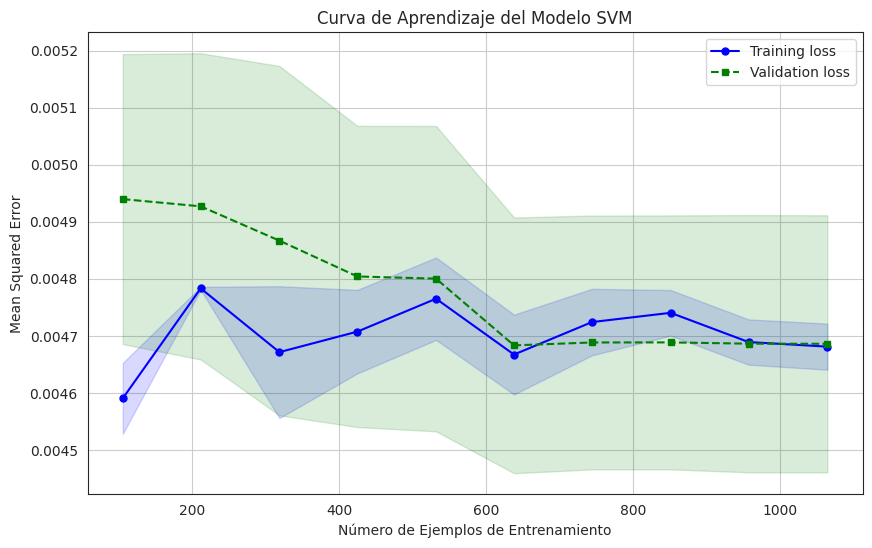

Resultados de las métricas de evaluación para el modelo Modelo SVM:
MSE: 0.00469508174721322
MAE: 0.06100170903074409
RMSE: 0.06852066657011752
MAPE: 7.525534116571397
R2: 0.9095886972125365


In [ ]:
# Descargar los datos
data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Adj Close']

# Eliminar valores nulos
data = data.dropna()
X = data.values.reshape(-1, 1)  # Usar reshape para convertir a formato 2D para el SVR
y = data.values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
svm = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)
svm.fit(X_train_scaled, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = svm.predict(X_test_scaled)

# Calcular y graficar el error cuadrático medio
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('Predicción del modelo vs Valores reales')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Definir diferentes tamaños de conjunto de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(svm, X_train_scaled, y_train, cv=5,
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y desviaciones estándar de los puntajes
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Aprendizaje del Modelo SVM')
plt.xlabel('Número de Ejemplos de Entrenamiento')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo SVM"
metricas_evaluacion(y_test, y_pred, nombre_modelo)

El modelo SVM entrenado exhibe un sólido rendimiento, como lo indican diversas métricas de evaluación. El MSE bajo sugiere un buen ajuste a los datos, mientras que el valor MAE reducido indica predicciones precisas. Además, el RMSE cercano a cero y el bajo MAPE sugieren un ajuste óptimo y una precisión relativa a los valores reales, respectivamente. El alto valor de R2, cercano a 1, señala una capacidad del modelo para explicar una gran parte de la variabilidad de los datos.

En resumen, los errores de predicción son mínimos, lo que refleja la precisión del modelo, y una alta varianza explicada sugiere una captura significativa de la variabilidad de los datos. Estos resultados respaldan la eficacia del modelo SVM en la predicción, mostrando un ajuste robusto a los datos y una prometedora capacidad para la predicción del precio de las acciones.

## **Modelo LSTM**


Las Redes Neuronales de Memoria a Largo Plazo (LSTM) son una arquitectura de redes neuronales recurrentes (RNN) diseñada para modelar secuencias de datos y capturar dependencias a largo plazo. La capacidad de las LSTM para manejar secuencias de datos con dependencias temporales a largo plazo las hace especialmente útiles en diversas aplicaciones de aprendizaje automático, como el procesamiento de secuencias y la predicción de series temporales. Este avance ha superado las limitaciones de las RNNs tradicionales, convirtiendo a las LSTM en una herramienta esencial en el campo del aprendizaje profundo.

Al aplicar LSTM a la predicción de acciones, se sigue un enfoque que implica la preparación de datos históricos, la construcción de la arquitectura LSTM, el entrenamiento del modelo y la evaluación de su rendimiento.

Este trabajo explora cómo las LSTM pueden capturar patrones complejos en los datos financieros históricos y aprender representaciones significativas que permitan realizar predicciones precisas sobre los precios futuros de las acciones.

### **LSTM Básico**

Este modelo representa la implementación inicial y básica de un LSTM para la predicción de series temporales. En el mismo no se han realizado ajustes en la arquitectura o los hiperparámetros.

Training Loss: 0.0004
Test Loss: 0.0004
10/10 [==============================] - 0s 3ms/step


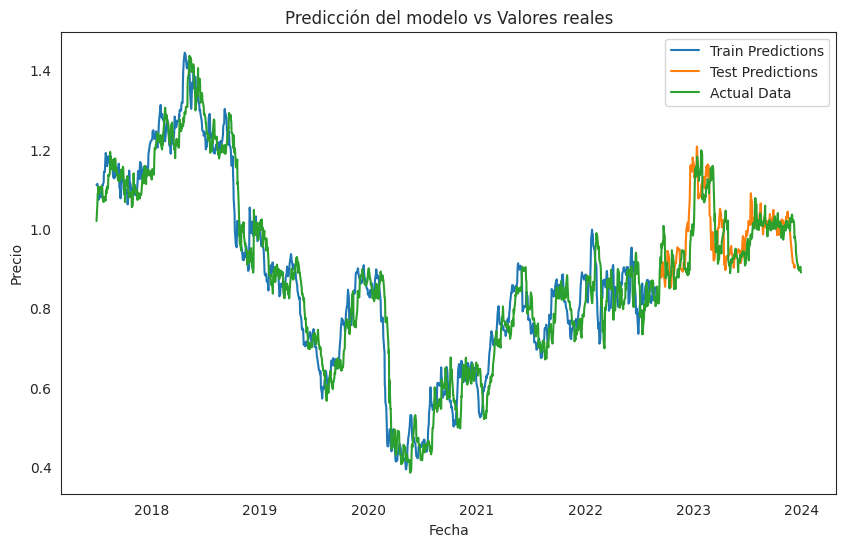

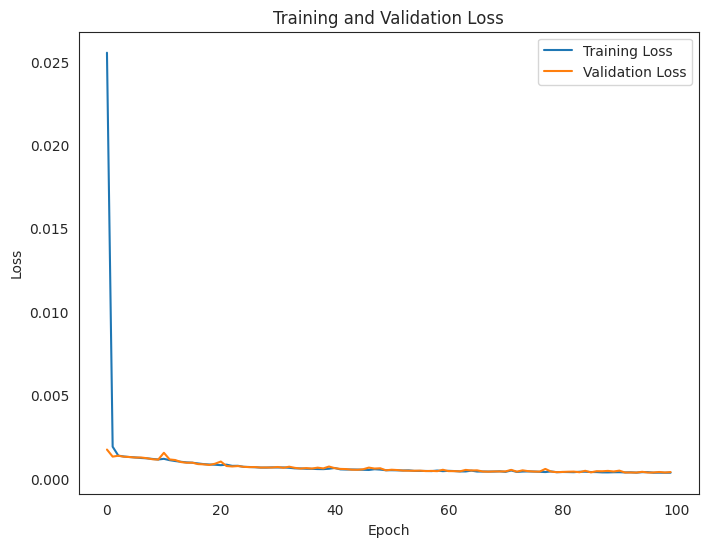

Resultados de las métricas de evaluación para el modelo Modelo LSTM Train:
MSE: 0.17173892327987283
MAE: 0.41374939593837384
RMSE: 0.41441395159896927
MAPE: inf
R2: -2.2848925001670892

Resultados de las métricas de evaluación para el modelo Modelo LSTM Test:
MSE: 0.17736786009847993
MAE: 0.42067441762885577
RMSE: 0.42115063825011584
MAPE: 76.12610832605974
R2: -32.7537239401098


In [ ]:
# Descargar los datos
stock_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Asegurarse de que el índice sea de tipo datetime y esté ordenado
ticker.index = pd.to_datetime(ticker.index)
ticker = ticker.sort_index()

# Obtener los datos de cierre ajustado
data = ticker['Adj Close'].values.reshape(-1, 1)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% de entrenamiento, 20% de prueba)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Preparar los datos para el modelo LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 12  # Número de pasos temporales
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reformatear los datos para que sean compatibles con LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construir el modelo LSTM
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# verbose=0 eliminar la salida de información sobre las épocas durante el entrenamiento, verbose=2 muestra

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Hacer predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Desnormalizar las predicciones
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(ticker.index[:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(ticker.index[len(train_predictions)+time_steps+1:len(train_predictions)+time_steps+len(test_predictions)+1],
         test_predictions, label='Test Predictions')
plt.plot(ticker.index, ticker['Adj Close'], label='Actual Data')
plt.title('Predicción del modelo vs Valores reales')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Graficar las pérdidas durante el entrenamiento
losses_lstm = history.history['loss']
val_losses_lstm = history.history['val_loss']
plt.figure(figsize=(8, 6))
plt.plot(range(len(losses_lstm)), losses_lstm, label='Training Loss')
plt.plot(range(len(val_losses_lstm)), val_losses_lstm, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo LSTM "
metricas_evaluacion(y_train, train_predictions, nombre_modelo + "Train")
print()
metricas_evaluacion(y_test, test_predictions, nombre_modelo + "Test")

Estos resultados sugieren que el modelo LSTM necesita mejoras significativas para mejorar su capacidad predictiva y su capacidad de generalización a datos no vistos.

### **LSTM Optimizado**

Este modelo refleja una versión mejorada y optimizada del LSTM, donde se han realizado ajustes en la arquitectura de la red, selección de hiperparámetros y otras técnicas de optimización para mejorar su rendimiento predictivo y capacidad de generalización.

10/10 [==============================] - 0s 3ms/step


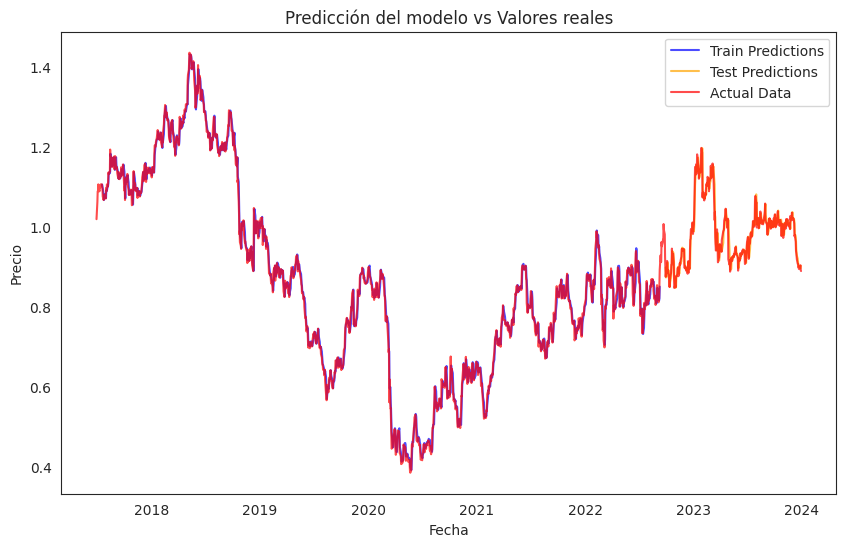

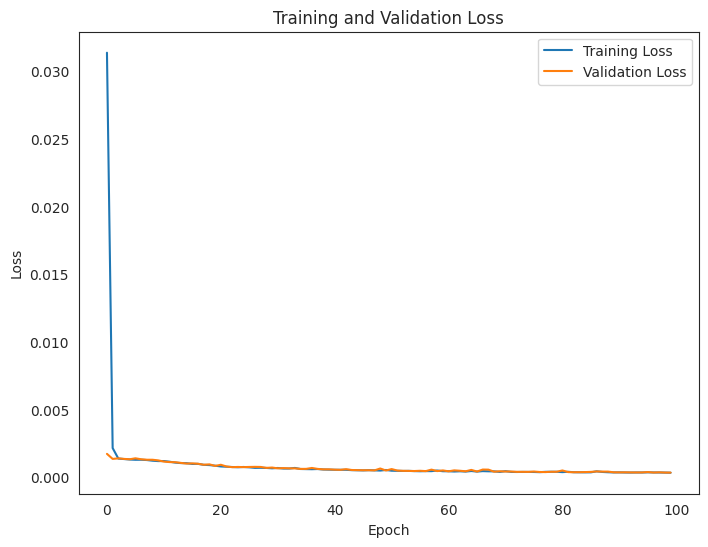

Resultados de las métricas de evaluación para el modelo Modelo LSTM optimizado  Train:
MSE: 0.1682563246369213
MAE: 0.409623226076835
RMSE: 0.41019059550033726
MAPE: inf
R2: -2.2182799819048165

Resultados de las métricas de evaluación para el modelo Modelo LSTM optimizado  Test:
MSE: 0.1727818697766068
MAE: 0.4152094810222698
RMSE: 0.4156703859750016
MAPE: 75.15734310564639
R2: -31.880993947028898


In [ ]:
# Descargar los datos
stock_data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Asegurarse de que el índice sea de tipo datetime y esté ordenado
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.sort_index()

# Obtener los datos de cierre ajustado
data = stock_data['Adj Close'].values.reshape(-1, 1)

# Eliminar los datos cero
data = data[data != 0].reshape(-1, 1)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% de entrenamiento, 20% de prueba)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Preparar los datos para el modelo LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 12  # Número de pasos temporales
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reformatear los datos para que sean compatibles con LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construir el modelo LSTM
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# verbose=0 eliminar la salida de información sobre las épocas durante el entrenamiento, verbose=2 muestra

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Hacer predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Desnormalizar las predicciones
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[time_steps:len(train_predictions)+time_steps], train_predictions, label='Train Predictions', color='blue', alpha=0.7)
plt.plot(stock_data.index[len(train_predictions)+2*time_steps+1:len(train_predictions)+2*time_steps+len(test_predictions)+1],
         test_predictions, label='Test Predictions', color='orange', alpha=0.7)
plt.plot(stock_data.index, stock_data['Adj Close'], label='Actual Data', color='red', alpha=0.7)
plt.title('Predicción del modelo vs Valores reales')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Graficar las pérdidas durante el entrenamiento
losses_lstm = history.history['loss']
val_losses_lstm = history.history['val_loss']
plt.figure(figsize=(8, 6))
plt.plot(range(len(losses_lstm)), losses_lstm, label='Training Loss')
plt.plot(range(len(val_losses_lstm)), val_losses_lstm, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo_lstm = "Modelo LSTM optimizado "
metricas_evaluacion(y_train, train_predictions, nombre_modelo_lstm + " Train")
print()
metricas_evaluacion(y_test, test_predictions, nombre_modelo_lstm + " Test")


Los resultados del modelo LSTM muestran un desempeño deficiente en ambos conjuntos de datos. Tanto en el entrenamiento como en la prueba, el modelo produce predicciones con un alto error y no logra ajustarse bien a los datos, como lo indican los valores negativos de R2. Esto sugiere que el modelo no es adecuado para la predicción de los datos y se necesitan enfoques alternativos para mejorar la precisión de las predicciones. Se continúa explorando otras estrategias de modelado alternativas para intentar mejorar la capacidad predictiva.

## **Modelo CNN**

Las Redes Neuronales Convolucionales (CNN) son herramientas poderosas en el campo del aprendizaje profundo que pueden capturar patrones complejos en datos multidimensionales. En el contexto de la predicción del precio de las acciones, las CNN ofrecen la capacidad de analizar datos financieros históricos y predecir tendencias futuras con precisión.

Para aplicar CNN a la predicción, se sigue un proceso que implica la recopilación y preprocesamiento de datos históricos, la construcción de una arquitectura de red neuronal convolucional, el entrenamiento del modelo y la evaluación de su rendimiento.

En este trabajo, exploraremos cómo las CNN pueden ser utilizadas para mejorar la precisión y la confiabilidad en la predicción de acciones, ofreciendo nuevas perspectivas en el análisis financiero y la predicción de series temporales.

11/11 [==============================] - 0s 2ms/step


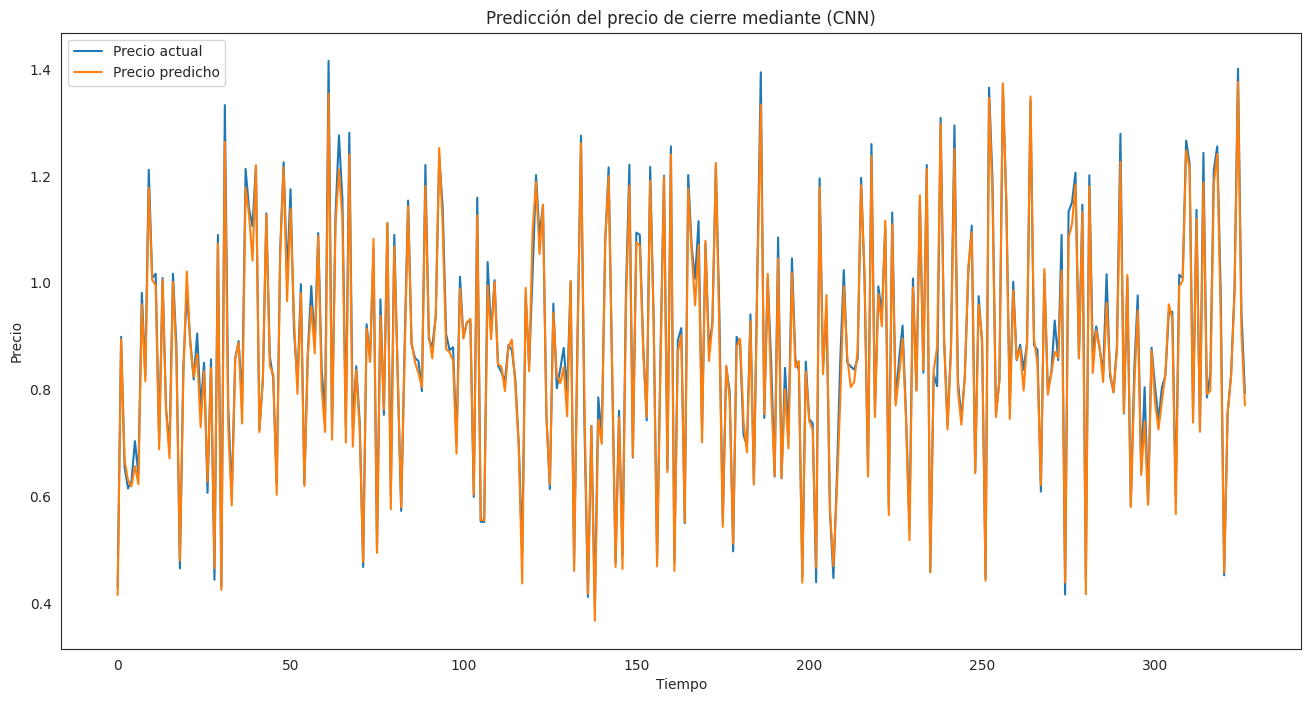

Resultados de las métricas de evaluación para el modelo Modelo CNN:
MSE: 0.0005784195678704915
MAE: 0.018276611002447284
RMSE: 0.024050354838764675
MAPE: 2.1124792266902355
R2: 0.9880737282177499
Training Loss: 0.0005053383647464216
Testing Loss: 0.0005230216193012893


In [ ]:
# Descargar los datos
data_santander = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Preparar los datos
data_santander['Returns'] = data_santander['Adj Close'].pct_change()
data_santander.dropna(inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_santander[['Adj Close', 'Returns']])

# Dividir los datos en entrenamiento y prueba
X = []
y = []
window_size = 30  # Tamaño de la ventana de tiempo
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size][0])  # Predicción del precio de cierre

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(window_size, 2)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# verbose=0 eliminar la salida de información sobre las épocas durante el entrenamiento, verbose=2 muestra

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test)

# Invertir la escala de los datos para obtener los valores reales
y_pred = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), 1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 1))), axis=1))[:, 0]


# Graficar resultados
plt.plot(y_test, label='Precio actual')
plt.plot(y_pred, label='Precio predicho')
plt.title('Predicción del precio de cierre mediante (CNN)')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Llamada a la función metricas_evaluacion para el modelo
nombre_modelo = "Modelo CNN"
metricas_evaluacion(y_test, y_pred, nombre_modelo)
print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

Estos resultados muestran que el modelo CNN parece estar aprendiendo bien de los datos de entrenamiento y generaliza bien en los datos de prueba, ya que la pérdida en ambos conjuntos es baja y el R2 Score es relativamente alto (cerca de 1).

El modelo de Red Neuronal Convolucional (CNN) ha demostrado un rendimiento sobresaliente. Las métricas de evaluación revelan que el modelo es altamente preciso y capaz de capturar la variabilidad en los movimientos de precios. Además, las pérdidas en entrenamiento y pruebas son mínimas, lo que indica una excelente capacidad de generalización.

Los resultados respaldan la eficacia del modelo CNN en la predicción de series temporales financieras. Su precisión y capacidad para capturar la variabilidad en los precios de las acciones son prometedoras, lo que sugiere su viabilidad para su implementación en la toma de decisiones.

## **Conclusiones**

Después de un exhaustivo análisis y evaluación de los diferentes modelos aplicados a los datos, se pueden extraer las siguientes conclusiones:

- Modelo ARIMA y Prophet: Ambos modelos muestran un rendimiento aceptable en términos de métricas de evaluación. Sin embargo, el modelo ARIMA parece experimentar sobreajuste, lo que se refleja en un rendimiento inferior.

- Modelo AutoARIMA: Este modelo demuestra un rendimiento sólido en el conjunto de prueba, con métricas de error bajos y un alto coeficiente de determinación (R2), lo que sugiere una buena capacidad de generalización.

- Modelos SARIMA: Exhiben un rendimiento deficiente, especialmente con R2 negativos, lo que indica que estos modelos no son adecuados para el conjunto de datos.

Modelos Random Forest y XGBoost: Aunque muestran un buen rendimiento en el conjunto de entrenamiento, muestran signos de sobreajuste en el conjunto de prueba, lo que sugiere una capacidad limitada de generalización.

Modelo LSTM: Su desempeño en el conjunto de prueba es deficiente, con métricas de error elevadas y un R2 negativo, indicando una pobre capacidad de generalización.

Modelo CNN y SVM: Ambos modelos exhiben un rendimiento sólido en el conjunto de prueba, con métricas de error bajos y un alto R2, lo que sugiere una buena capacidad de generalización. Estos modelos destacan como los más adecuados para predecir los datos de UNICAJA.

En resumen, los modelos AutoARIMA, CNN y SVM son los más prometedores, ya que exhiben un buen rendimiento tanto en el conjunto de entrenamiento como en el de prueba. Estos modelos podrían considerarse como las mejores opciones para predecir los datos financieros.